In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import plotly.express as px

%matplotlib inline

In [3]:
# Set DPI for fugures

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [4]:
# Set the default font size and weight
plt.rcParams['font.size'] = 30
plt.rcParams['font.weight'] = 'bold'

In [ ]:
# Drive connection

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataset: UCI Heart Disease Dataset

In [ ]:
"""
save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/df.csv"

# Save to CSV
df.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")
"""

File saved to: /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/CardioGPT/Table/df.csv


In [ ]:
load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/df.csv"

# Load the DataFrame
df = pd.read_csv(load_path)

# Preview
df.head()

Age Gender Smoking Hx Smoking Hx Radiothreapy Thyroid Function  \
0   27      F      No         No              No        Euthyroid   
1   34      F      No        Yes              No        Euthyroid   
2   30      F      No         No              No        Euthyroid   
3   62      F      No         No              No        Euthyroid   
4   62      F      No         No              No        Euthyroid   

          Physical Examination Adenopathy       Pathology     Focality Risk  \
0   Single nodular goiter-left         No  Micropapillary    Uni-Focal  Low   
1          Multinodular goiter         No  Micropapillary    Uni-Focal  Low   
2  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
3  Single nodular goiter-right         No  Micropapillary    Uni-Focal  Low   
4          Multinodular goiter         No  Micropapillary  Multi-Focal  Low   

     T   N   M Stage       Response Recurred  
0  T1a  N0  M0     I  Indeterminate       No  
1  T1a  N0  M0     I      Excellent       No  
2  T1a  N0  M0     I      Excellent       No  
3  T1a  N0  M0     I      Excellent       No  
4  T1a  N0  M0     I      Excellent       No

In [ ]:
# Binary mappings
binary_maps = {
    "Gender": {"F": 0, "M": 1},
    "Smoking": {"No": 0, "Yes": 1},
    "Hx Smoking": {"No": 0, "Yes": 1},
    "Hx Radiothreapy": {"No": 0, "Yes": 1},
    "Focality": {"Uni-Focal": 0, "Multi-Focal": 1},
    "M": {"M0": 0, "M1": 1},
    "Recurred": {"No": 0, "Yes": 1}
}

# Multi-category mappings
thyroid_map = {
    "Euthyroid": 0,
    "Subclinical Hyperthyroidism": 1,
    "Clinical Hyperthyroidism": 2,
    "Subclinical Hypothyroidism": 3,
    "Clinical Hypothyroidism": 4
}

exam_map = {
    "Normal": 0,
    "Single nodular goiter-right": 1,
    "Single nodular goiter-left": 2,
    "Multinodular goiter": 3,
    "Diffuse goiter": 4
}

adenopathy_map = {
    "No": 0,
    "Left": 1,
    "Right": 2,
    "Bilateral": 3,
    "Extensive": 4,
    "Posterior": 5
}

pathology_map = {
    "Papillary": 0,
    "Micropapillary": 1,
    "Follicular": 2,
    "Hurthel cell": 3
}

risk_map = {"Low": 0, "Intermediate": 1, "High": 2}

t_map = {"T1a": 0, "T1b": 1, "T2": 2, "T3a": 3, "T3b": 4, "T4a": 5, "T4b": 6}

n_map = {"N0": 0, "N1a": 1, "N1b": 2}

stage_map = {"I": 0, "II": 1, "III": 2, "IVA": 3, "IVB": 4}

response_map = {
    "Excellent": 0,
    "Indeterminate": 1,
    "Biochemical Incomplete": 2,
    "Structural Incomplete": 3
}

# Apply all mappings
for col, mapping in binary_maps.items():
    df[col] = df[col].map(mapping)

df["Thyroid Function"] = df["Thyroid Function"].map(thyroid_map)
df["Physical Examination"] = df["Physical Examination"].map(exam_map)
df["Adenopathy"] = df["Adenopathy"].map(adenopathy_map)
df["Pathology"] = df["Pathology"].map(pathology_map)
df["Risk"] = df["Risk"].map(risk_map)
df["T"] = df["T"].map(t_map)
df["N"] = df["N"].map(n_map)
df["Stage"] = df["Stage"].map(stage_map)
df["Response"] = df["Response"].map(response_map)

In [ ]:
# Dataset Shape

df.shape

(383, 17)

In [ ]:
"""
# Path to your folder
save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table"

# Save it as CSV
df.to_csv(save_path + "/df_encoded.csv", index=False)
"""

In [ ]:
# Path to your folder
load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table"

# save the DataFrame
df = pd.read_csv(load_path + "/df_encoded.csv")

# Preview the first few rows
df.head()

Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   27       0        0           0                0                 0   
1   34       0        0           1                0                 0   
2   30       0        0           0                0                 0   
3   62       0        0           0                0                 0   
4   62       0        0           0                0                 0   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     2           0          1         0     0  0  0  0   
1                     3           0          1         0     0  0  0  0   
2                     1           0          1         0     0  0  0  0   
3                     1           0          1         0     0  0  0  0   
4                     3           0          1         1     0  0  0  0   

   Stage  Response  Recurred  
0      0         1         0  
1      0         0         0  
2      0         0         0  
3      0         0         0  
4      0         0         0

# Train/Test Split

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target column name
target_col = "Recurred"

# Update the target column and clinical_text column
X = df.drop("Recurred", axis=1)

# y = target column
y = df[target_col]

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.20,
    random_state=42,
    stratify=y
)

In [ ]:
"""
save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table"

# Save files
x_train.to_csv(f"{save_path}/x_train.csv", index=False)
x_test.to_csv(f"{save_path}/x_test.csv", index=False)
y_train.to_csv(f"{save_path}/y_train.csv", index=False)
y_test.to_csv(f"{save_path}/y_test.csv", index=False)
"""

In [ ]:
# Define the path
test_load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Actual"
train_load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Actual/Preprocessed"
# Load the files
x_train = pd.read_csv(f"{train_load_path}/x_train.csv")
x_test = pd.read_csv(f"{test_load_path}/x_test.csv")
y_train = pd.read_csv(f"{train_load_path}/y_train.csv")
y_test = pd.read_csv(f"{test_load_path}/y_test.csv")

print("Files loaded successfully!")

Files loaded successfully!


In [ ]:
# Preview
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

x_train shape: (311, 16)
x_test shape: (72, 16)
y_train shape: (311, 1)
y_test shape: (72, 1)


In [ ]:
# Dataset Shape
x_train.shape

(311, 16)

In [ ]:
# Dataset Shape
y_train.shape

(311, 1)

In [ ]:
# Dataset Shape
x_test.shape

(72, 16)

In [ ]:
# Dataset Shape
y_test.shape

(72, 1)

In [ ]:
# Train Count
print(y_train.value_counts())

Recurred
0           220
1            91
Name: count, dtype: int64


In [ ]:
# Test Count
print(y_test.value_counts())

Recurred
0           55
1           17
Name: count, dtype: int64


In [ ]:
for col in x_train.columns:
    unique_values = x_train[col].unique()
    print(f"Feature: {col}")
    print(f"Unique values ({len(unique_values)}): {unique_values}\n")

Feature: Age
Unique values (63): [41 30 37 42 32 62 46 68 20 31 60 35 72 67 22 28 34 25 43 48 51 49 55 27
 38 40 50 19 29 26 36 44 18 21 47 59 52 53 75 17 70 73 45 66 54 81 33 63
 24 58 65 15 23 56 82 80 64 71 79 78 57 61 69]

Feature: Gender
Unique values (2): [0 1]

Feature: Smoking
Unique values (2): [0 1]

Feature: Hx Smoking
Unique values (2): [0 1]

Feature: Hx Radiothreapy
Unique values (2): [0 1]

Feature: Thyroid Function
Unique values (5): [0 2 3 4 1]

Feature: Physical Examination
Unique values (5): [1 0 2 3 4]

Feature: Adenopathy
Unique values (6): [0 1 3 2 4 5]

Feature: Pathology
Unique values (4): [0 1 3 2]

Feature: Focality
Unique values (2): [1 0]

Feature: Risk
Unique values (3): [0 1 2]

Feature: T
Unique values (7): [3 0 4 2 6 1 5]

Feature: N
Unique values (3): [0 1 2]

Feature: M
Unique values (2): [0 1]

Feature: Stage
Unique values (5): [0 1 2 4 3]

Feature: Response
Unique values (4): [0 3 1 2]



# Synthetic Data Generation Methods

### CTGAN for Synthetic Data Generation

### TVAE (Tabular Variational Autoencoder)

### Gaussian Copula (via SDV's CopulaGAN)

### SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)

| Method        | Categorical Handling         | Details |
| ------------- | ---------------------------- | ---------------------- |
| **CTGAN**     | Conditioned + one-hot        | It learns how
                                                 categories behave from the training data. When generating new data, it picks a category based on patterns it learned.                   |
| **TVAE**      | Softmax + sampling           | It learns the     
                                                 relationship between features, including categories. When creating new rows, it chooses categories based on probabilities.                   |
| **CopulaGAN** | Transforms + re-mapping      | It turns categories into
                                                 numbers, learns how they relate, and then transforms them back into categories.                   |
| **SMOTE-NC**  | Copies from nearest neighbor | For categories, it just
                                                 copies the category from one of the neighbors.             |

### SMOTE-NC (Synthetic Minority Over-sampling Technique for Nominal and Continuous)

In [ ]:
from imblearn.over_sampling import SMOTENC
from collections import Counter

# Ensure y_train is a 1D array (if it's a DataFrame, extract the column)
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure the shape of y_train is correct
print("Shape of y_train:", y_train.shape)

# Updated categorical features (0-based indices)
categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Convert x_train to NumPy array if needed
if isinstance(x_train, pd.DataFrame):
    x_train_array = x_train.values
else:
    x_train_array = x_train

# Print original distribution
print("Before SMOTE-NC:", Counter(y_train))

# Get class counts
counter = Counter(y_train)
class_0_count = counter[0]
class_1_target = class_0_count + 200

# Apply SMOTE-NC
smote_nc = SMOTENC(categorical_features=categorical_features, sampling_strategy={1: class_1_target}, random_state=42)
x_resampled, y_resampled = smote_nc.fit_resample(x_train_array, y_train)

# Convert back to DataFrame
x_resampled_df = pd.DataFrame(x_resampled, columns=x_train.columns)
y_resampled_df = pd.DataFrame(y_resampled, columns=['target'])

# Print new class distribution
print("After SMOTE-NC:", Counter(y_resampled))

# Separate synthetic samples
num_original_samples = len(x_train_array)
synthetic_x_train = x_resampled_df.iloc[num_original_samples:].reset_index(drop=True)
synthetic_y_train = y_resampled_df.iloc[num_original_samples:].reset_index(drop=True)

Shape of y_train: (311,)
Before SMOTE-NC: Counter({np.int64(0): 220, np.int64(1): 91})
After SMOTE-NC: Counter({np.int64(1): 420, np.int64(0): 220})


In [ ]:
"""
save_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Synthetic Data Generation Methods/y_resampled_df.csv"

# Save to CSV
y_resampled_df.to_csv(save_path, index=False)

print(f"File saved to: {save_path}")
"""

File saved to: /content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Synthetic Data Generation Methods/y_resampled_df.csv


In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Synthetic Data Generation Methods/x_resampled_df.csv")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Synthetic Data Generation Methods/y_resampled_df.csv")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Synthetic Data Generation Methods/synthetic_x_train.csv")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Synthetic Data Generation Methods/synthetic_y_train.csv")

In [ ]:
synthetic_x_train.head()

Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   29       1        0           0                0                 0   
1   67       1        1           0                0                 0   
2   50       0        0           0                0                 0   
3   57       0        0           0                0                 0   
4   30       0        0           0                0                 0   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     3           2          0         1     1  3  2  0   
1                     3           3          0         1     2  6  2  1   
2                     1           0          0         0     0  3  0  0   
3                     3           3          0         1     2  5  2  0   
4                     2           0          0         0     0  3  0  0   

   Stage  Response  
0      0         3  
1      1         3  
2      0         3  
3      1         3  
4      0         3

In [ ]:
x_resampled_df.head()

Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   24       1        0           0                0                 0   
1   28       0        0           0                0                 0   
2   27       1        0           0                0                 0   
3   72       0        0           0                0                 3   
4   50       0        0           0                0                 2   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     1           0          0         0     0  2  0  0   
1                     3           0          0         0     0  2  0  0   
2                     3           3          0         1     1  3  2  0   
3                     1           0          0         0     0  2  0  0   
4                     3           0          1         0     0  0  0  0   

   Stage  Response  
0      0         0  
1      0         0  
2      0         3  
3      0         1  
4      0         0

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for Age:
Age
31    7
56    3
24    3
51    3
44    3
36    3
21    3
29    3
32    3
27    2
72    2
30    2
34    2
37    2
41    2
60    2
26    2
23    2
45    2
39    2
28    1
50    1
80    1
53    1
38    1
20    1
52    1
22    1
71    1
61    1
54    1
62    1
43    1
67    1
42    1
33    1
35    1
73    1
76    1
Name: count, dtype: int64

Counts for Gender:
Gender
0    56
1    16
Name: count, dtype: int64

Counts for Smoking:
Smoking
0    63
1     9
Name: count, dtype: int64

Counts for Hx Smoking:
Hx Smoking
0    66
1     6
Name: count, dtype: int64

Counts for Hx Radiothreapy:
Hx Radiothreapy
0    71
1     1
Name: count, dtype: int64

Counts for Thyroid Function:
Thyroid Function
0    61
2     5
1     3
3     2
4     1
Name: count, dtype: int64

Counts for Physical Examination:
Physical Examination
1    29
2    22
3    19
4     2
Name: count, dtype: int64

Counts for Adenopathy:
Adenopathy
0    54
2     9
3     5
1     3
4     1
Name: count, dtype: int64

Counts for

In [ ]:
x_resampled_df.shape

(72, 16)

In [ ]:
y_resampled_df.head()

Recurred
0         0
1         0
2         1
3         0
4         0

In [ ]:
y_resampled_df.shape

(72, 1)

## Pipeline

In [ ]:
# Train/Test
x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

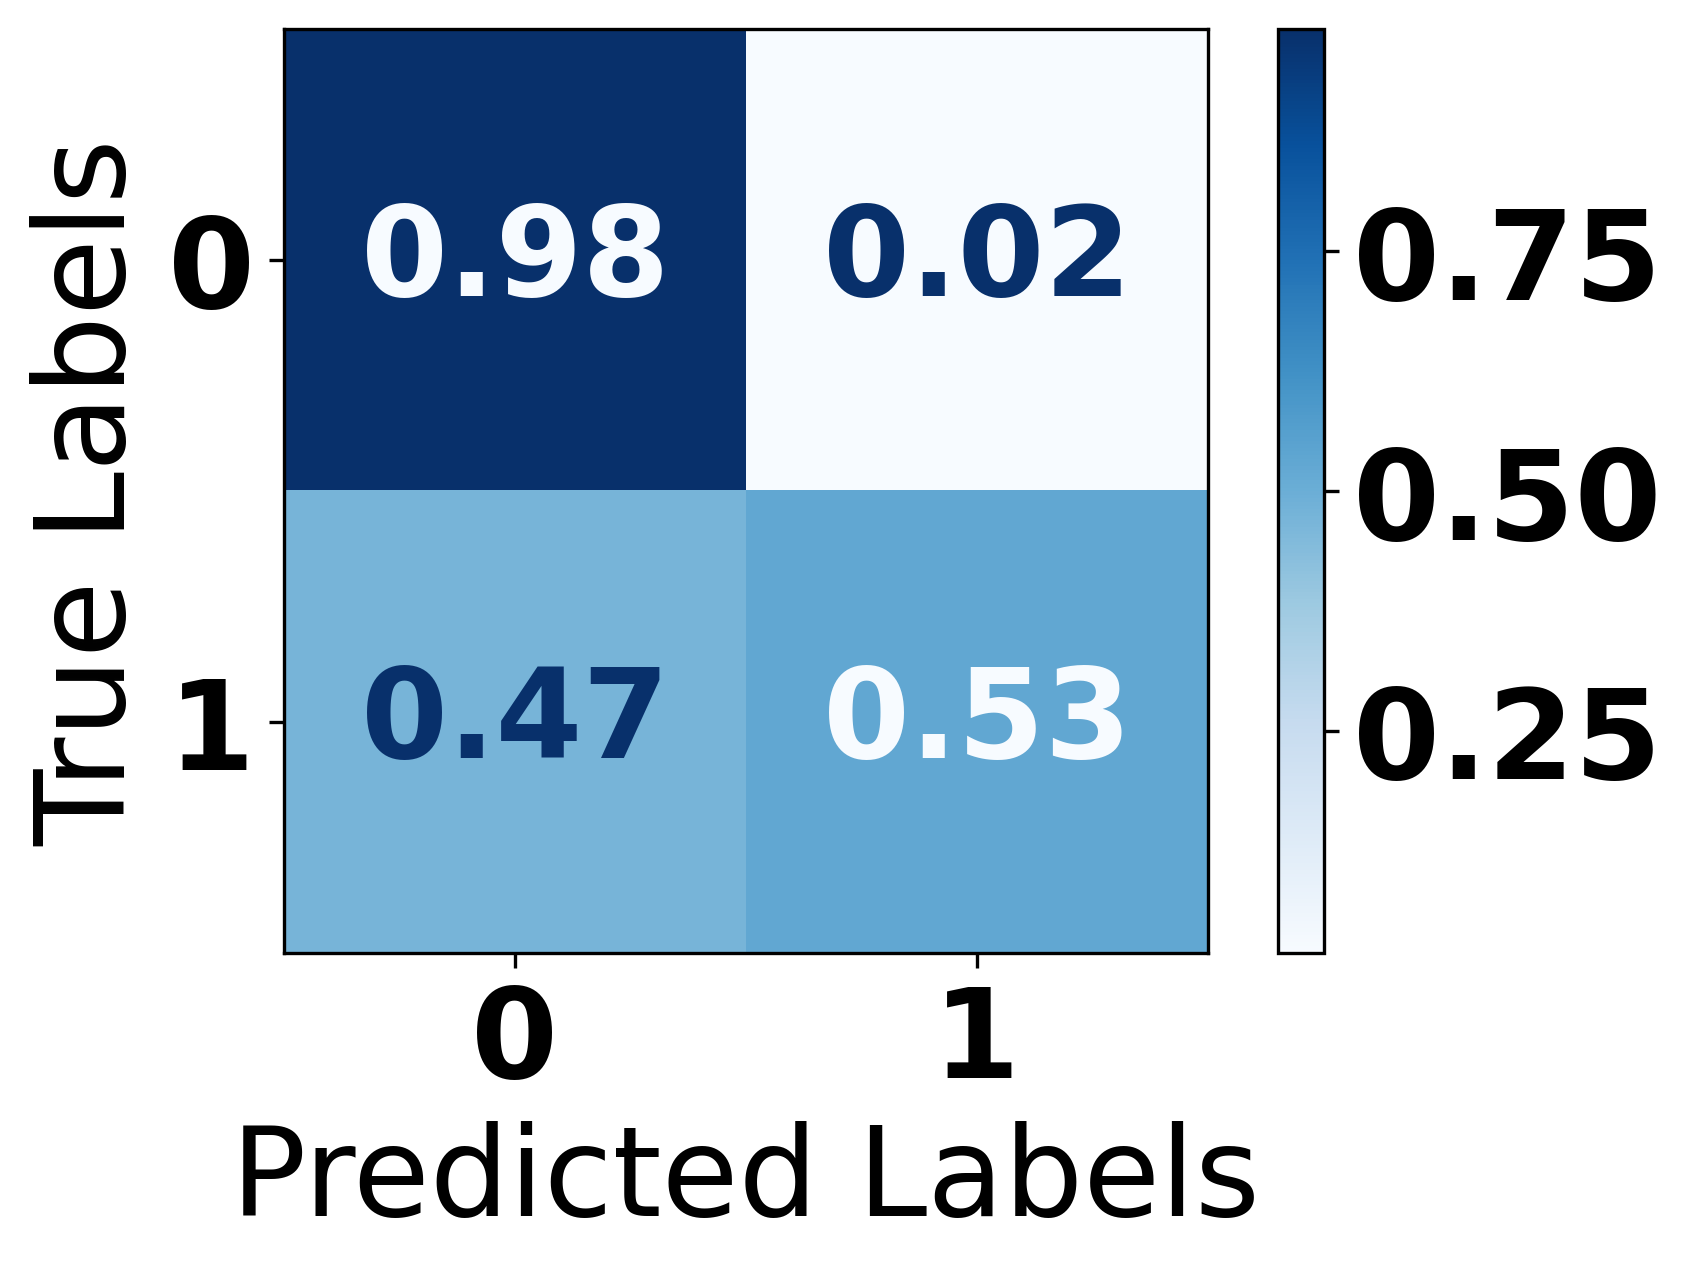

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.87      0.98      0.92        55
     Class 1       0.90      0.53      0.67        17

    accuracy                           0.88        72
   macro avg       0.89      0.76      0.79        72
weighted avg       0.88      0.88      0.86        72

Train Accuracy: 0.875
Test Accuracy: 0.875


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(
    max_depth=1,
    max_features=8,
    random_state=42)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Synthetic Data Generation Methods/Model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Synthetic Data Generation Methods/Model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Synthetic Data Generation Methods/Model/DT.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


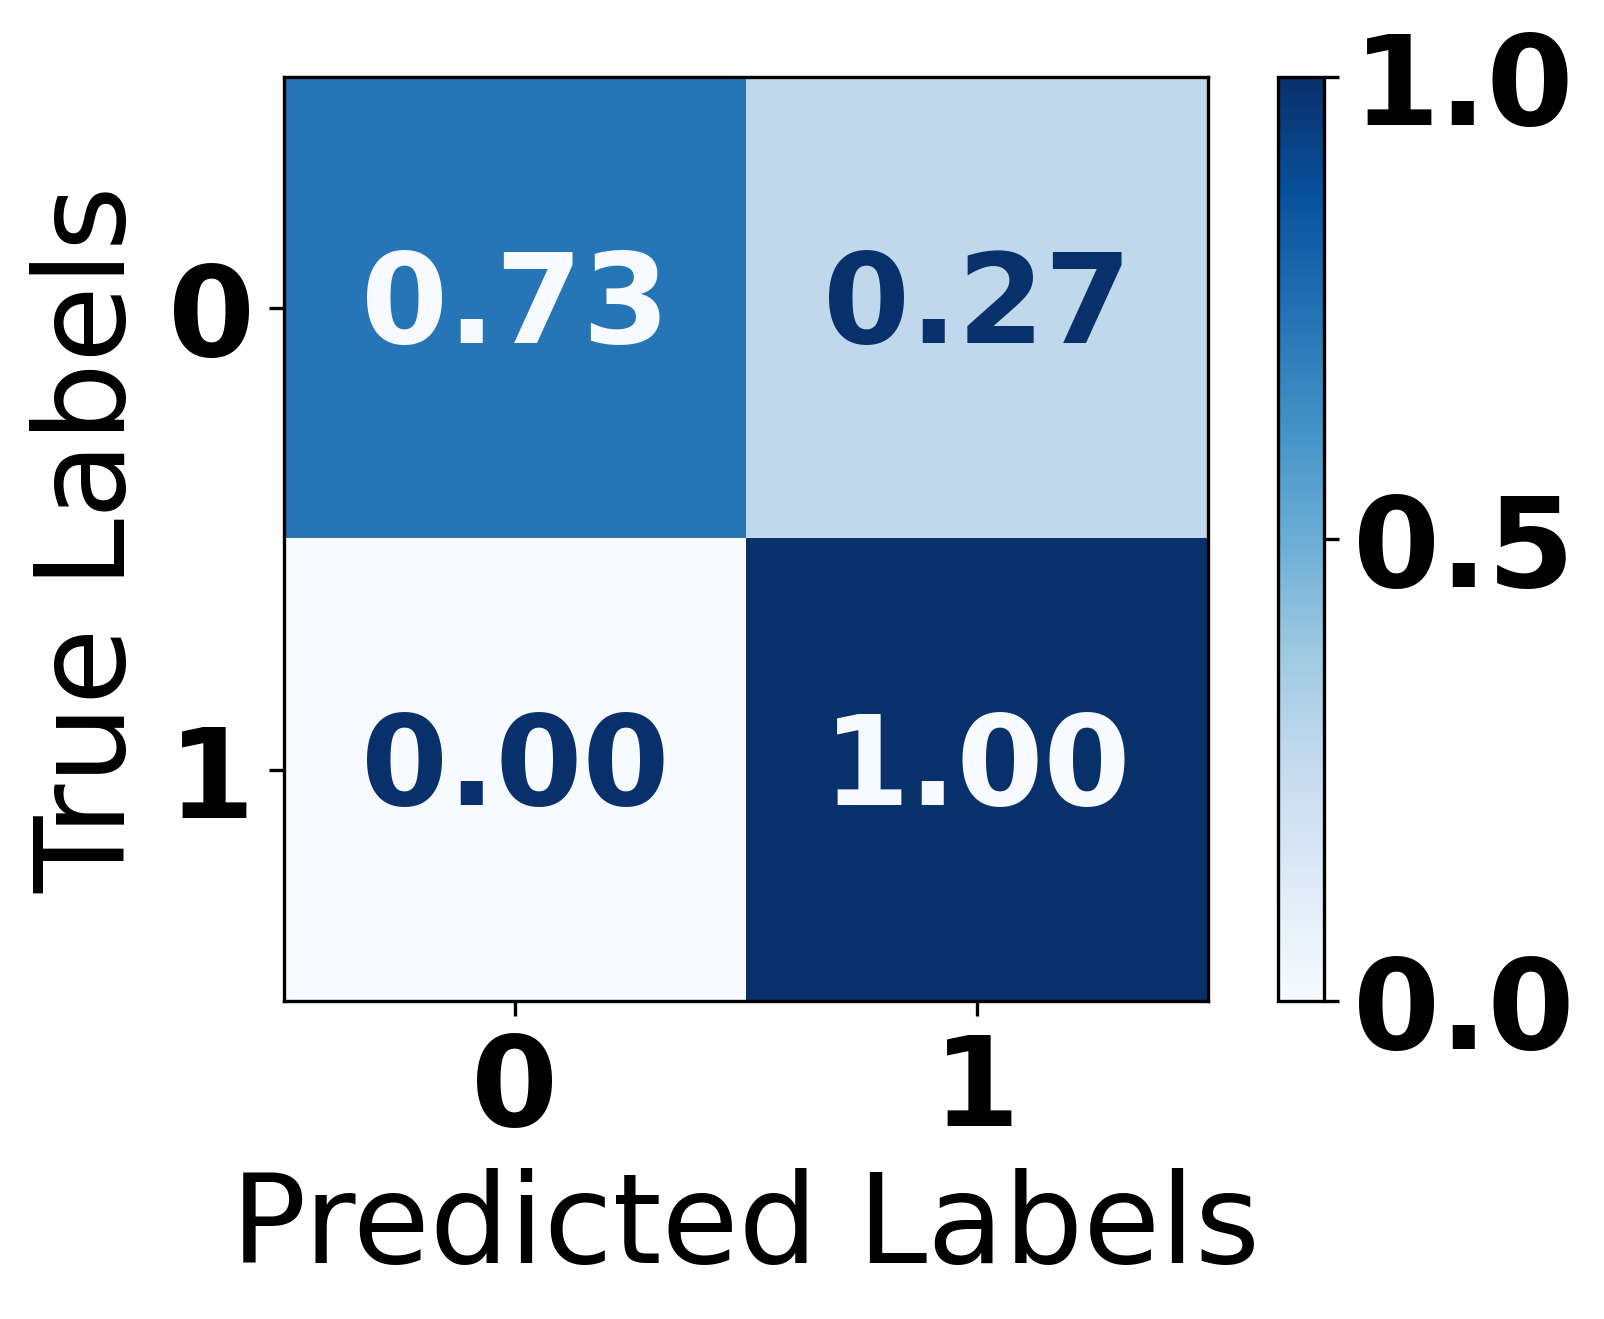

Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.73      0.84        55
     Class 1       0.53      1.00      0.69        17

    accuracy                           0.79        72
   macro avg       0.77      0.86      0.77        72
weighted avg       0.89      0.79      0.81        72

Train Accuracy: 0.7916666666666666
Test Accuracy: 0.7916666666666666


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=1)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/RUSBoost.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


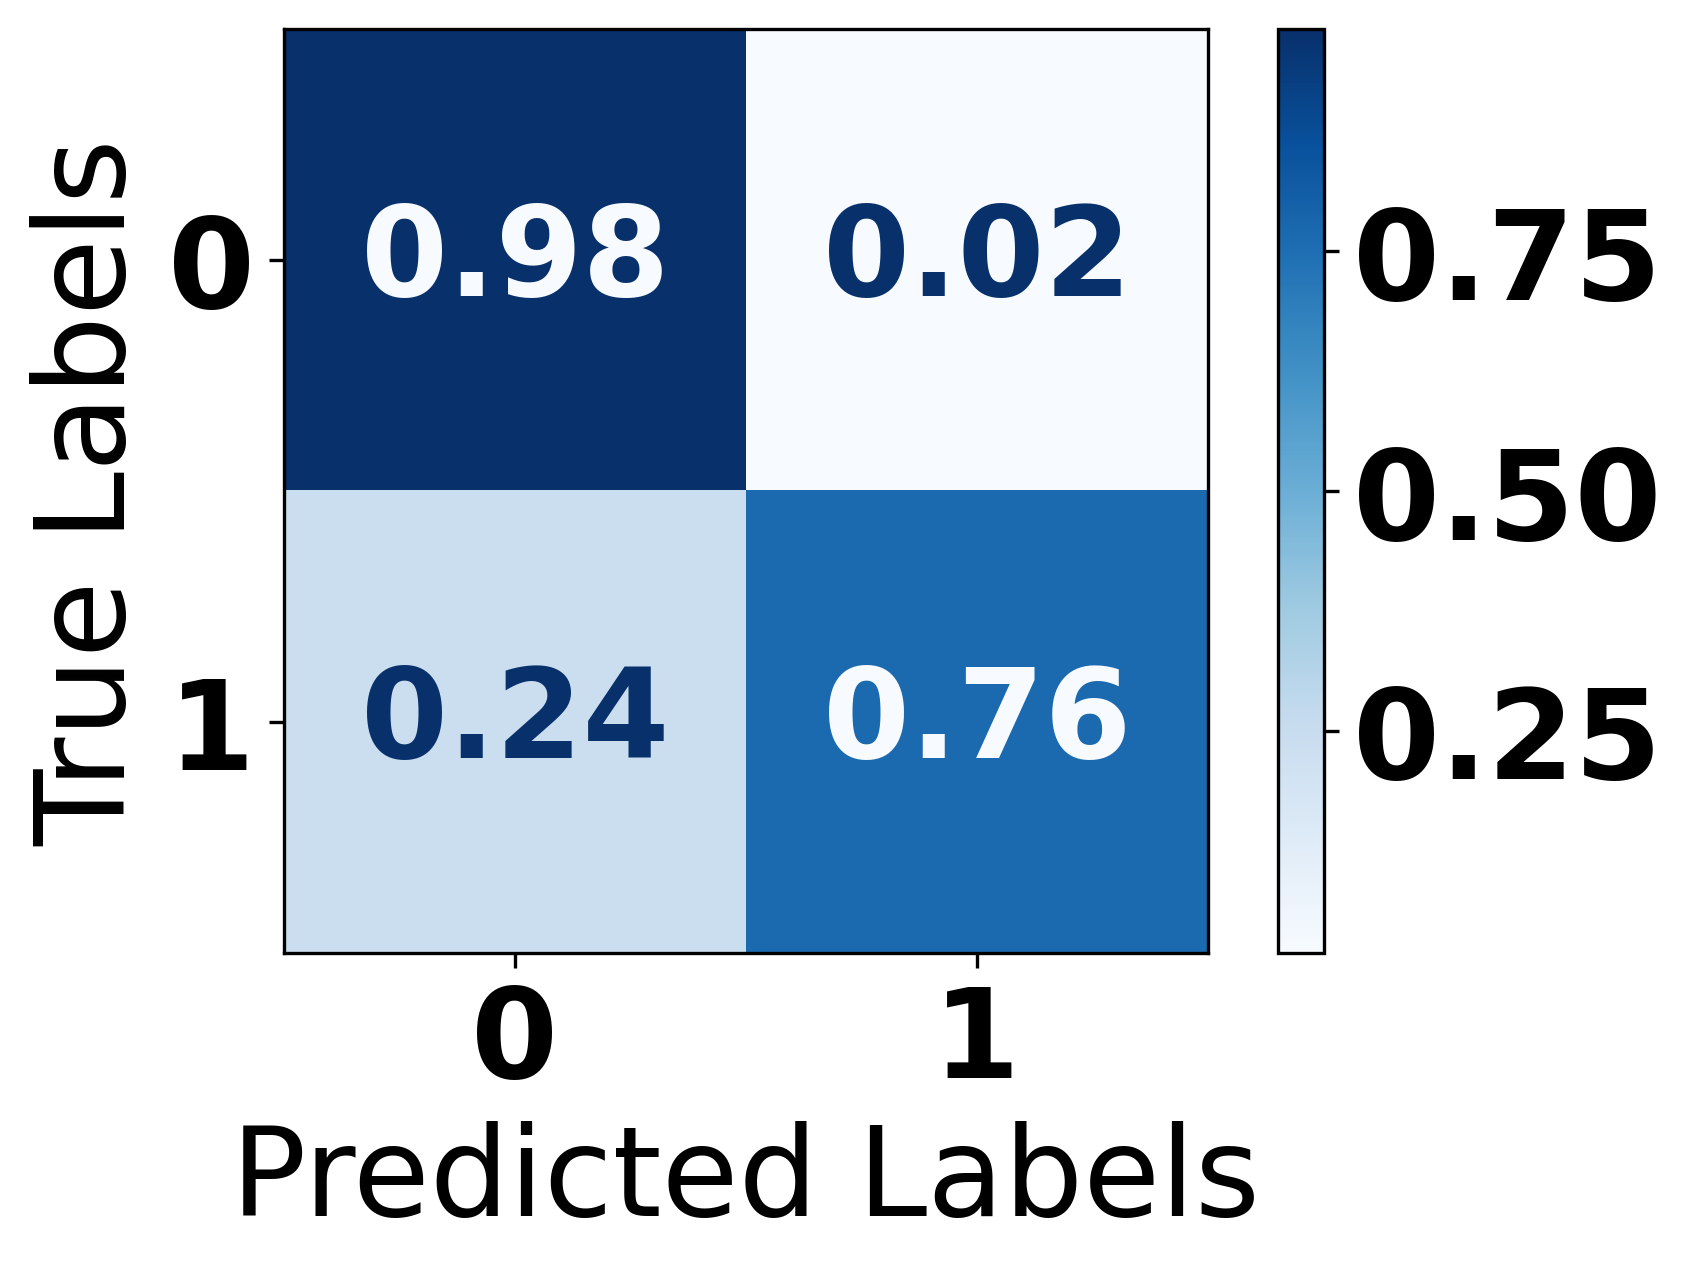

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.93      0.76      0.84        17

    accuracy                           0.93        72
   macro avg       0.93      0.87      0.90        72
weighted avg       0.93      0.93      0.93        72

Train Accuracy: 0.9305555555555556
Test Accuracy: 0.9305555555555556


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=4,      # Only one tree
    max_depth=5,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    #min_samples_split=20, # Require lots of samples to split
    #min_samples_leaf=25,  # Each leaf must have many samples
    random_state=25
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/RF.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


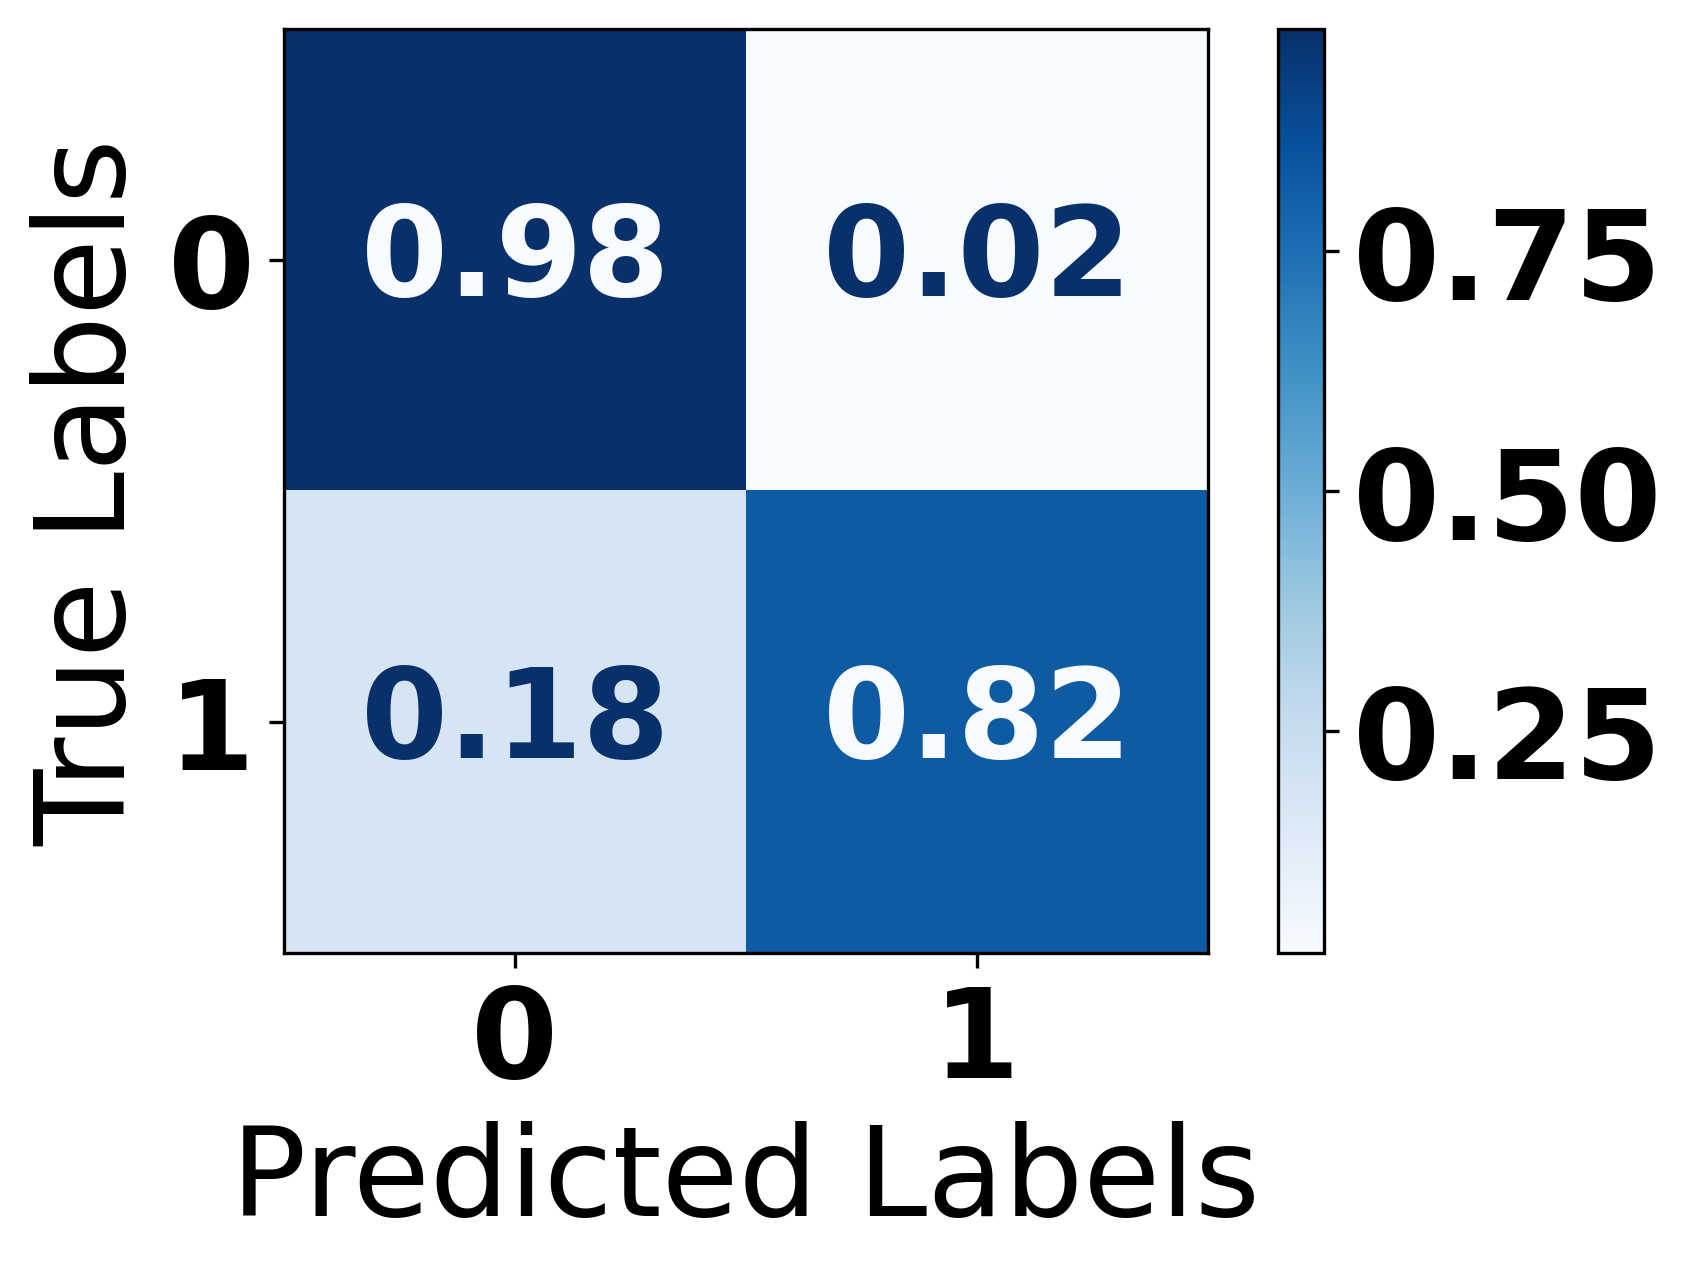

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96        55
           1       0.93      0.82      0.88        17

    accuracy                           0.94        72
   macro avg       0.94      0.90      0.92        72
weighted avg       0.94      0.94      0.94        72

Train Accuracy: 0.9444444444444444
Test Accuracy: 0.9444444444444444


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.002)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/GNB.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


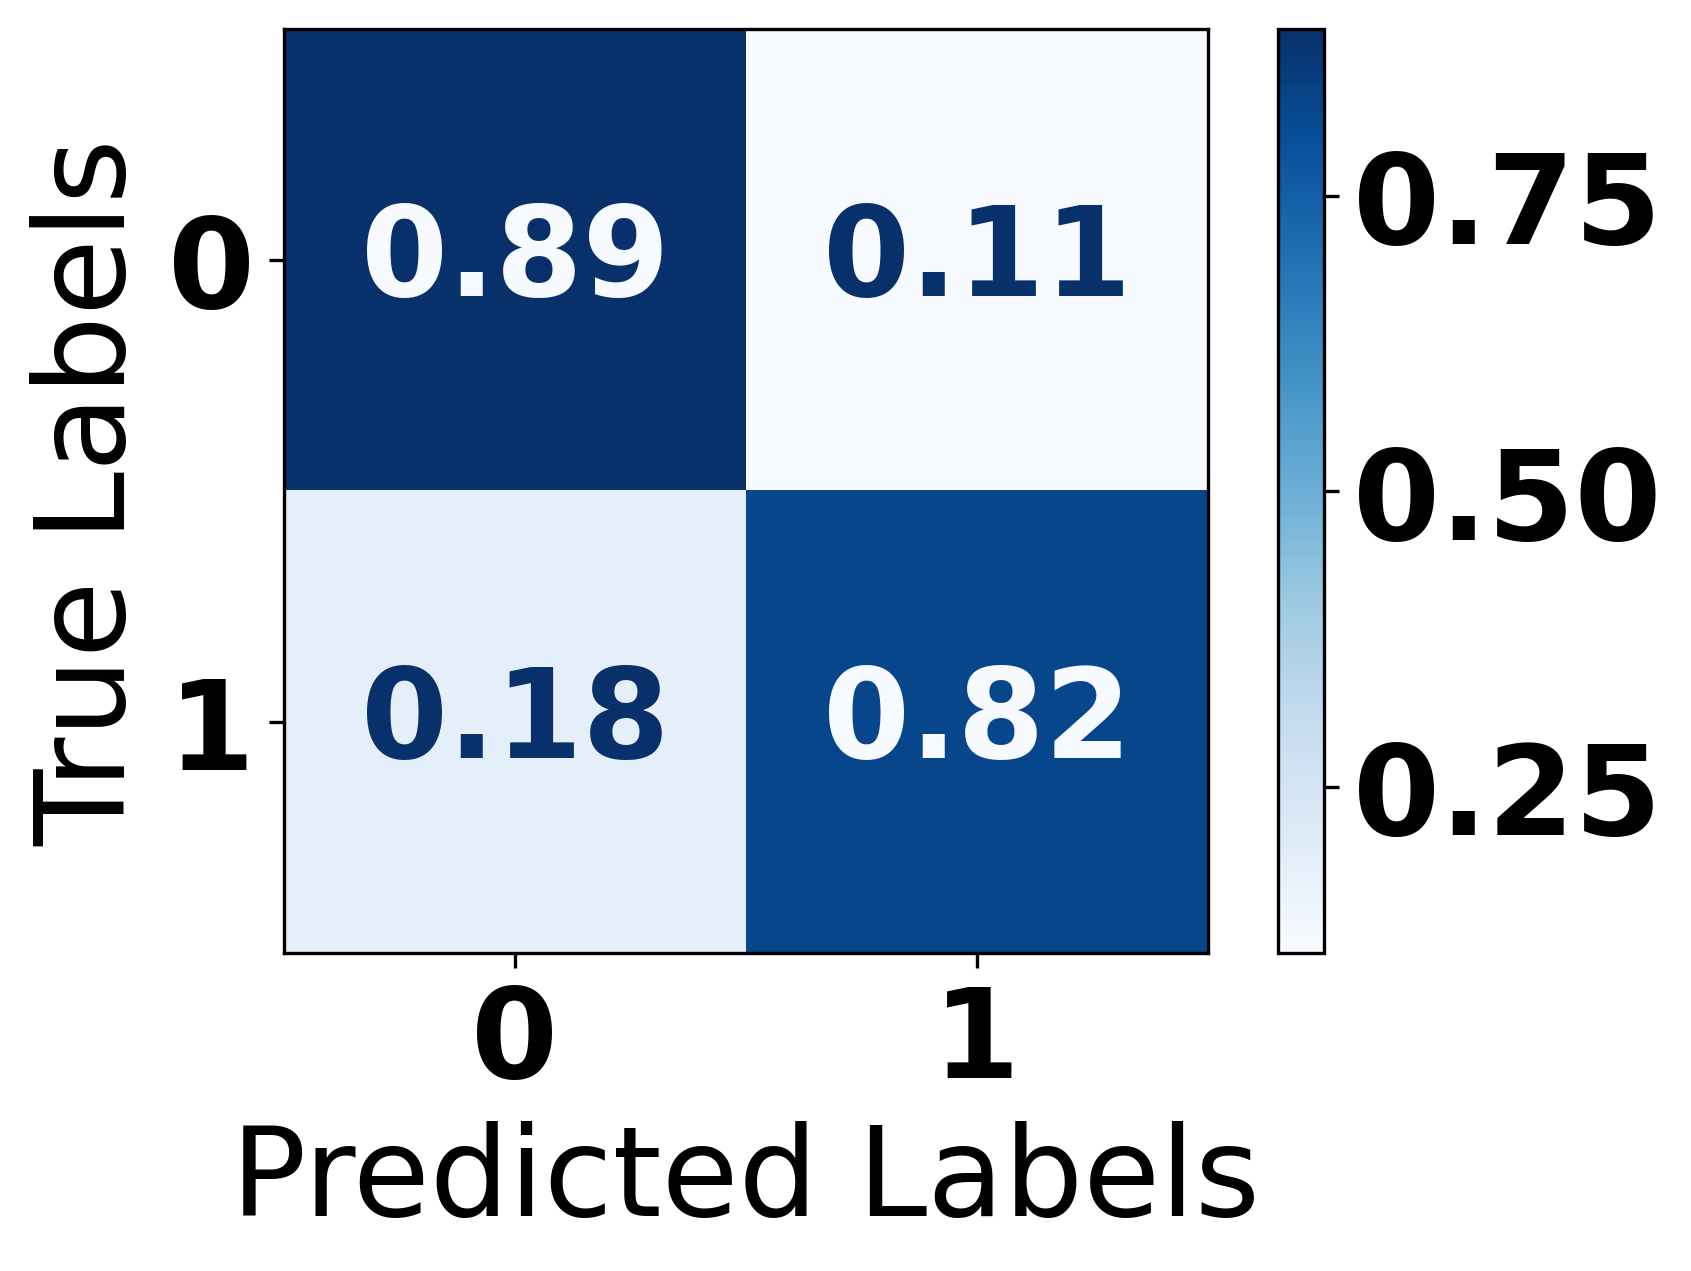

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.92        55
           1       0.70      0.82      0.76        17

    accuracy                           0.88        72
   macro avg       0.82      0.86      0.84        72
weighted avg       0.89      0.88      0.88        72

Train Accuracy: 0.875
Test Accuracy: 0.875


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=10, learning_rate=10, random_state=4)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=24, max_iter=20).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.92727273 0.07272727]
 [0.52941176 0.47058824]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.85      0.93      0.89        55
     Class 1       0.67      0.47      0.55        17

    accuracy                           0.82        72
   macro avg       0.76      0.70      0.72        72
weighted avg       0.81      0.82      0.81        72



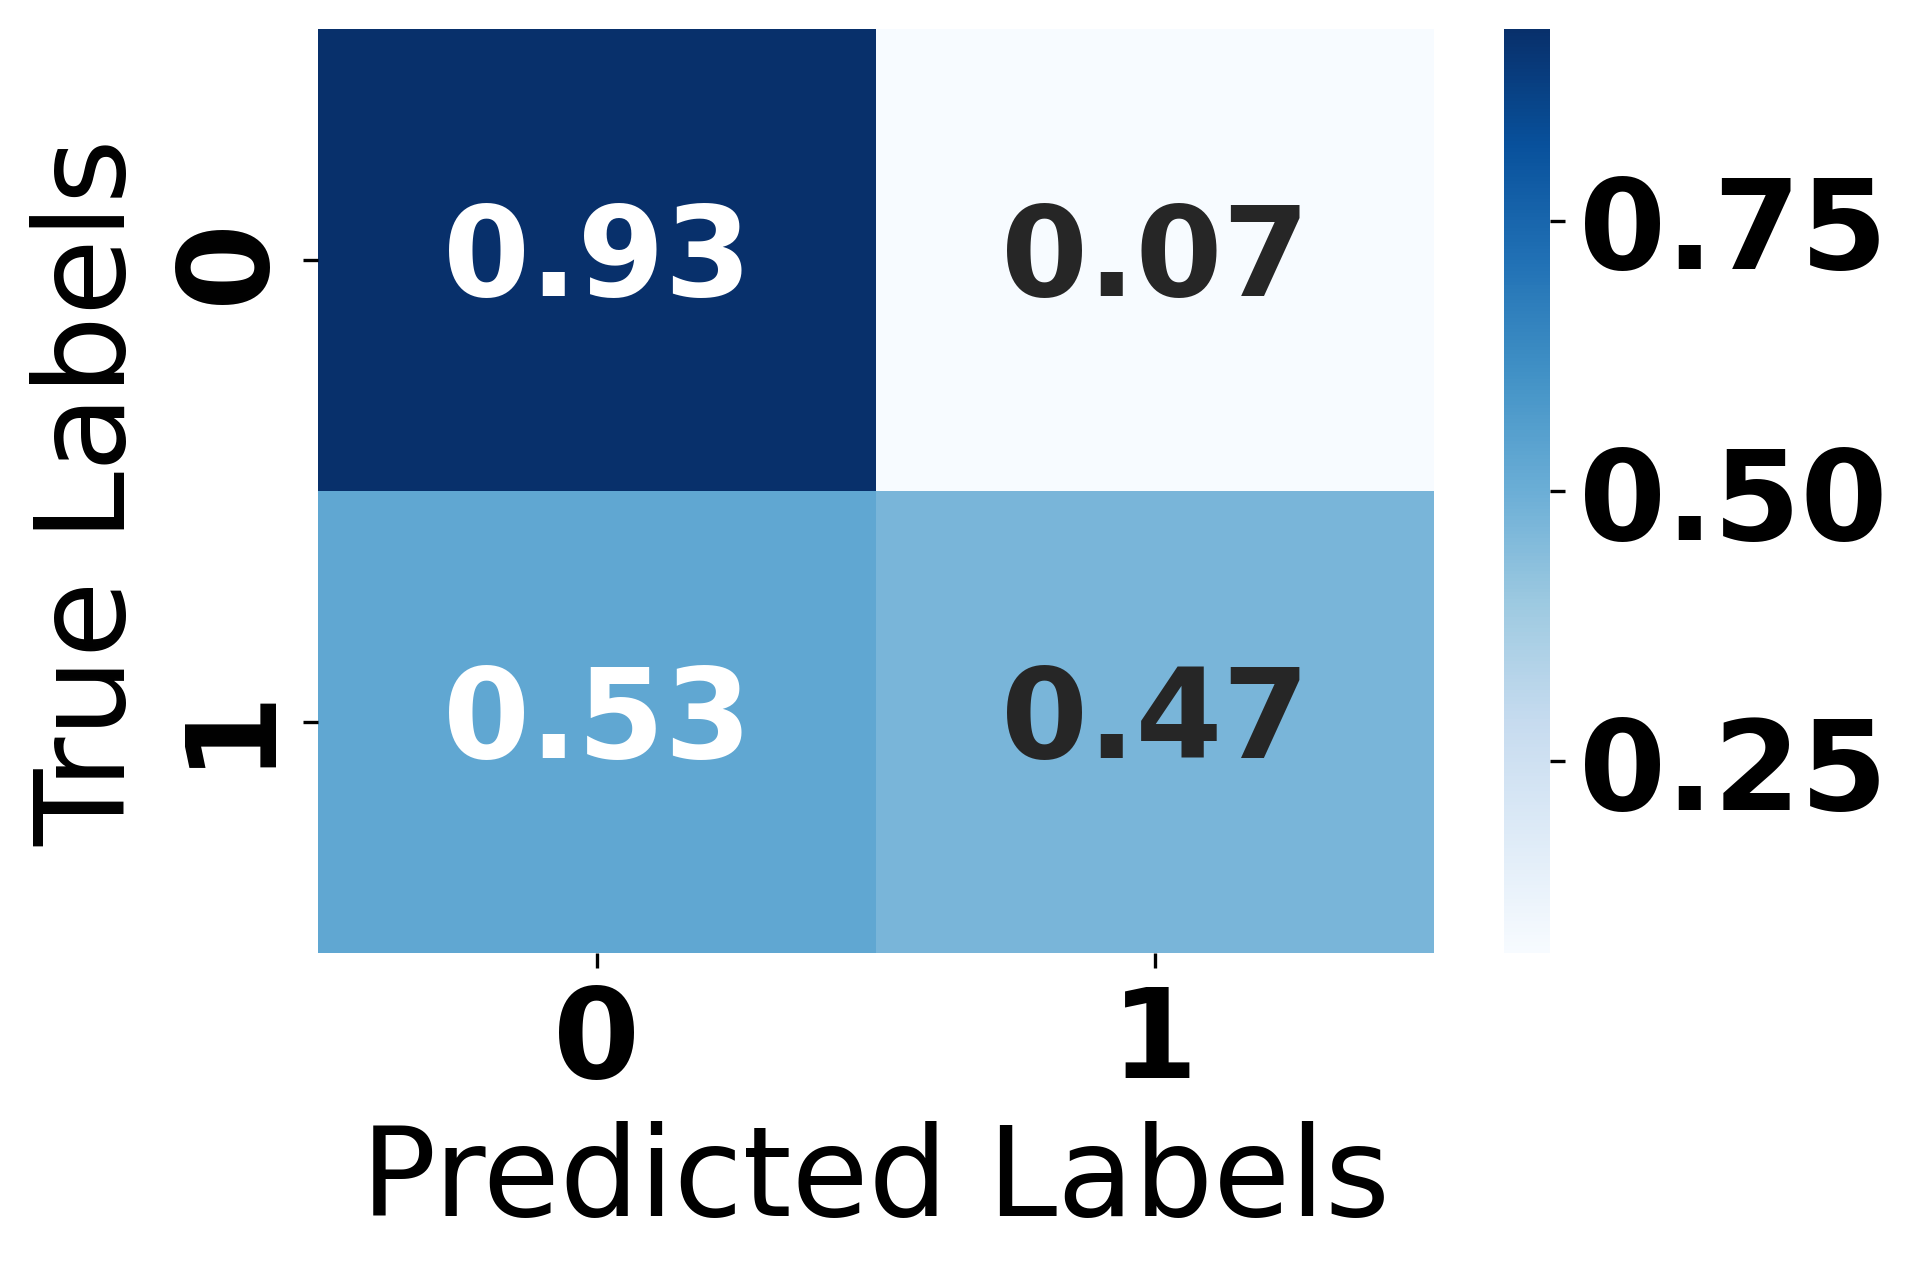

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 0.7639 - loss: 0.7202 - val_accuracy: 0.2361 - val_loss: 1.1889
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2361 - loss: 1.1889 - val_accuracy: 0.7639 - val_loss: 0.6671
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 765ms/step - accuracy: 0.7639 - loss: 0.6671 - val_accuracy: 0.7639 - val_loss: 0.6955
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step - accuracy: 0.7639 - loss: 0.6955 - val_accuracy: 0.7639 - val_loss: 0.7935
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.7639 - loss: 0.7935 - val_accuracy: 0.7639 - val_loss: 0.7495
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.7639 - loss: 0.7495 - val_accuracy: 0.7639 - val_loss: 0.6338
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step - accuracy: 0.7639 - loss: 0.6338 - val_accuracy: 0.7639 - val_loss: 0.5537
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 646ms/step - accuracy: 0.7639 - loss: 0.5537 - val_accuracy: 0.9583 - val_loss: 0.5

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step
Normalized Confusion Matrix:
[[0.98181818 0.01818182]
 [0.11764706 0.88235294]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97        55
     Class 1       0.94      0.88      0.91        17

    accuracy                           0.96        72
   macro avg       0.95      0.93      0.94        72
weighted avg       0.96      0.96      0.96        72



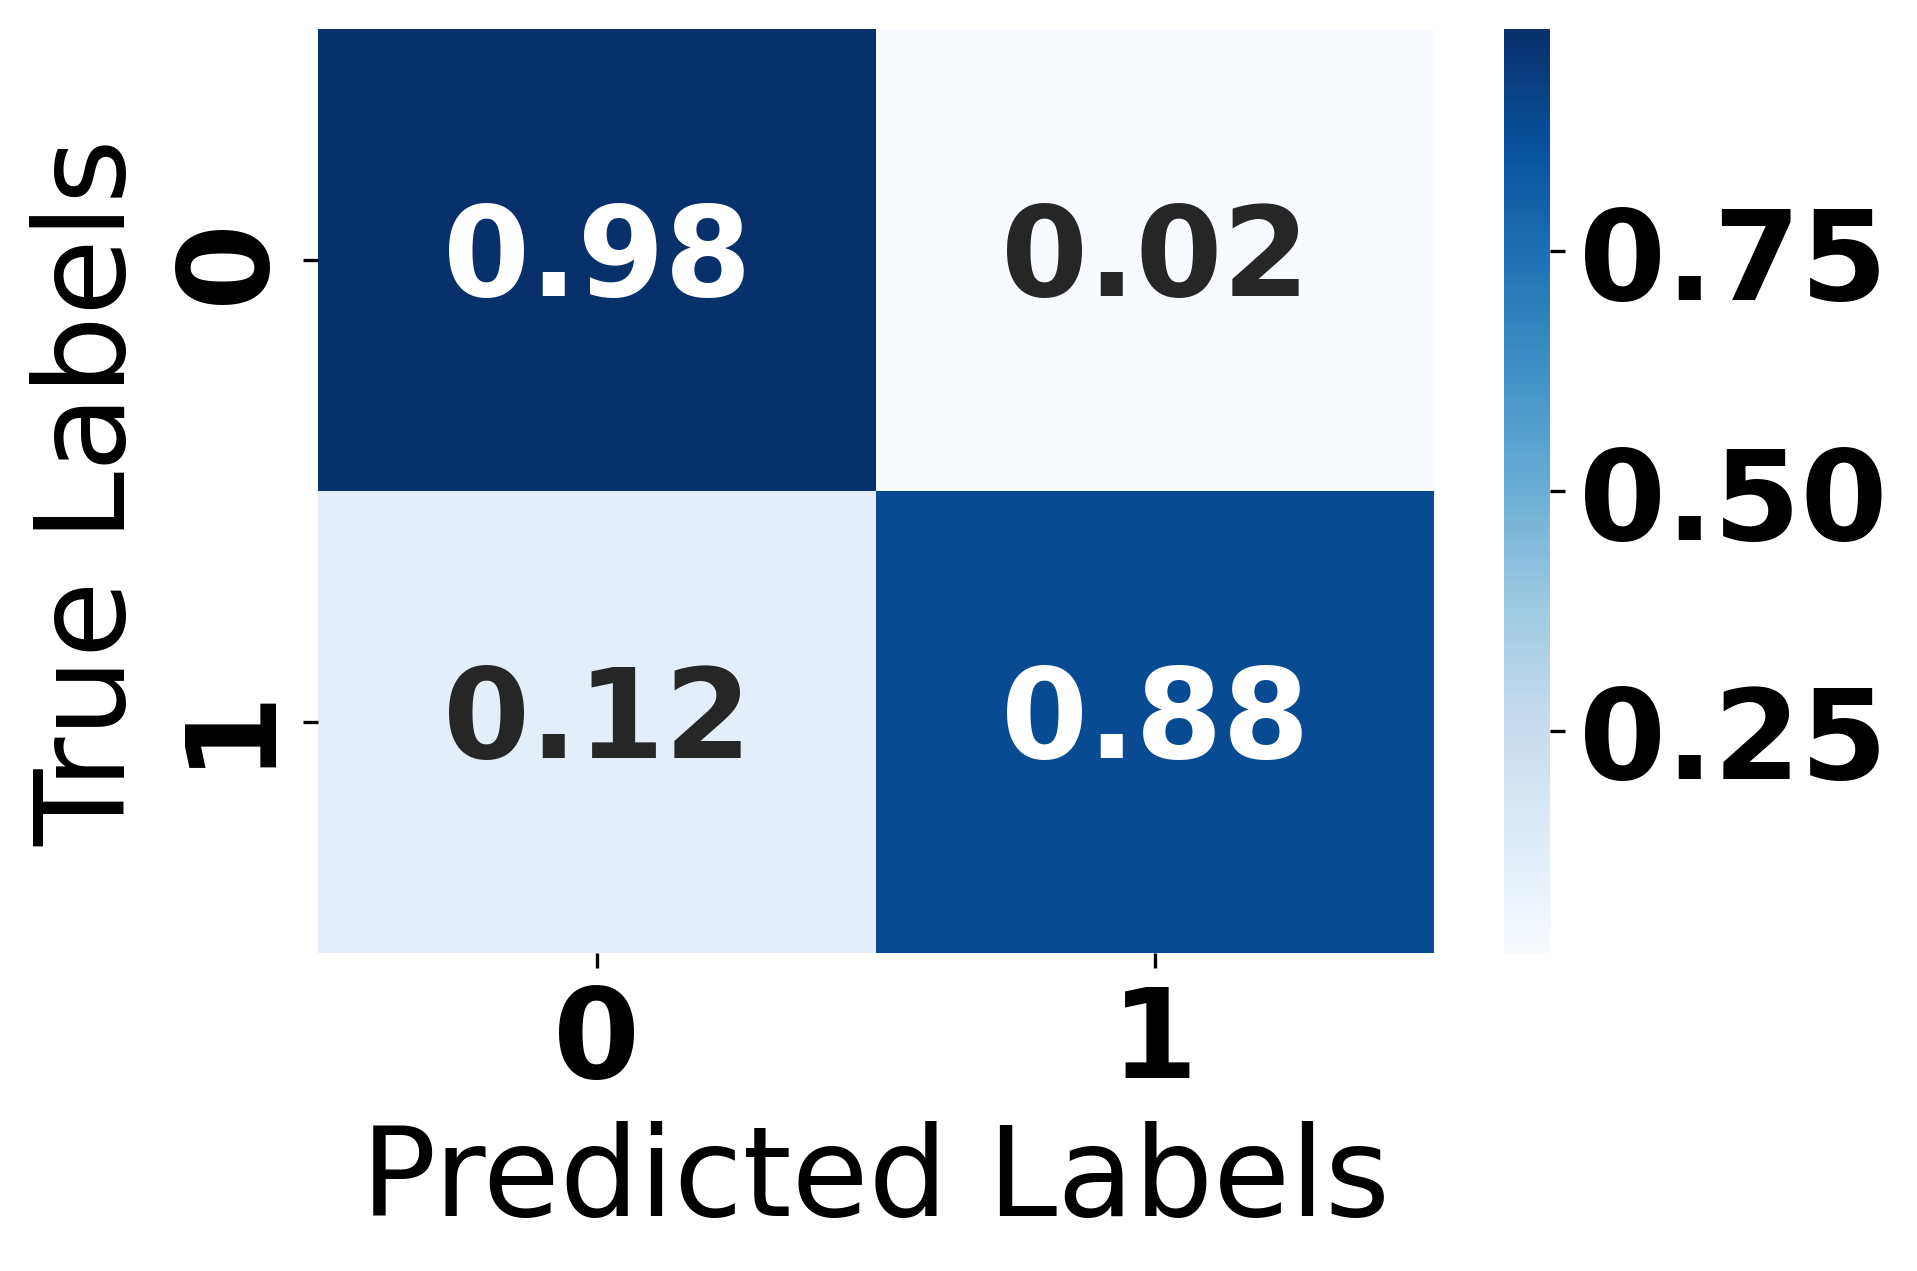

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 7s 7s/step - accuracy: 0.4167 - loss: 0.9762 - val_accuracy: 0.7639 - val_loss: 0.6897
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 828ms/step - accuracy: 0.4583 - loss: 0.8889 - val_accuracy: 0.7639 - val_loss: 0.6542
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.5000 - loss: 0.7848 - val_accuracy: 0.2222 - val_loss: 0.7479
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step - accuracy: 0.4861 - loss: 0.7524 - val_accuracy: 0.2361 - val_loss: 0.9466
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step - accuracy: 0.5694 - loss: 0.7193 - val_accuracy: 0.2361 - val_loss: 1.1746
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step - accuracy: 0.6667 - loss: 0.6584 - val_accuracy: 0.2361 - val_loss: 1.3734
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 375ms/step - accuracy: 0.6806 - loss: 0.5709 - val_accuracy: 0.2361 - val_loss: 1.5521
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6806 - loss: 0.6343 - val_accuracy: 0.2361 - val_loss: 1.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
Normalized Confusion Matrix:
[[0. 1.]
 [0. 1.]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.00      0.00      0.00        55
     Class 1       0.24      1.00      0.38        17

    accuracy                           0.24        72
   macro avg       0.12      0.50      0.19        72
weighted avg       0.06      0.24      0.09        72



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


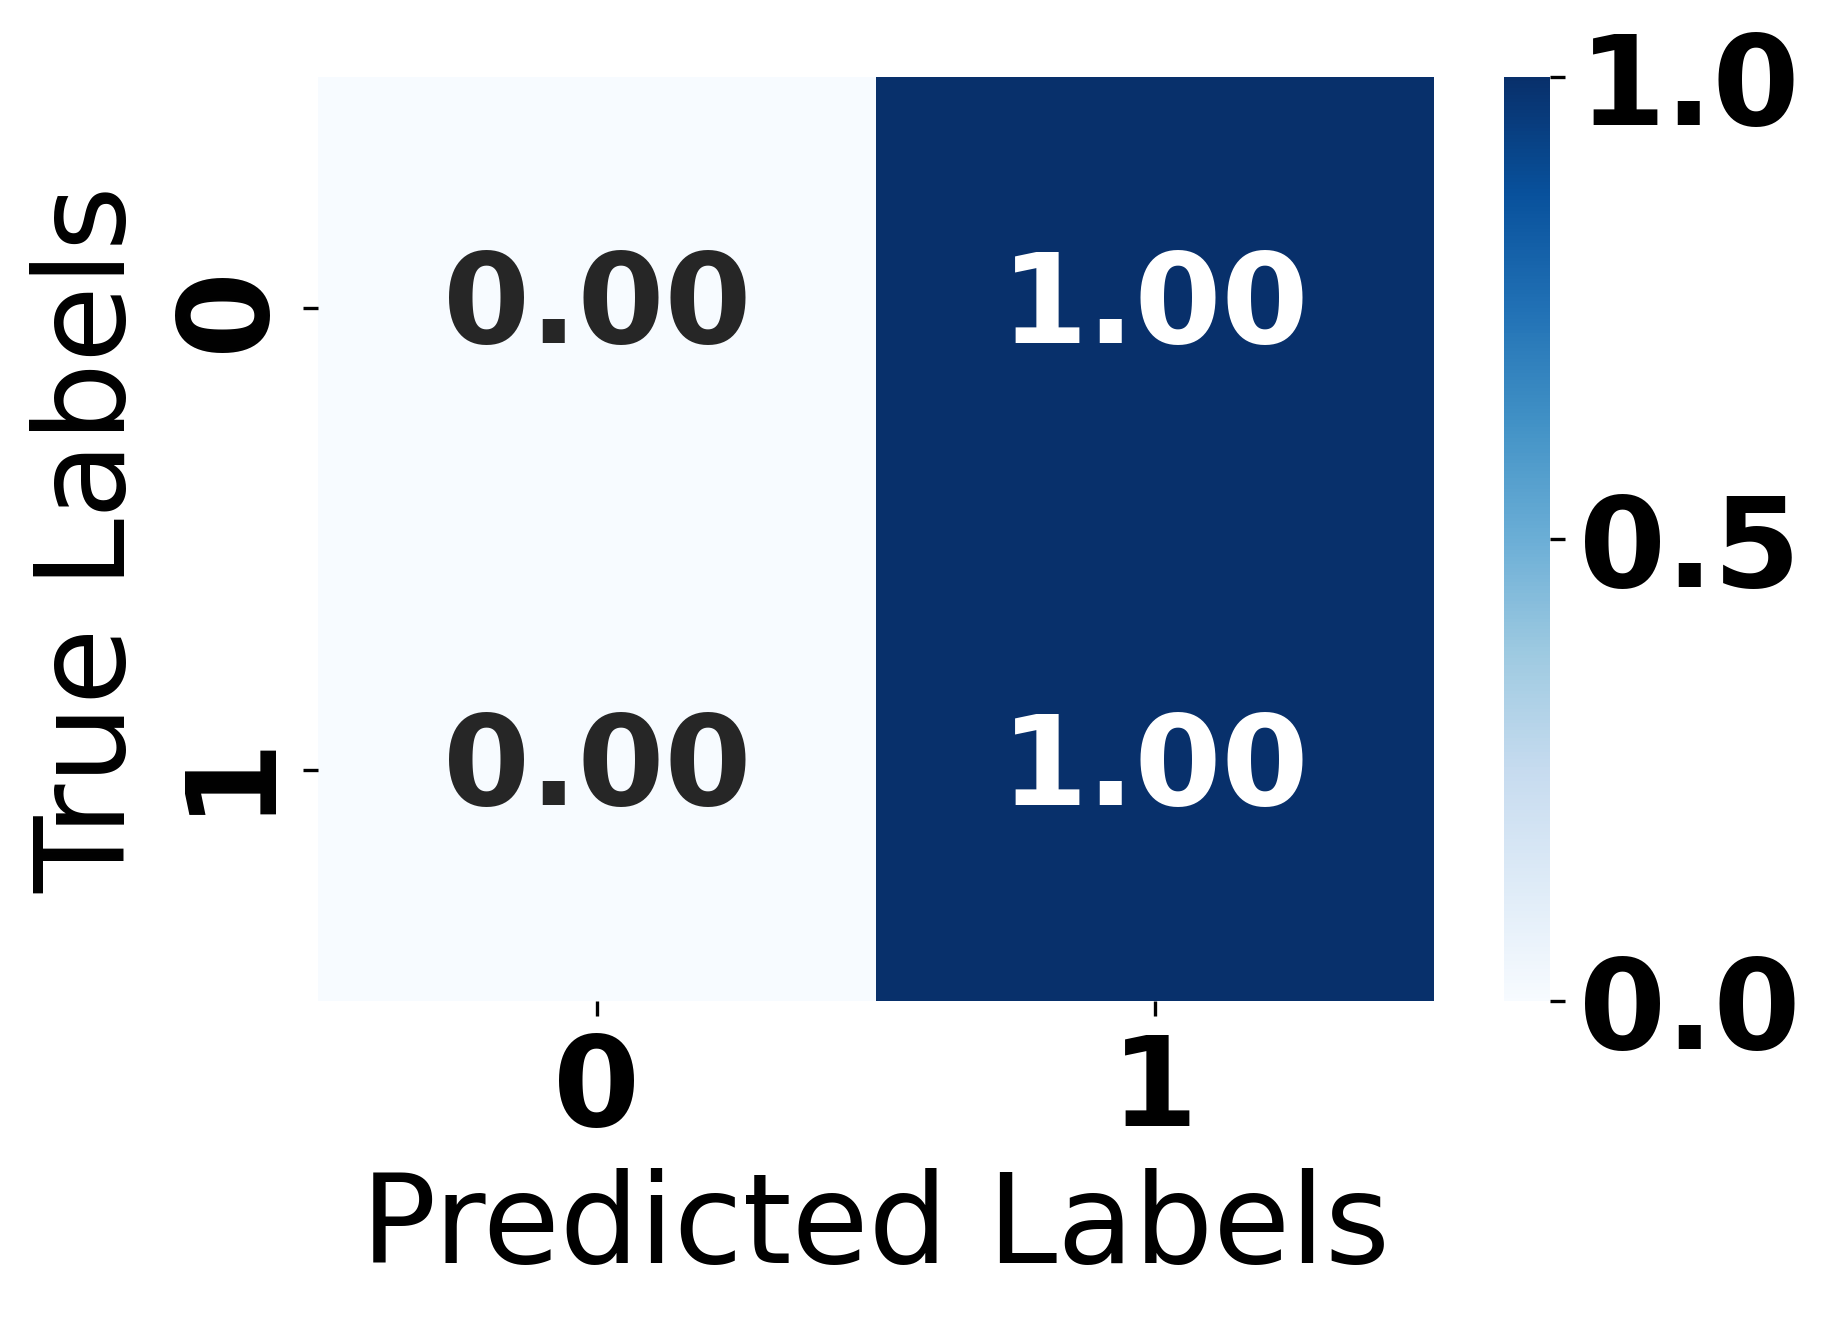

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
vocab_size = 20000  # This should be set according to your dataset
embed_dim = 128  # Embedding size for each token
ff_dim = 128  # Hidden layer size in the feed-forward network

# Create the Transformer model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)

# Compile the model
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the Transformer model
simple_transformer_model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the Transformer model
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.7500 - loss: 0.5518 - val_accuracy: 0.7639 - val_loss: 0.4779
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 302ms/step - accuracy: 0.7639 - loss: 0.5211 - val_accuracy: 0.7639 - val_loss: 0.4677
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step - accuracy: 0.7639 - loss: 0.4974 - val_accuracy: 0.7639 - val_loss: 0.4589
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 218ms/step - accuracy: 0.7639 - loss: 0.4931 - val_accuracy: 0.7639 - val_loss: 0.4510
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step - accuracy: 0.7639 - loss: 0.5010 - val_accuracy: 0.7639 - val_loss: 0.4438
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.7639 - loss: 0.4960 - val_accuracy: 0.7639 - val_loss: 0.4362
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.7639 - loss: 0.4652 - val_accuracy: 0.7639 - val_loss: 0.4286
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 202ms/step - accuracy: 0.7639 - loss: 0.4811 - val_accuracy: 0.7639 - val_loss: 0.

1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 207ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Normalized Confusion Matrix:
[[1.         0.        ]
 [0.76470588 0.23529412]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.81      1.00      0.89        55
     Class 1       1.00      0.24      0.38        17

    accuracy                           0.82        72
   macro avg       0.90      0.62      0.64        72
weighted avg       0.85      0.82      0.77        72



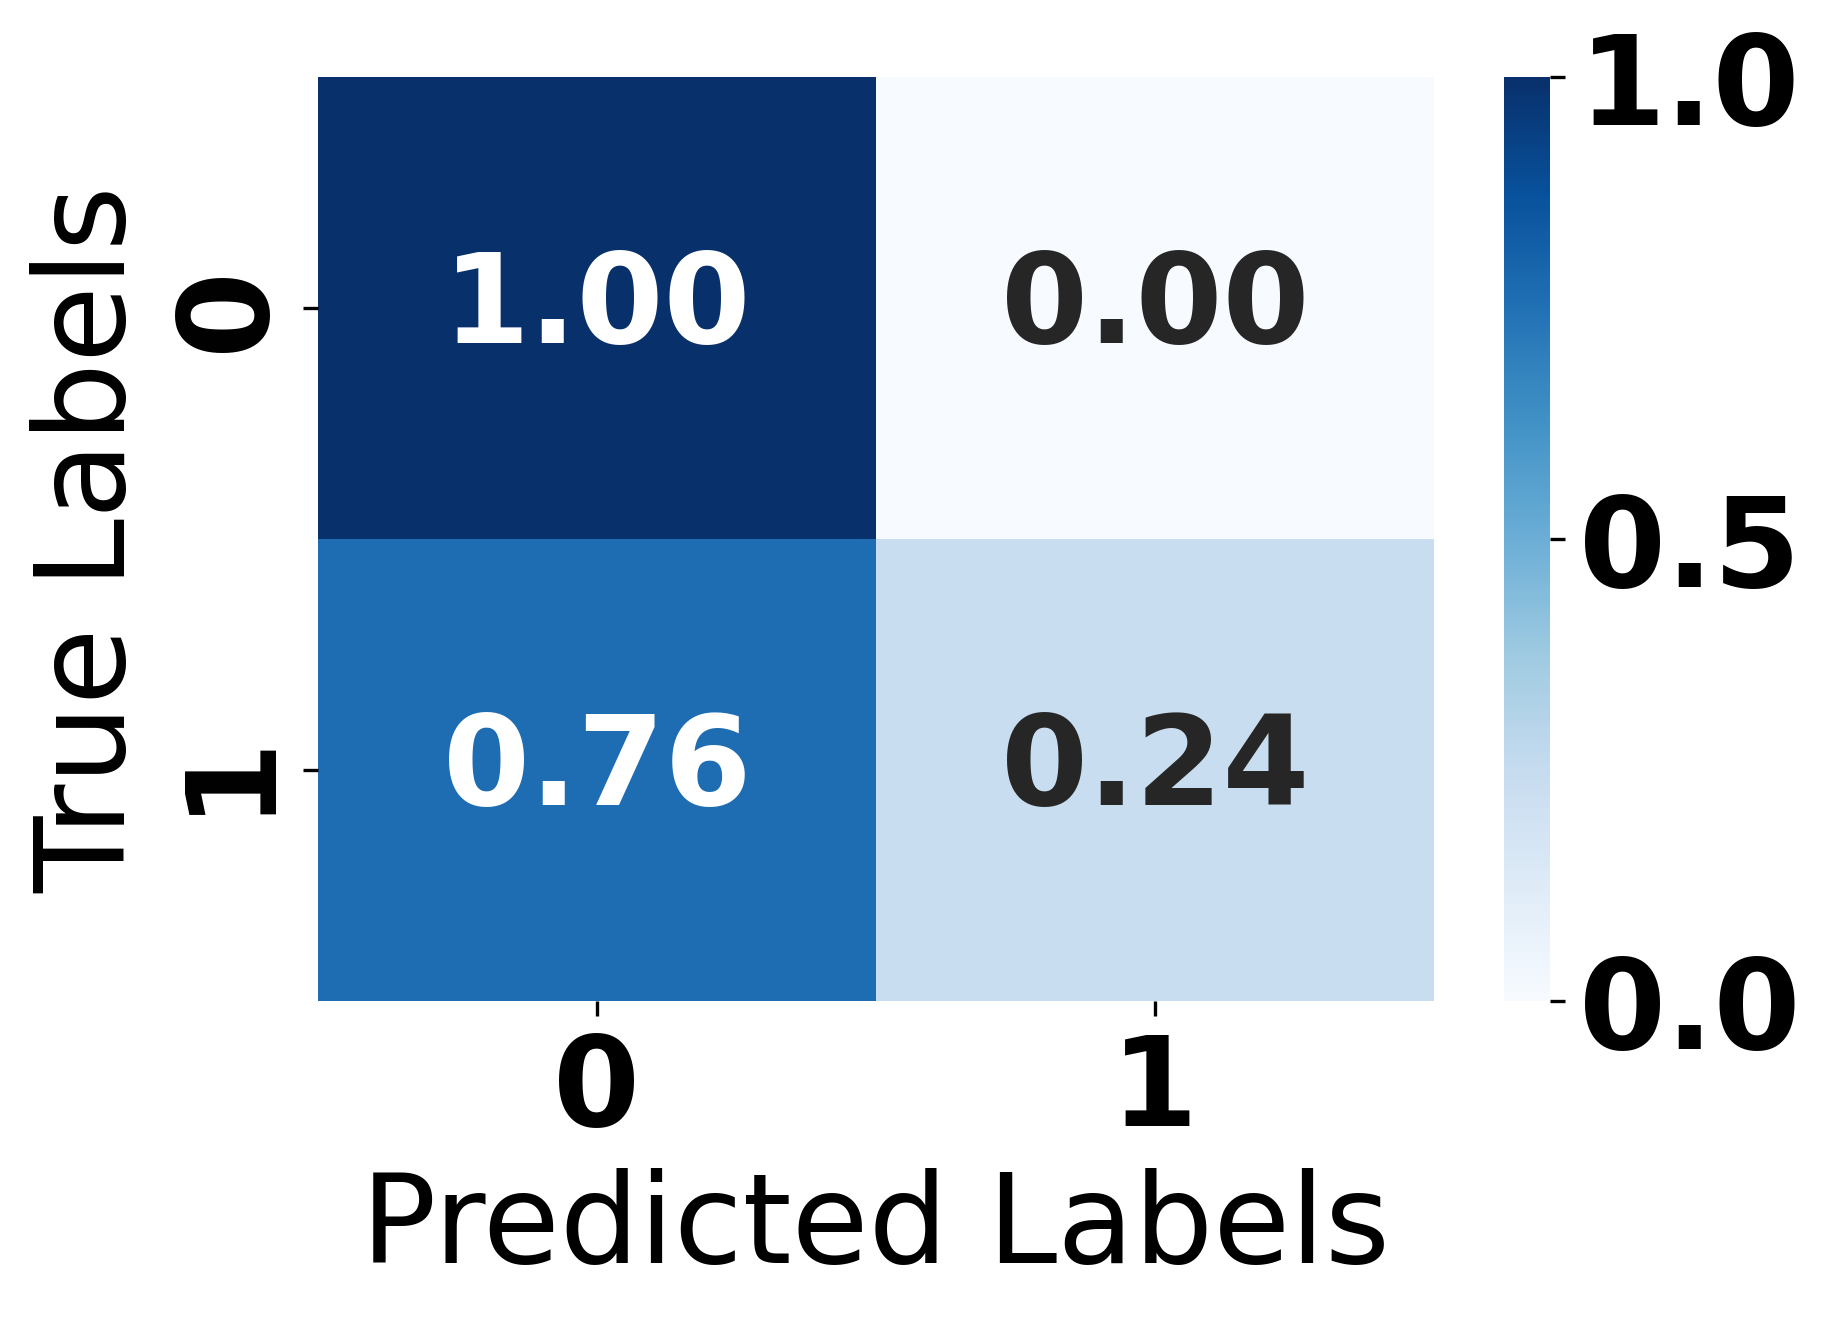

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Model/transformer_model.h5')

### GPT

In [ ]:
pip install --upgrade transformers

In [ ]:
import transformers
print(transformers.__version__)

4.51.3


In [ ]:
pip install transformers datasets scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 18.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system 

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./bad_results",        # new folder
    per_device_train_batch_size=10,    # too large → unstable updates
    num_train_epochs=1,              # too few epochs
    learning_rate=0.01,                 # too high → catastrophic divergence
    weight_decay=0.1,                  # no regularization → overfitting
    logging_dir="./logs",
    logging_steps=10,                 # rarely log → less feedback
    save_steps=15,                  # almost never save
    eval_steps=15,                  # almost never evaluate
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,                  # no warmup → unstable start
    gradient_accumulation_steps=1,
    fp16=False
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=64, training_loss=1.0853097531944513, metrics={'train_runtime': 181.0913, 'train_samples_per_second': 3.534, 'train_steps_per_second': 0.353, 'total_flos': 0.0, 'train_loss': 1.0853097531944513, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.9773    0.7818    0.8687        55
           1     0.5714    0.9412    0.7111        17

    accuracy                         0.8194        72
   macro avg     0.7744    0.8615    0.7899        72
weighted avg     0.8814    0.8194    0.8315        72

Confusion Matrix:
 [[43 12]
 [ 1 16]]


### CTGAN for Synthetic Data Generation

In [ ]:
# Define the path
test_load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Actual"
train_load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Actual/Preprocessed"
# Load the files
x_train = pd.read_csv(f"{train_load_path}/x_train.csv")
x_test = pd.read_csv(f"{test_load_path}/x_test.csv")
y_train = pd.read_csv(f"{train_load_path}/y_train.csv")
y_test = pd.read_csv(f"{test_load_path}/y_test.csv")

print("Files loaded successfully!")

Files loaded successfully!


In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.9/157.9 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 95.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.3/69.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.4/193.4 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 63.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 62.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 34.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/

In [ ]:
!pip install sdv --upgrade

In [ ]:
!pip install sdv==0.16.0

ERROR: Ignored the following yanked versions: 1.13.0
ERROR: Ignored the following versions that require a different python version: 0.10.0 Requires-Python >=3.6,<3.9; 0.10.0.dev0 Requires-Python >=3.6,<3.9; 0.10.1 Requires-Python >=3.6,<3.9; 0.10.1.dev0 Requires-Python >=3.6,<3.9; 0.11.0 Requires-Python >=3.6,<3.9; 0.11.0.dev0 Requires-Python >=3.6,<3.9; 0.12.0 Requires-Python >=3.6,<3.9; 0.12.0.dev0 Requires-Python >=3.6,<3.9; 0.12.0.dev1 Requires-Python >=3.6,<3.9; 0.12.1 Requires-Python >=3.6,<3.9; 0.12.1.dev0 Requires-Python >=3.6,<3.9; 0.13.0 Requires-Python >=3.6,<3.10; 0.13.0.dev0 Requires-Python >=3.6,<3.10; 0.13.1 Requires-Python >=3.6,<3.10; 0.13.1.dev0 Requires-Python >=3.6,<3.10; 0.14.0 Requires-Python >=3.6,<3.10; 0.14.0.dev0 Requires-Python >=3.6,<3.10; 0.14.0.dev1 Requires-Python >=3.6,<3.10; 0.14.0.dev2 Requires-Python >=3.6,<3.10; 0.14.1 Requires-Python >=3.6,<3.10; 0.14.1.dev0 Requires-Python >=3.6,<3.10; 0.15.0 Requires-Python >=3.6,<3.10; 0.15.0.dev0 Requires-Python

In [ ]:
!pip install ctgan

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.3/74.3 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 11.1 MB/s eta 0:00:00


In [ ]:
from ctgan import CTGAN
from collections import Counter
import pandas as pd
import numpy as np

# Define categorical feature indices
categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Ensure y_train is a 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Combine x_train and y_train into one DataFrame
x_train['target'] = y_train

# Print original distribution
print("Before CTGAN:", Counter(y_train))

# Separate minority class (1)
minority_df = x_train[x_train['target'] == 1]

# Estimate how many synthetic samples you want
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Get categorical column names from indices
categorical_columns = x_train.columns[categorical_features].tolist() + ['target']

# Fit CTGAN on minority class
ctgan = CTGAN(epochs=300)
ctgan.fit(minority_df, discrete_columns=categorical_columns)

# Generate synthetic samples
synthetic_minority = ctgan.sample(samples_to_generate)

# Ensure only class 1 is included
synthetic_minority = synthetic_minority[synthetic_minority['target'] == 1]

# Separate features and target
synthetic_x_train = synthetic_minority.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_minority['target'].reset_index(drop=True)

# Combine real and synthetic data
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Final distribution
print("After CTGAN:", Counter(y_resampled_df))

Before CTGAN: Counter({np.int64(0): 220, np.int64(1): 91})
After CTGAN: Counter({1: 420, 0: 220})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for Age:
Age
31    27
38    21
33    19
40    18
28    17
      ..
94     1
93     1
98     1
10     1
95     1
Name: count, Length: 89, dtype: int64

Counts for Gender:
Gender
0    439
1    201
Name: count, dtype: int64

Counts for Smoking:
Smoking
0    421
1    219
Name: count, dtype: int64

Counts for Hx Smoking:
Hx Smoking
0    554
1     86
Name: count, dtype: int64

Counts for Hx Radiothreapy:
Hx Radiothreapy
0    597
1     43
Name: count, dtype: int64

Counts for Thyroid Function:
Thyroid Function
0    559
3     38
2     23
4     18
1      2
Name: count, dtype: int64

Counts for Physical Examination:
Physical Examination
3    259
1    212
2    149
0     15
4      5
Name: count, dtype: int64

Counts for Adenopathy:
Adenopathy
0    342
2    107
3     96
1     56
4     31
5      8
Name: count, dtype: int64

Counts for Pathology:
Pathology
0    501
2     62
1     42
3     35
Name: count, dtype: int64

Counts for Focality:
Focality
0    322
1    318
Name: count, dtype: int64

C

In [ ]:
x_resampled_df.head()

Age  Gender  Smoking  Hx Smoking  Hx Radiothreapy  Thyroid Function  \
0   41       0        0           0                0                 0   
1   30       0        0           0                0                 2   
2   37       0        0           0                0                 3   
3   42       0        0           0                0                 0   
4   32       0        0           0                0                 0   

   Physical Examination  Adenopathy  Pathology  Focality  Risk  T  N  M  \
0                     1           0          0         1     0  3  0  0   
1                     0           0          1         0     0  0  0  0   
2                     2           0          0         1     1  4  1  1   
3                     3           0          0         0     0  2  0  0   
4                     2           1          0         1     1  3  2  0   

   Stage  Response  
0      0         0  
1      0         0  
2      1         3  
3      0         0  
4      0         3

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for Age:
Age
31    27
38    21
33    19
40    18
28    17
      ..
94     1
93     1
98     1
10     1
95     1
Name: count, Length: 89, dtype: int64

Counts for Gender:
Gender
0    439
1    201
Name: count, dtype: int64

Counts for Smoking:
Smoking
0    421
1    219
Name: count, dtype: int64

Counts for Hx Smoking:
Hx Smoking
0    554
1     86
Name: count, dtype: int64

Counts for Hx Radiothreapy:
Hx Radiothreapy
0    597
1     43
Name: count, dtype: int64

Counts for Thyroid Function:
Thyroid Function
0    559
3     38
2     23
4     18
1      2
Name: count, dtype: int64

Counts for Physical Examination:
Physical Examination
3    259
1    212
2    149
0     15
4      5
Name: count, dtype: int64

Counts for Adenopathy:
Adenopathy
0    342
2    107
3     96
1     56
4     31
5      8
Name: count, dtype: int64

Counts for Pathology:
Pathology
0    501
2     62
1     42
3     35
Name: count, dtype: int64

Counts for Focality:
Focality
0    322
1    318
Name: count, dtype: int64

C

### Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

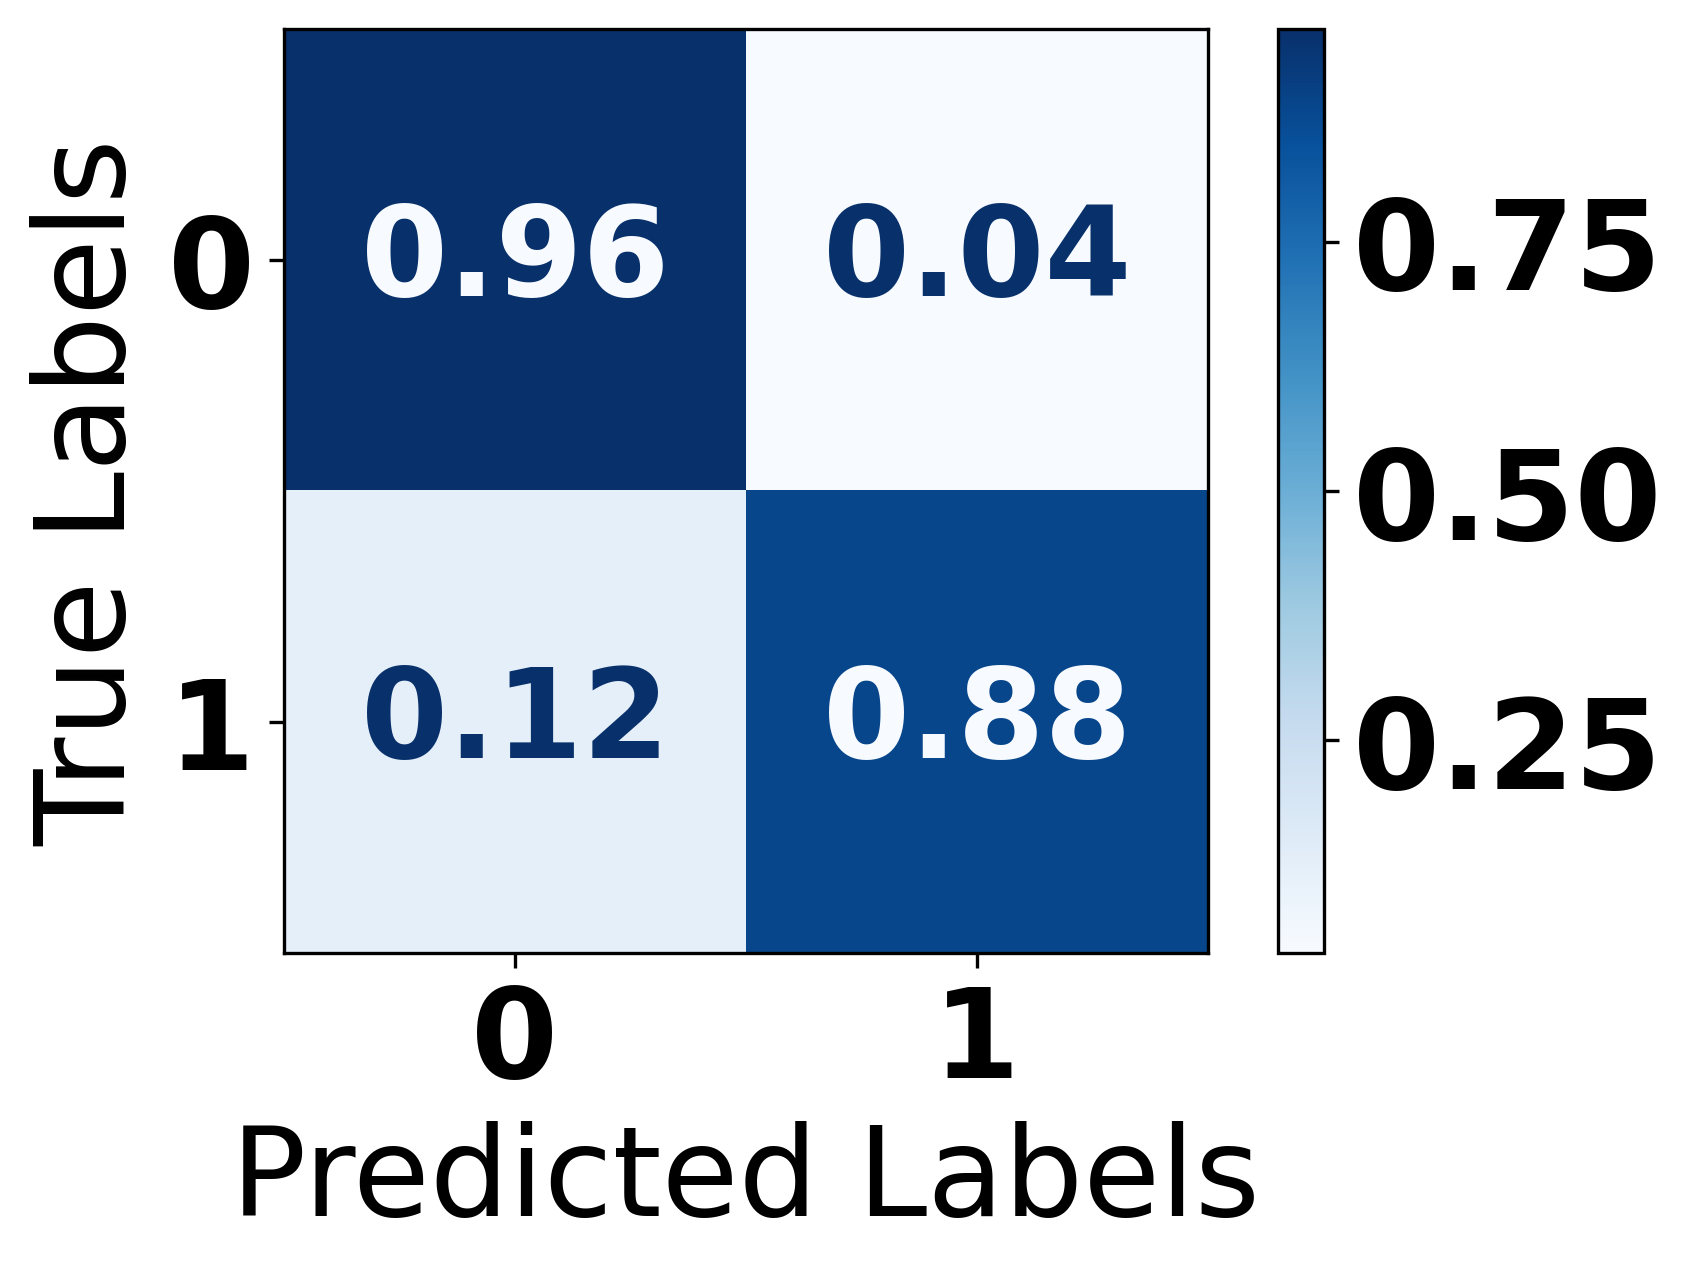

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.96      0.96        55
     Class 1       0.88      0.88      0.88        17

    accuracy                           0.94        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.94      0.94      0.94        72

Train Accuracy: 1.0
Test Accuracy: 0.9444444444444444


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/DT.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


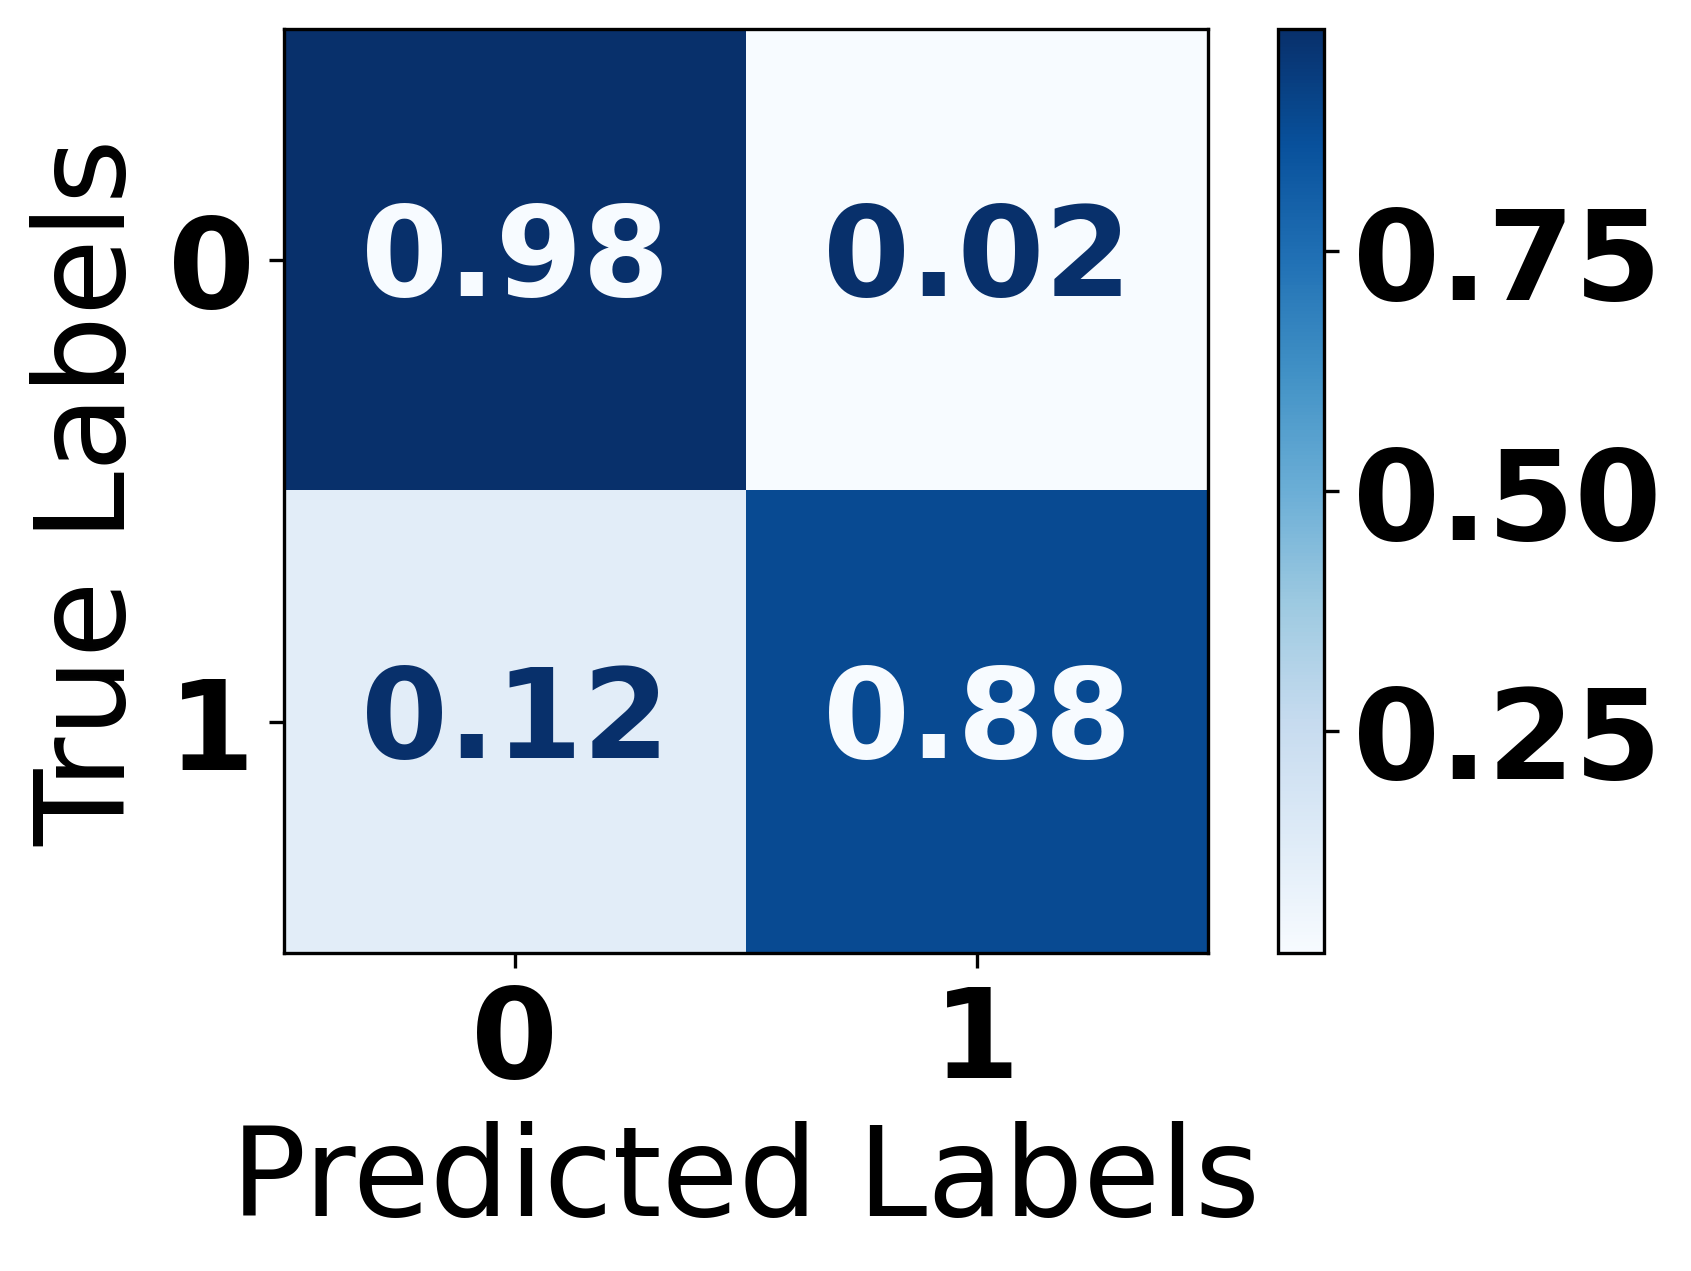

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97        55
     Class 1       0.94      0.88      0.91        17

    accuracy                           0.96        72
   macro avg       0.95      0.93      0.94        72
weighted avg       0.96      0.96      0.96        72

Train Accuracy: 0.9328125
Test Accuracy: 0.9583333333333334


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/RUSBoost.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


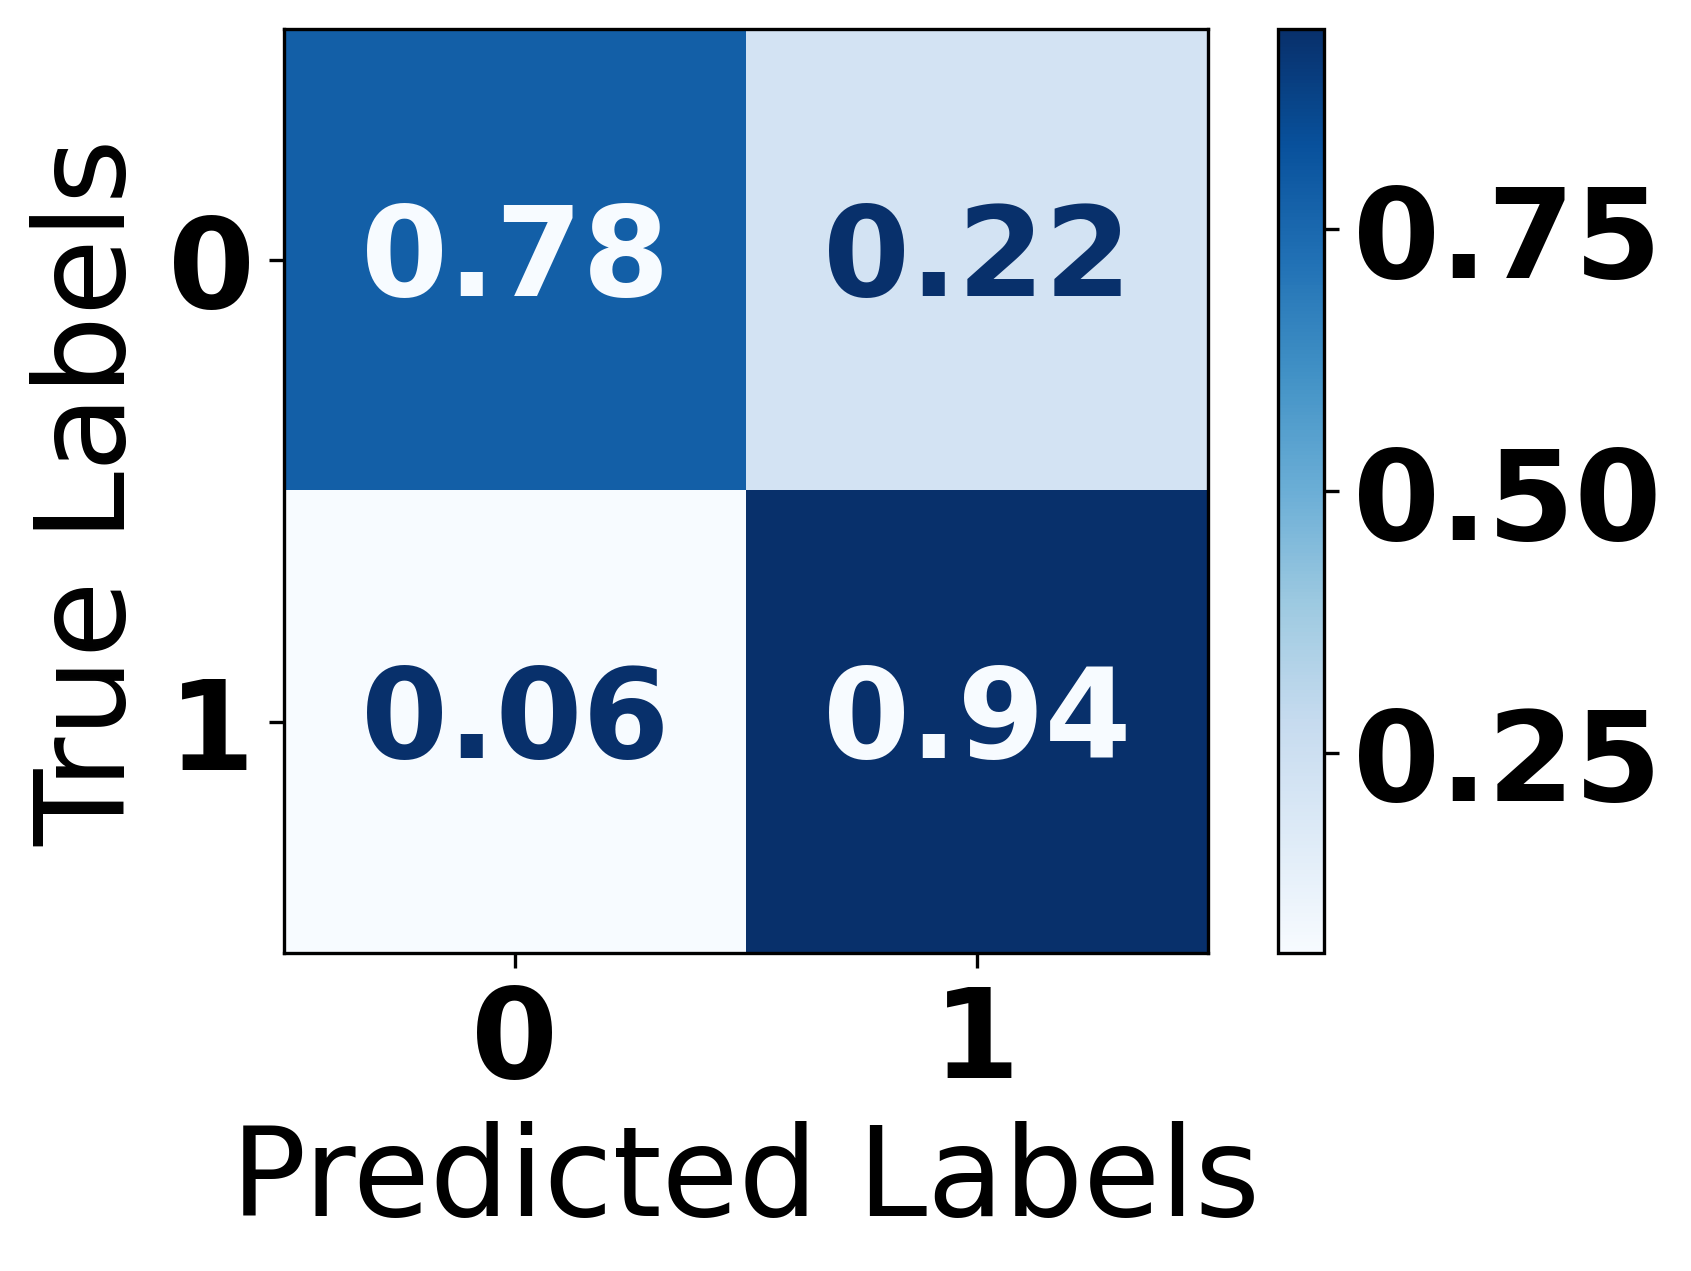

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87        55
           1       0.57      0.94      0.71        17

    accuracy                           0.82        72
   macro avg       0.77      0.86      0.79        72
weighted avg       0.88      0.82      0.83        72

Train Accuracy: 0.8921875
Test Accuracy: 0.8194444444444444


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=2,      # Only one tree
    max_depth=5,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=20, # Require lots of samples to split
    min_samples_leaf=25,  # Each leaf must have many samples
    random_state=2
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/RF.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


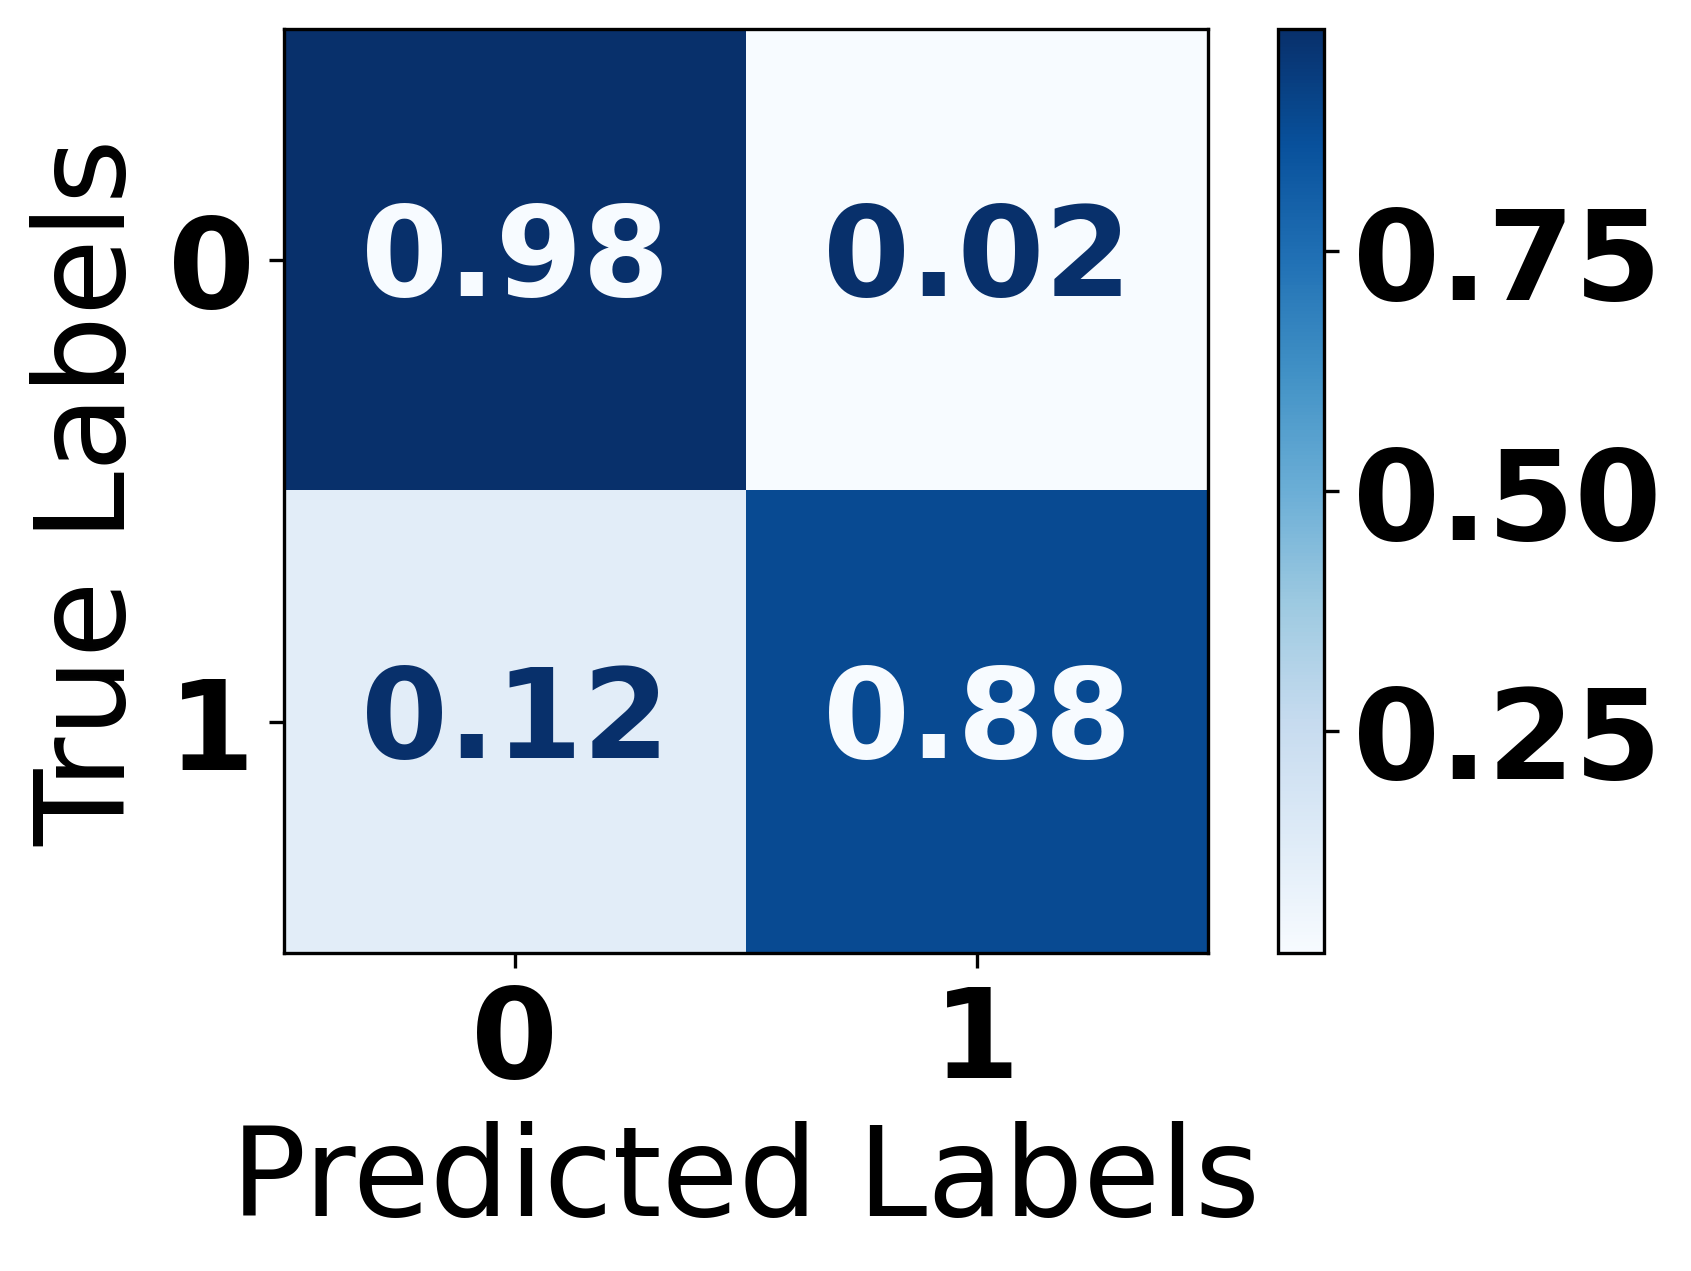

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.94      0.88      0.91        17

    accuracy                           0.96        72
   macro avg       0.95      0.93      0.94        72
weighted avg       0.96      0.96      0.96        72

Train Accuracy: 0.9671875
Test Accuracy: 0.9583333333333334


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.002)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/GNB.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


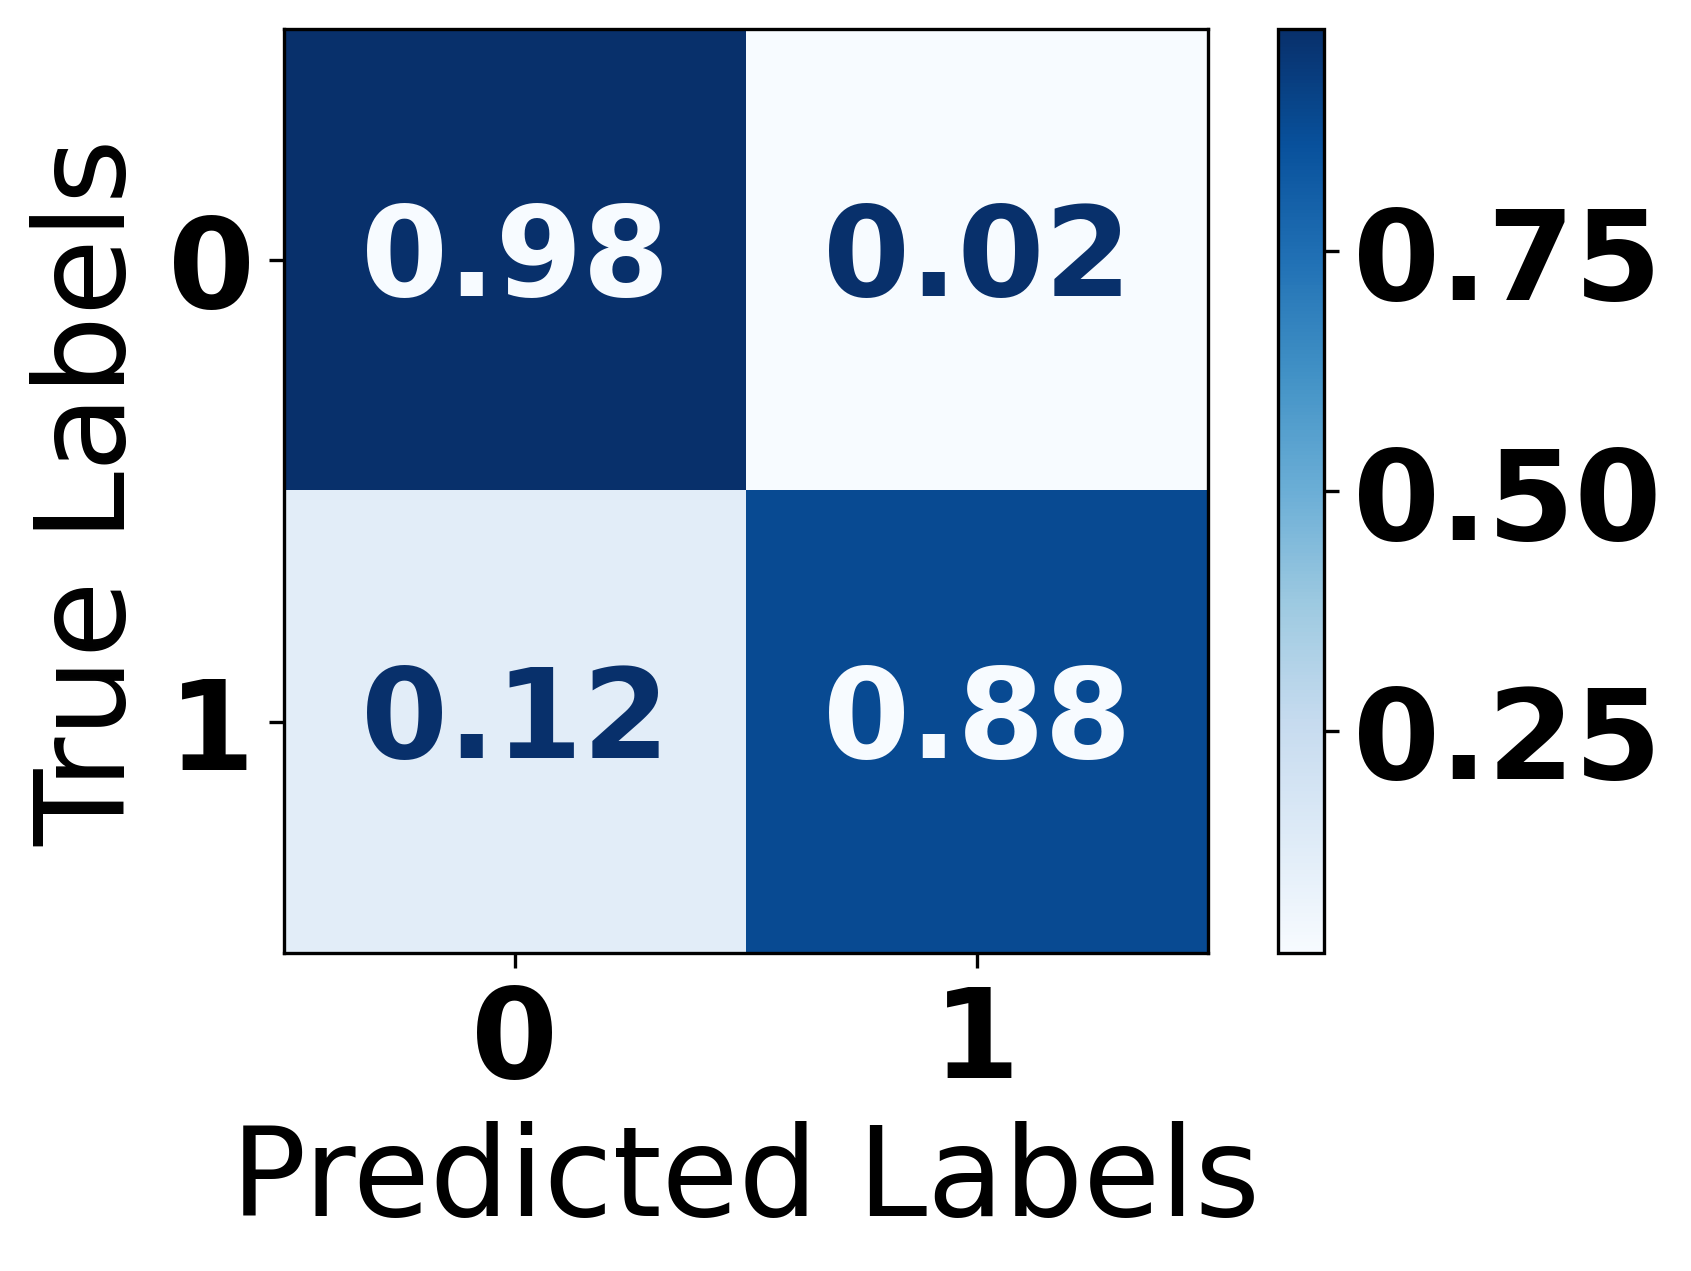

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.94      0.88      0.91        17

    accuracy                           0.96        72
   macro avg       0.95      0.93      0.94        72
weighted avg       0.96      0.96      0.96        72

Train Accuracy: 0.9328125
Test Accuracy: 0.9583333333333334


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=0.4, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=10).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.8        0.2       ]
 [0.11764706 0.88235294]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.80      0.87        55
     Class 1       0.58      0.88      0.70        17

    accuracy                           0.82        72
   macro avg       0.77      0.84      0.78        72
weighted avg       0.87      0.82      0.83        72



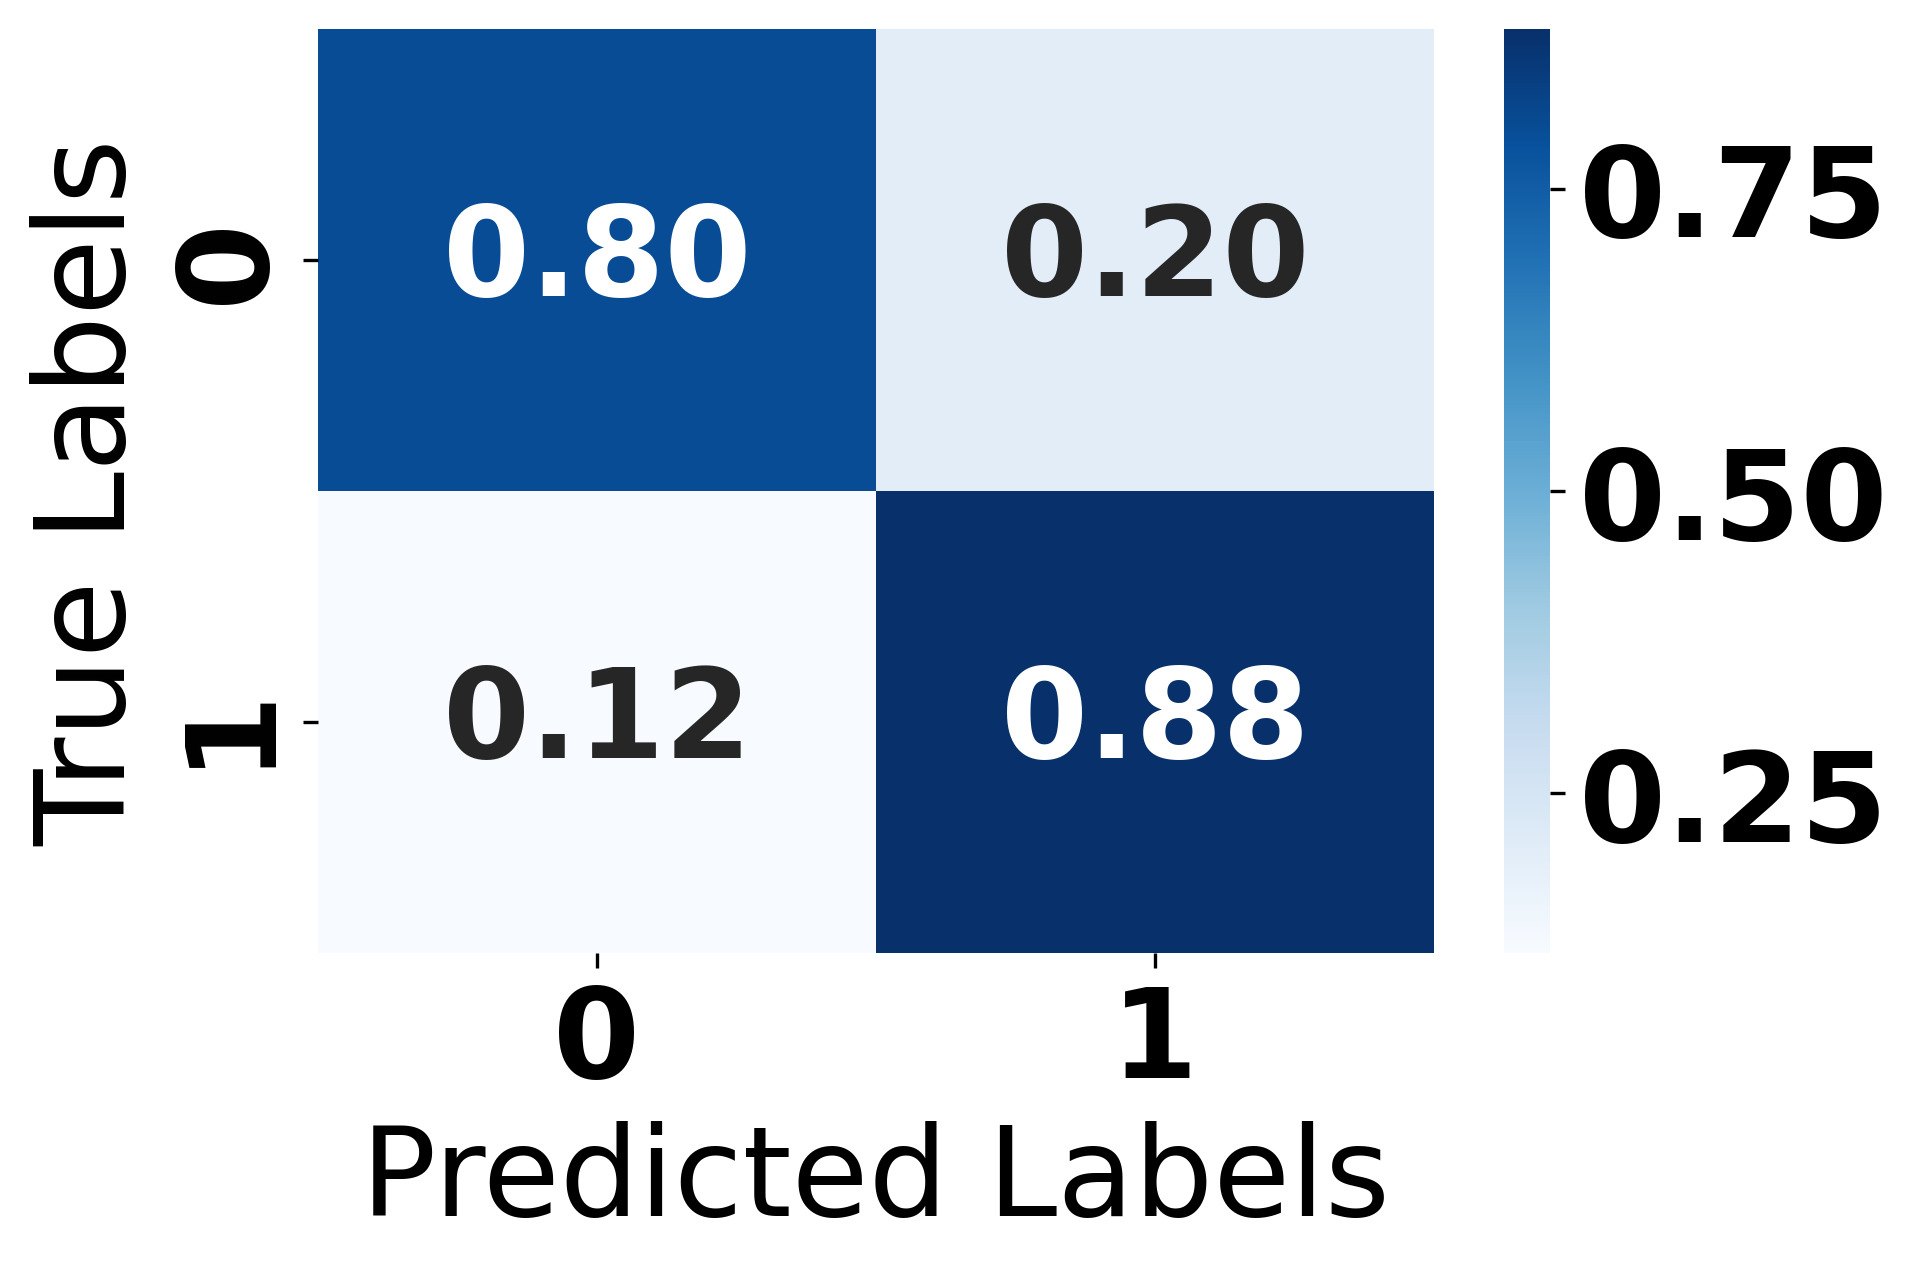

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/MLP.pkl')

In [ ]:
# Convert to NumPy arrays if not already
x_train = np.array(x_train)
x_test = np.array(x_test)

# Reshape to (samples, timesteps, features=1)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 550ms/step - accuracy: 0.4798 - loss: 0.9084 - val_accuracy: 0.2361 - val_loss: 1.3825
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.6504 - loss: 0.6629 - val_accuracy: 0.2361 - val_loss: 0.7906
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 200ms/step - accuracy: 0.7231 - loss: 0.5145 - val_accuracy: 0.7083 - val_loss: 0.5915
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step - accuracy: 0.8173 - loss: 0.4770 - val_accuracy: 0.3056 - val_loss: 0.8429
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step - accuracy: 0.7041 - loss: 0.4262 - val_accuracy: 0.5694 - val_loss: 0.6508
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.8444 - loss: 0.3660 - val_accuracy: 0.8194 - val_loss: 0.4838
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - accuracy: 0.8697 - loss: 0.3480 - val_accuracy: 0.6528 - val_loss: 0.6056
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step - accuracy: 0.8699 - loss: 0.3019 - val_accuracy: 0.8194 - val_loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
Normalized Confusion Matrix:
[[0.76363636 0.23636364]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.76      0.87        55
     Class 1       0.57      1.00      0.72        17

    accuracy                           0.82        72
   macro avg       0.78      0.88      0.79        72
weighted avg       0.90      0.82      0.83        72



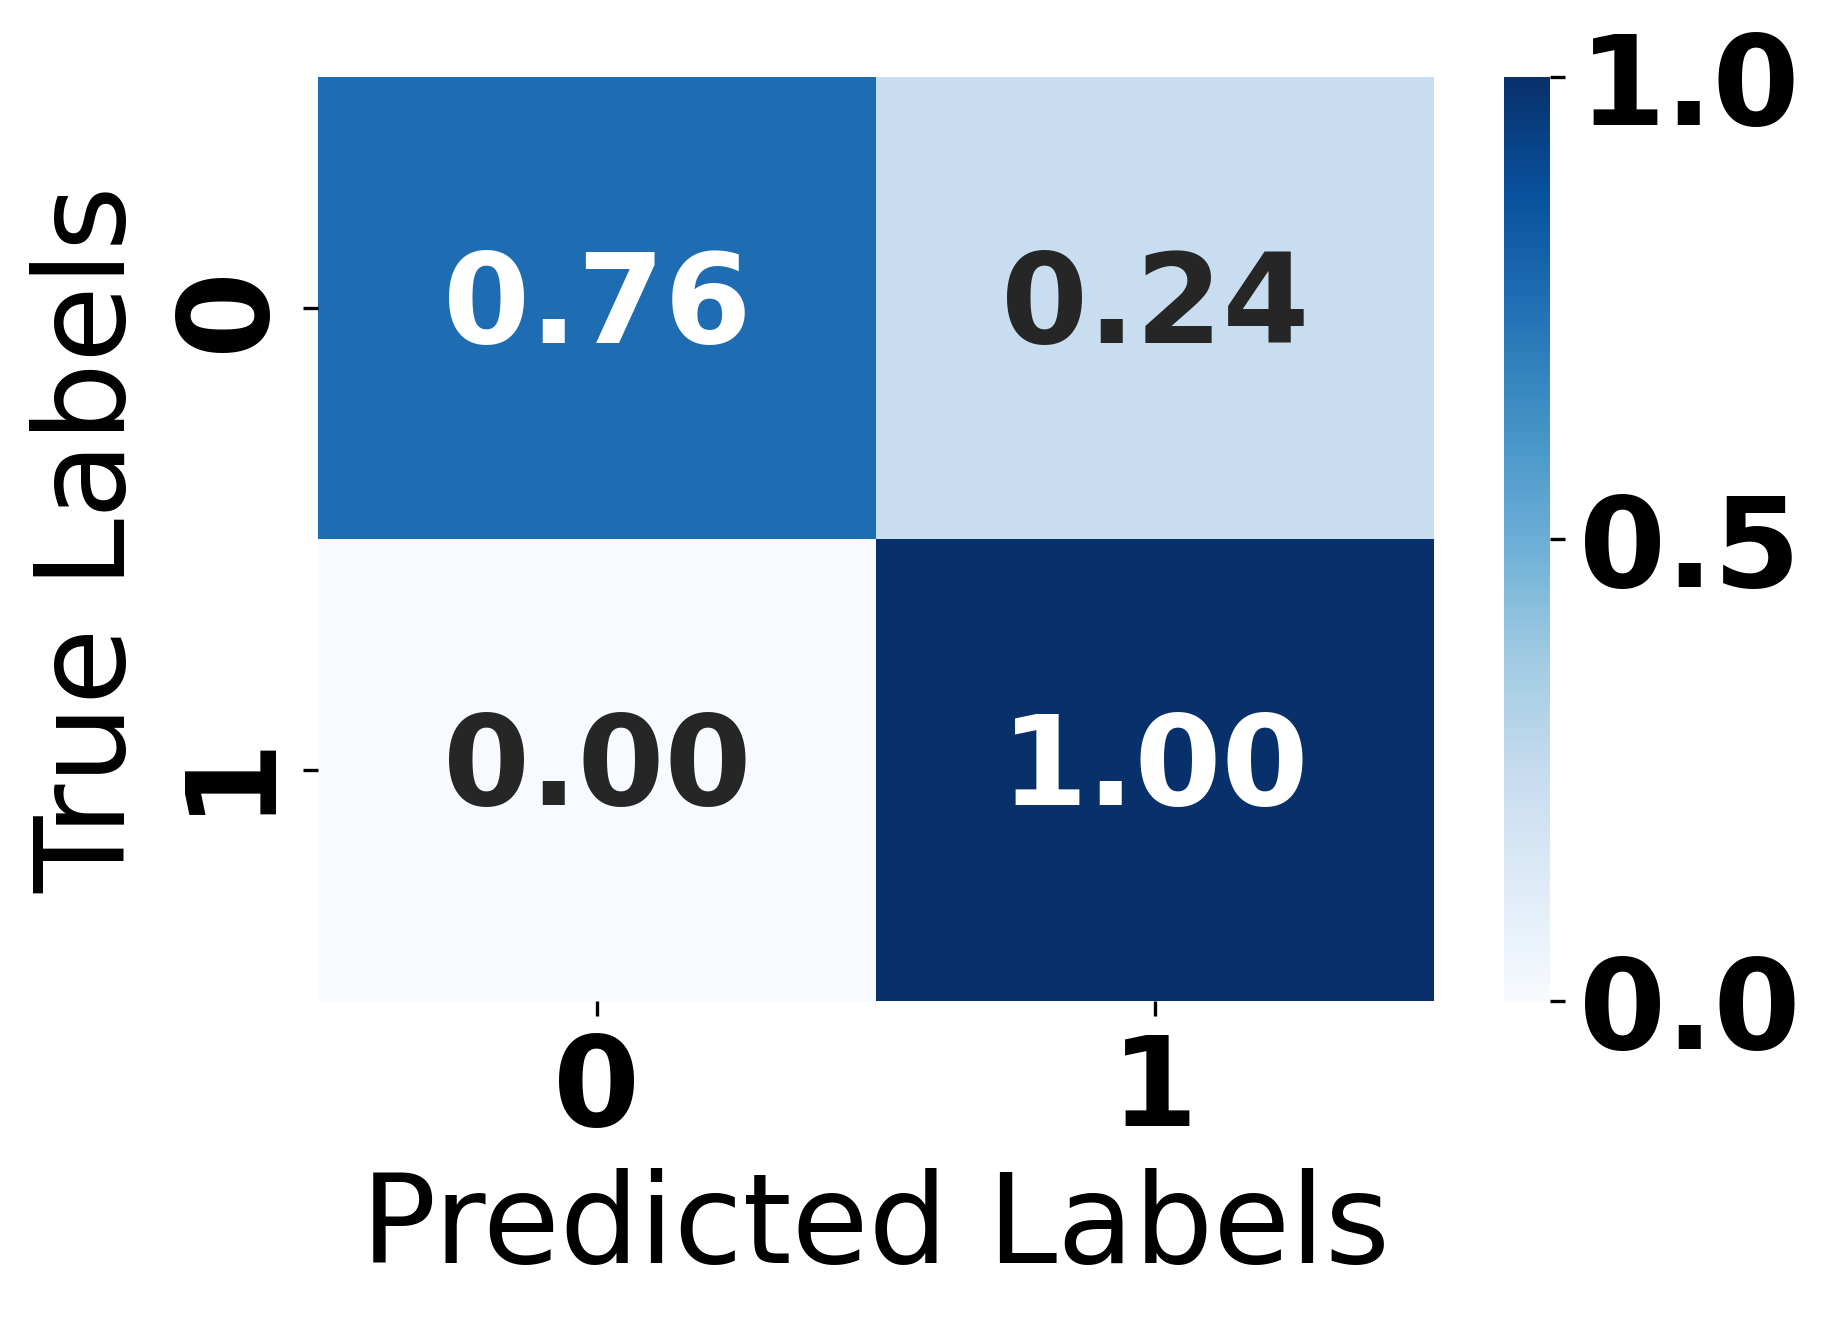

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 5s 141ms/step - accuracy: 0.5601 - loss: 0.7541 - val_accuracy: 0.2361 - val_loss: 1.2046
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.7558 - loss: 0.5226 - val_accuracy: 0.2361 - val_loss: 1.3605
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8137 - loss: 0.3916 - val_accuracy: 0.2361 - val_loss: 1.4549
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8783 - loss: 0.3053 - val_accuracy: 0.2361 - val_loss: 1.5647
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8899 - loss: 0.2492 - val_accuracy: 0.2361 - val_loss: 1.6698
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9407 - loss: 0.2065 - val_accuracy: 0.2361 - val_loss: 1.7254
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - accuracy: 0.9484 - loss: 0.1541 - val_accuracy: 0.2361 - val_loss: 1.7446
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.9421 - loss: 0.1629 - val_accuracy: 0.2361 - val_loss: 1.7125

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
Normalized Confusion Matrix:
[[0.52727273 0.47272727]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.53      0.69        55
     Class 1       0.40      1.00      0.57        17

    accuracy                           0.64        72
   macro avg       0.70      0.76      0.63        72
weighted avg       0.86      0.64      0.66        72



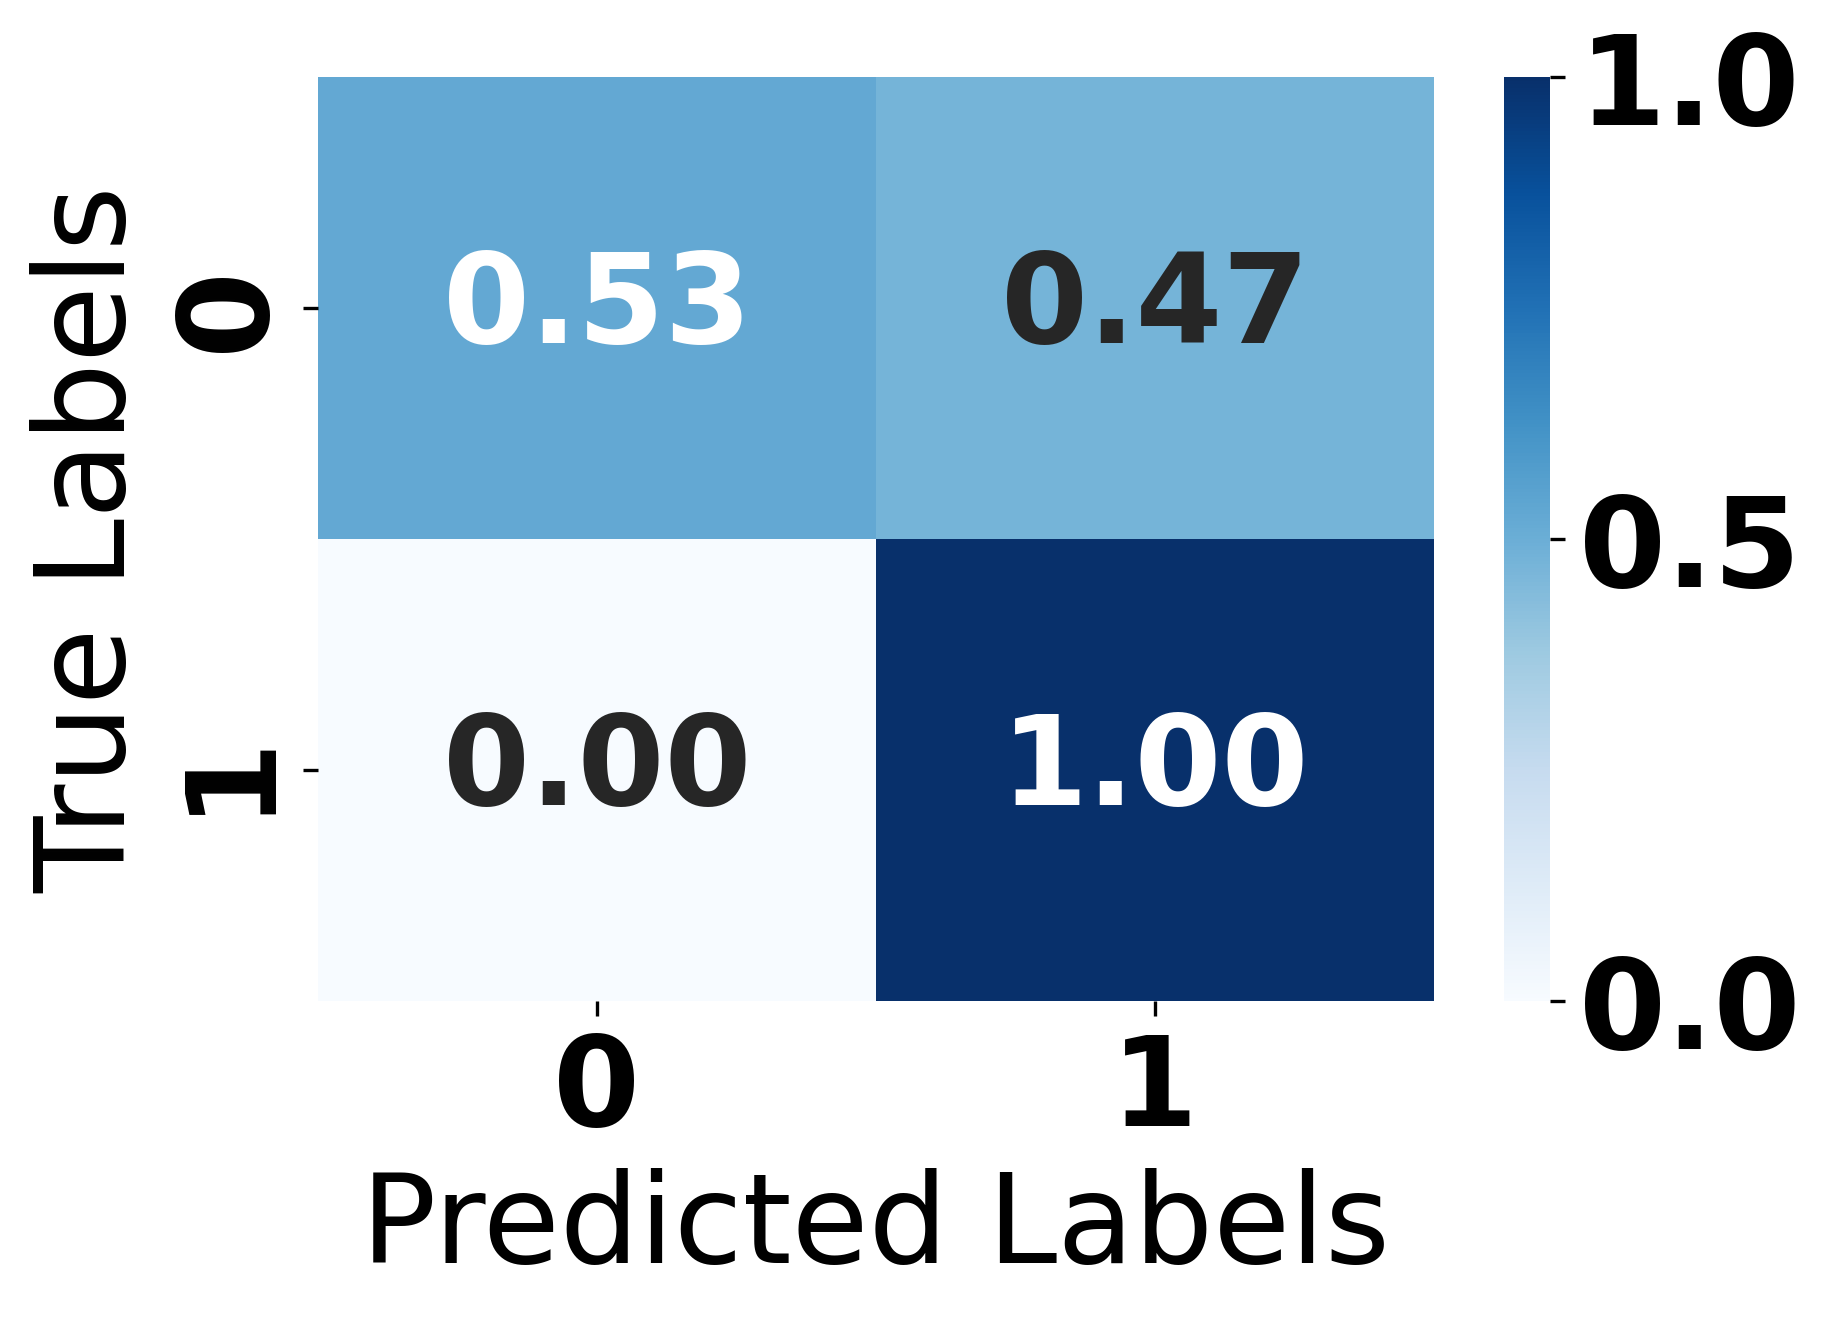

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
vocab_size = 200  # This should be set according to your dataset
embed_dim = 64  # Embedding size for each token
ff_dim = 64  # Hidden layer size in the feed-forward network

# Create the Transformer model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)

# Compile the model
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the Transformer model
simple_transformer_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the Transformer model
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 422ms/step - accuracy: 0.4986 - loss: 0.6950 - val_accuracy: 0.3889 - val_loss: 0.6926
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.7245 - loss: 0.6428 - val_accuracy: 0.3750 - val_loss: 0.6862
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.7405 - loss: 0.6126 - val_accuracy: 0.5694 - val_loss: 0.6685
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.7720 - loss: 0.5783 - val_accuracy: 0.6667 - val_loss: 0.6501
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - accuracy: 0.8025 - loss: 0.5536 - val_accuracy: 0.7778 - val_loss: 0.5998
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 81ms/step - accuracy: 0.8123 - loss: 0.5356 - val_accuracy: 0.8472 - val_loss: 0.5657
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.8438 - loss: 0.5050 - val_accuracy: 0.8611 - val_loss: 0.5464
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step - accuracy: 0.8261 - loss: 0.4798 - val_accuracy: 0.8611 -

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
Normalized Confusion Matrix:
[[0.89090909 0.10909091]
 [0.11764706 0.88235294]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.89      0.92        55
     Class 1       0.71      0.88      0.79        17

    accuracy                           0.89        72
   macro avg       0.84      0.89      0.86        72
weighted avg       0.90      0.89      0.89        72



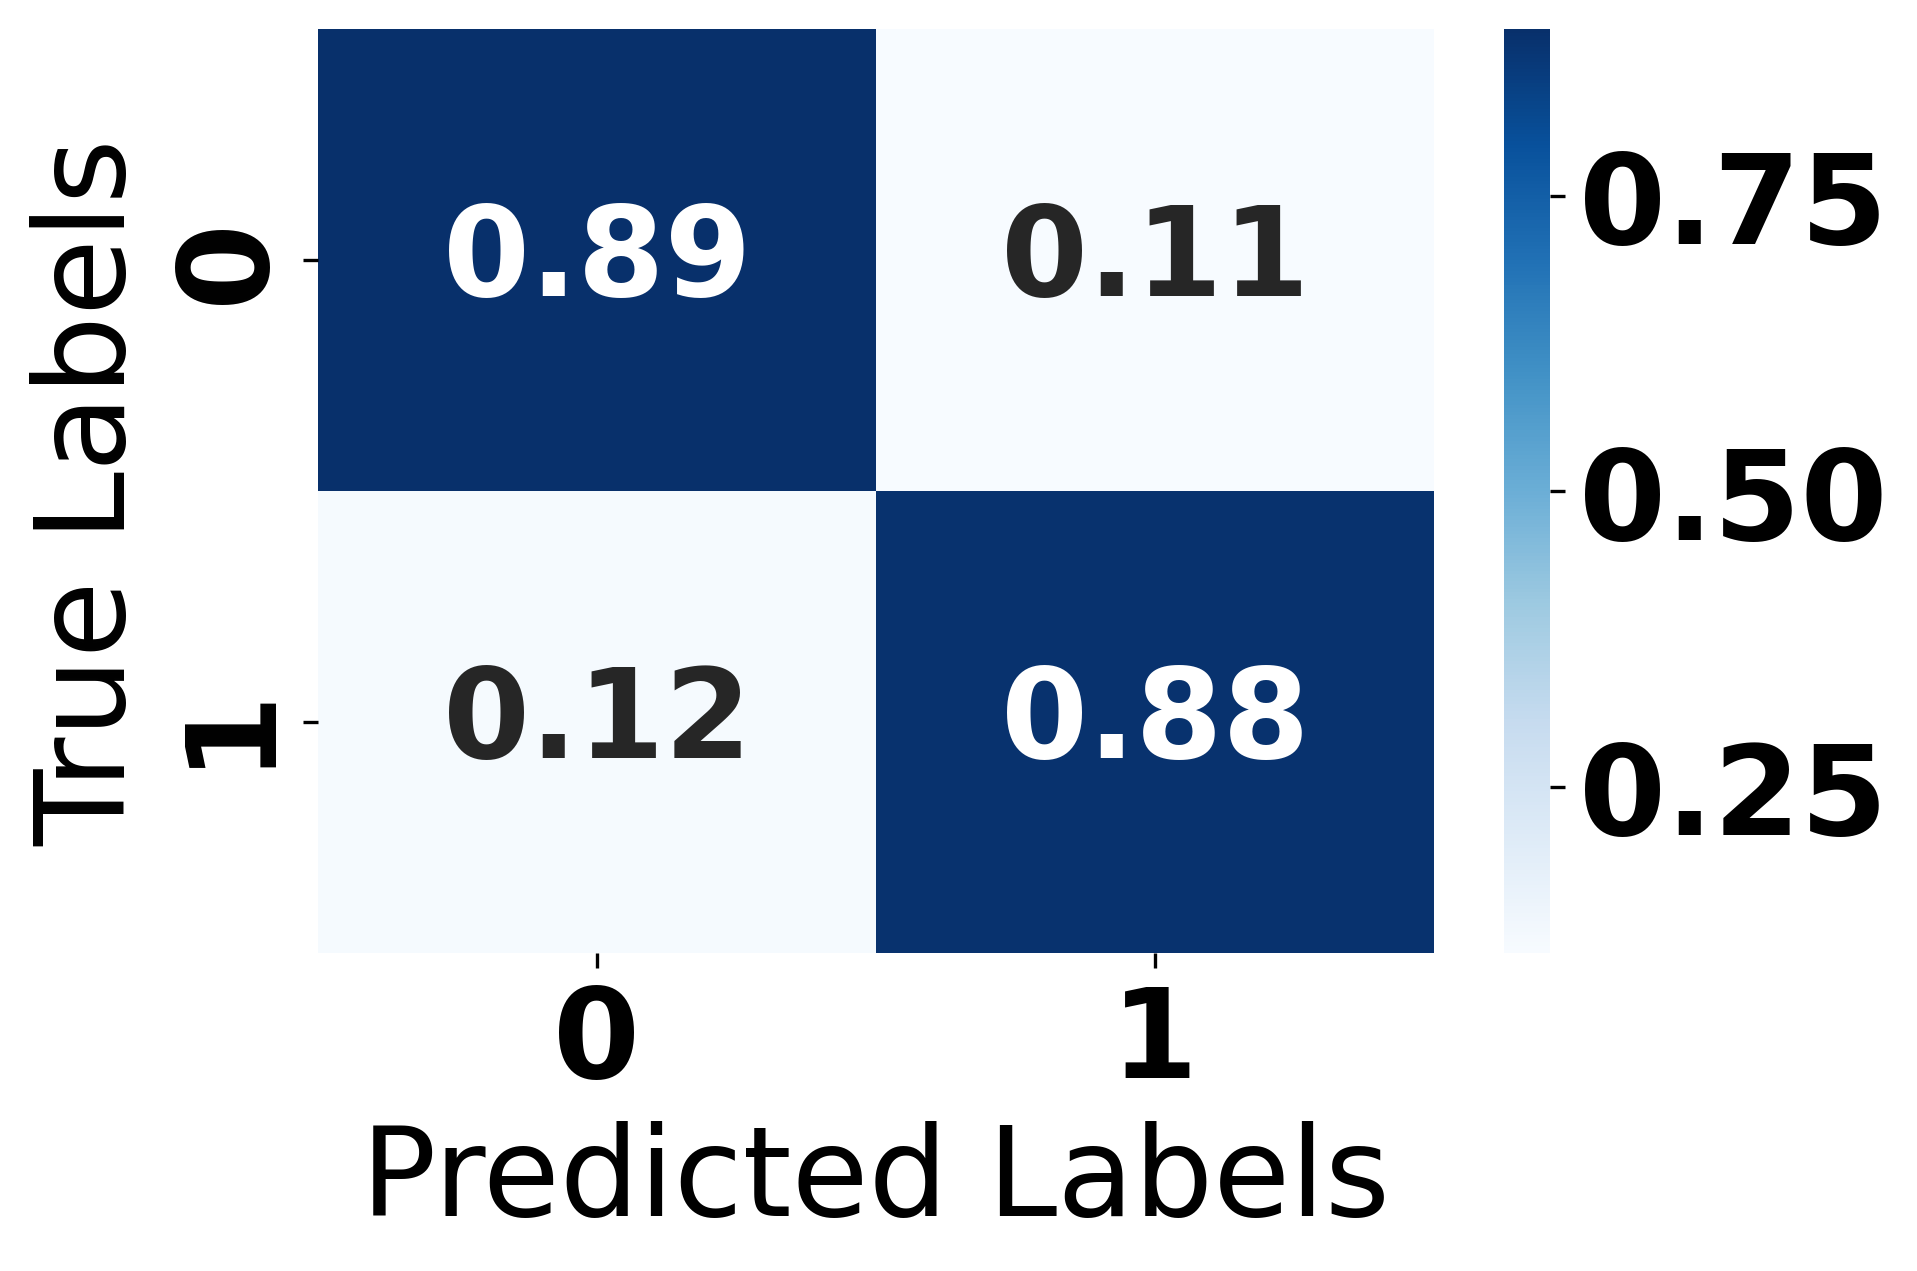

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.6, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./bad_results",        # new folder
    per_device_train_batch_size=30,   # too large → unstable updates
    num_train_epochs=1,              # too few epochs
    learning_rate=0.01,                 # too high → catastrophic divergence
    weight_decay=0.01,                  # no regularization → overfitting
    logging_dir="./logs",
    logging_steps=10,                 # rarely log → less feedback
    save_steps=15,                  # almost never save
    eval_steps=15,                  # almost never evaluate
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,                  # no warmup → unstable start
    gradient_accumulation_steps=1,
    fp16=False
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=22, training_loss=1.1220268254930323, metrics={'train_runtime': 76.4861, 'train_samples_per_second': 8.368, 'train_steps_per_second': 0.288, 'total_flos': 0.0, 'train_loss': 1.1220268254930323, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.9643    0.9818    0.9730        55
           1     0.9375    0.8824    0.9091        17

    accuracy                         0.9583        72
   macro avg     0.9509    0.9321    0.9410        72
weighted avg     0.9580    0.9583    0.9579        72

Confusion Matrix:
 [[54  1]
 [ 2 15]]


### TVAE (Tabular Variational Autoencoder)

In [ ]:
# Define the path
test_load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Actual"
train_load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Actual/Preprocessed"
# Load the files
x_train = pd.read_csv(f"{train_load_path}/x_train.csv")
x_test = pd.read_csv(f"{test_load_path}/x_test.csv")
y_train = pd.read_csv(f"{train_load_path}/y_train.csv")
y_test = pd.read_csv(f"{test_load_path}/y_test.csv")

print("Files loaded successfully!")

Files loaded successfully!


In [ ]:
from ctgan import TVAE
from collections import Counter
import pandas as pd
import numpy as np

# Define categorical feature indices
categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Ensure y_train is a 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Combine x_train and y_train into one DataFrame
x_train['target'] = y_train

# Print original distribution
print("Before TVAE:", Counter(y_train))

# Separate minority class (1)
minority_df = x_train[x_train['target'] == 1]

# Estimate how many synthetic samples you want
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Get categorical column names from indices
categorical_columns = x_train.columns[categorical_features].tolist() + ['target']

# Fit TVAE on minority class
tvae = TVAE(epochs=300)
tvae.fit(minority_df, discrete_columns=categorical_columns)

# Generate synthetic samples
synthetic_minority = tvae.sample(samples_to_generate)

# Ensure only class 1 is included
synthetic_minority = synthetic_minority[synthetic_minority['target'] == 1]

# Separate features and target
synthetic_x_train = synthetic_minority.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_minority['target'].reset_index(drop=True)

# Combine real and synthetic data
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Final distribution
print("After TVAE:", Counter(y_resampled_df))

Before TVAE: Counter({np.int64(0): 220, np.int64(1): 91})
After TVAE: Counter({1: 420, 0: 220})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for Age:
Age
31    27
35    22
27    21
62    20
33    20
      ..
15     1
79     1
82     1
86     1
84     1
Name: count, Length: 69, dtype: int64

Counts for Gender:
Gender
0    524
1    116
Name: count, dtype: int64

Counts for Smoking:
Smoking
0    550
1     90
Name: count, dtype: int64

Counts for Hx Smoking:
Hx Smoking
0    618
1     22
Name: count, dtype: int64

Counts for Hx Radiothreapy:
Hx Radiothreapy
0    634
1      6
Name: count, dtype: int64

Counts for Thyroid Function:
Thyroid Function
0    600
2     15
3     12
4     11
1      2
Name: count, dtype: int64

Counts for Physical Examination:
Physical Examination
3    387
1    166
2     75
0      7
4      5
Name: count, dtype: int64

Counts for Adenopathy:
Adenopathy
0    308
2    196
3    114
1     14
4      6
5      2
Name: count, dtype: int64

Counts for Pathology:
Pathology
0    561
1     42
2     24
3     13
Name: count, dtype: int64

Counts for Focality:
Focality
1    369
0    271
Name: count, dtype: int64

C

## Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

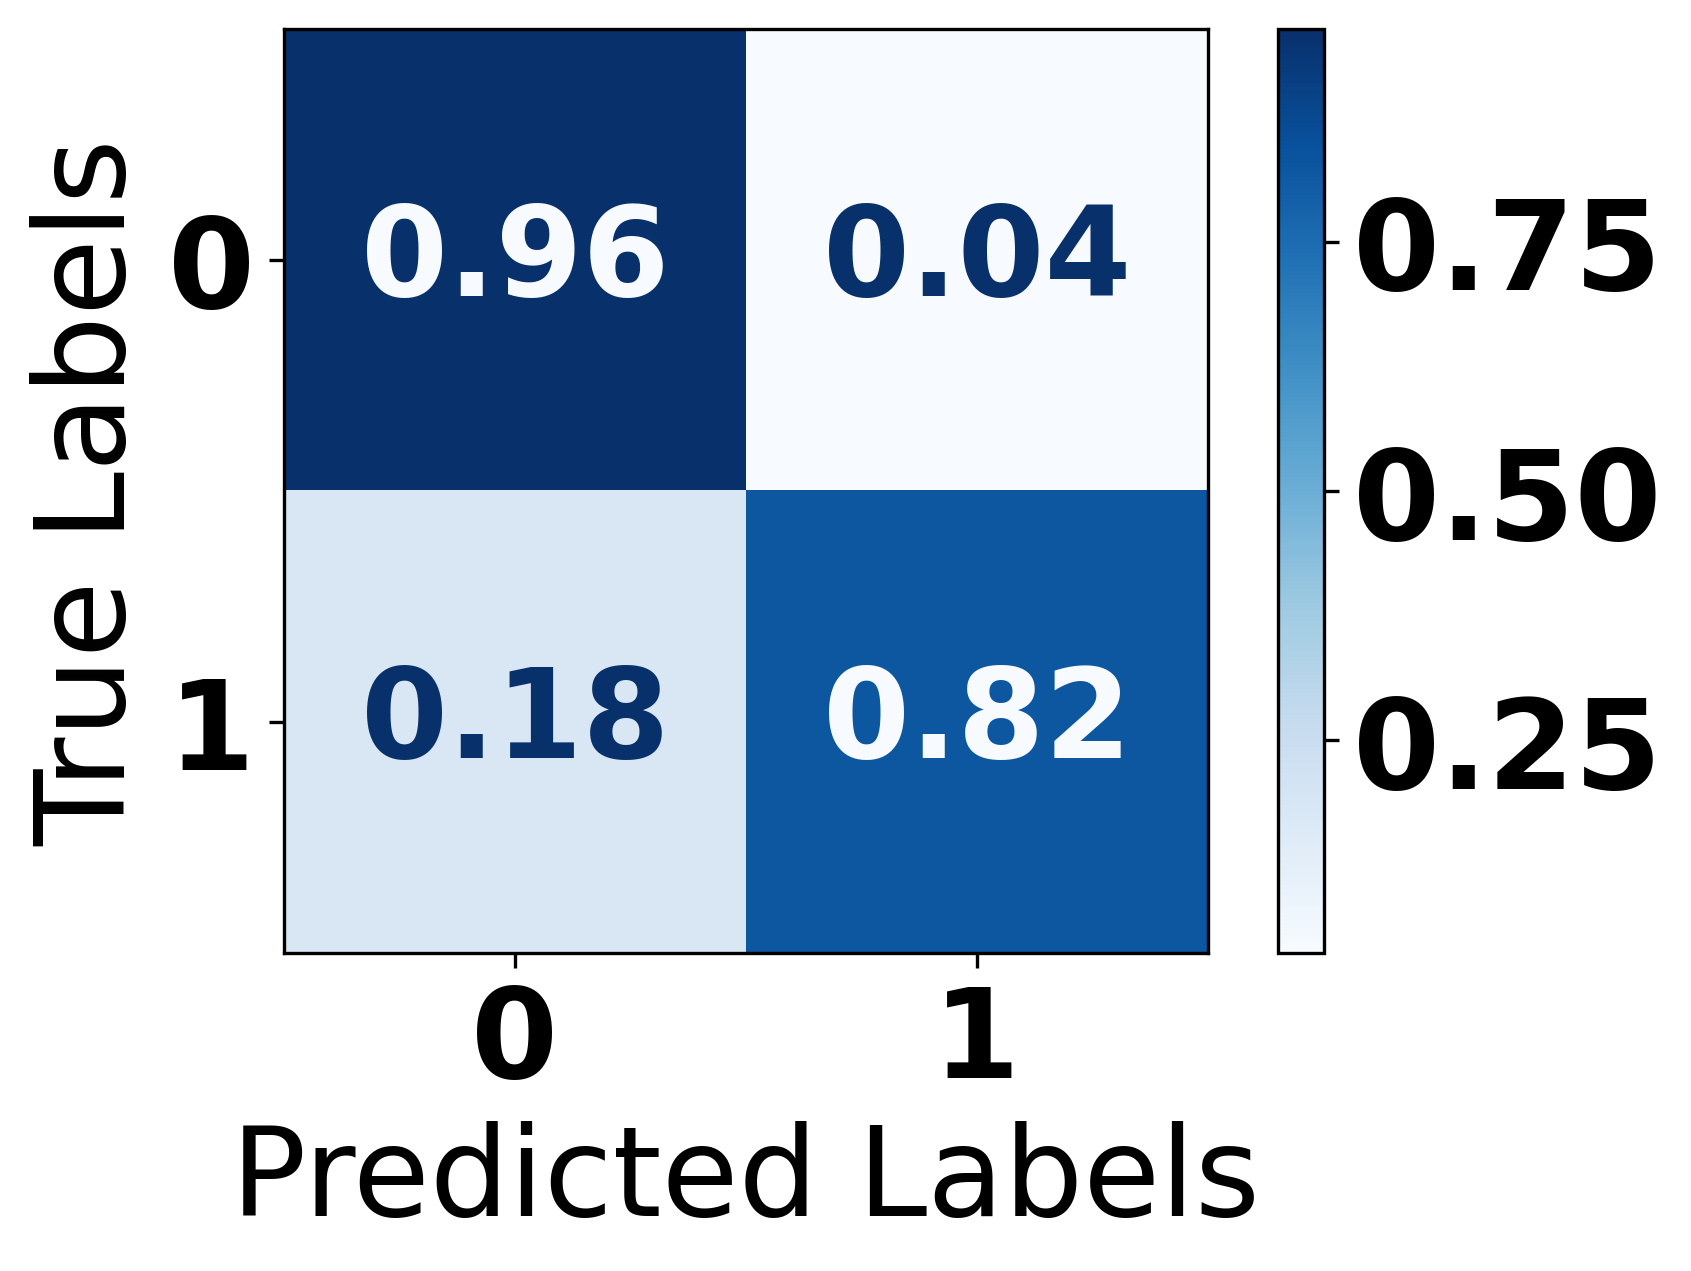

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.95      0.96      0.95        55
     Class 1       0.88      0.82      0.85        17

    accuracy                           0.93        72
   macro avg       0.91      0.89      0.90        72
weighted avg       0.93      0.93      0.93        72

Train Accuracy: 1.0
Test Accuracy: 0.9305555555555556


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/DT.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


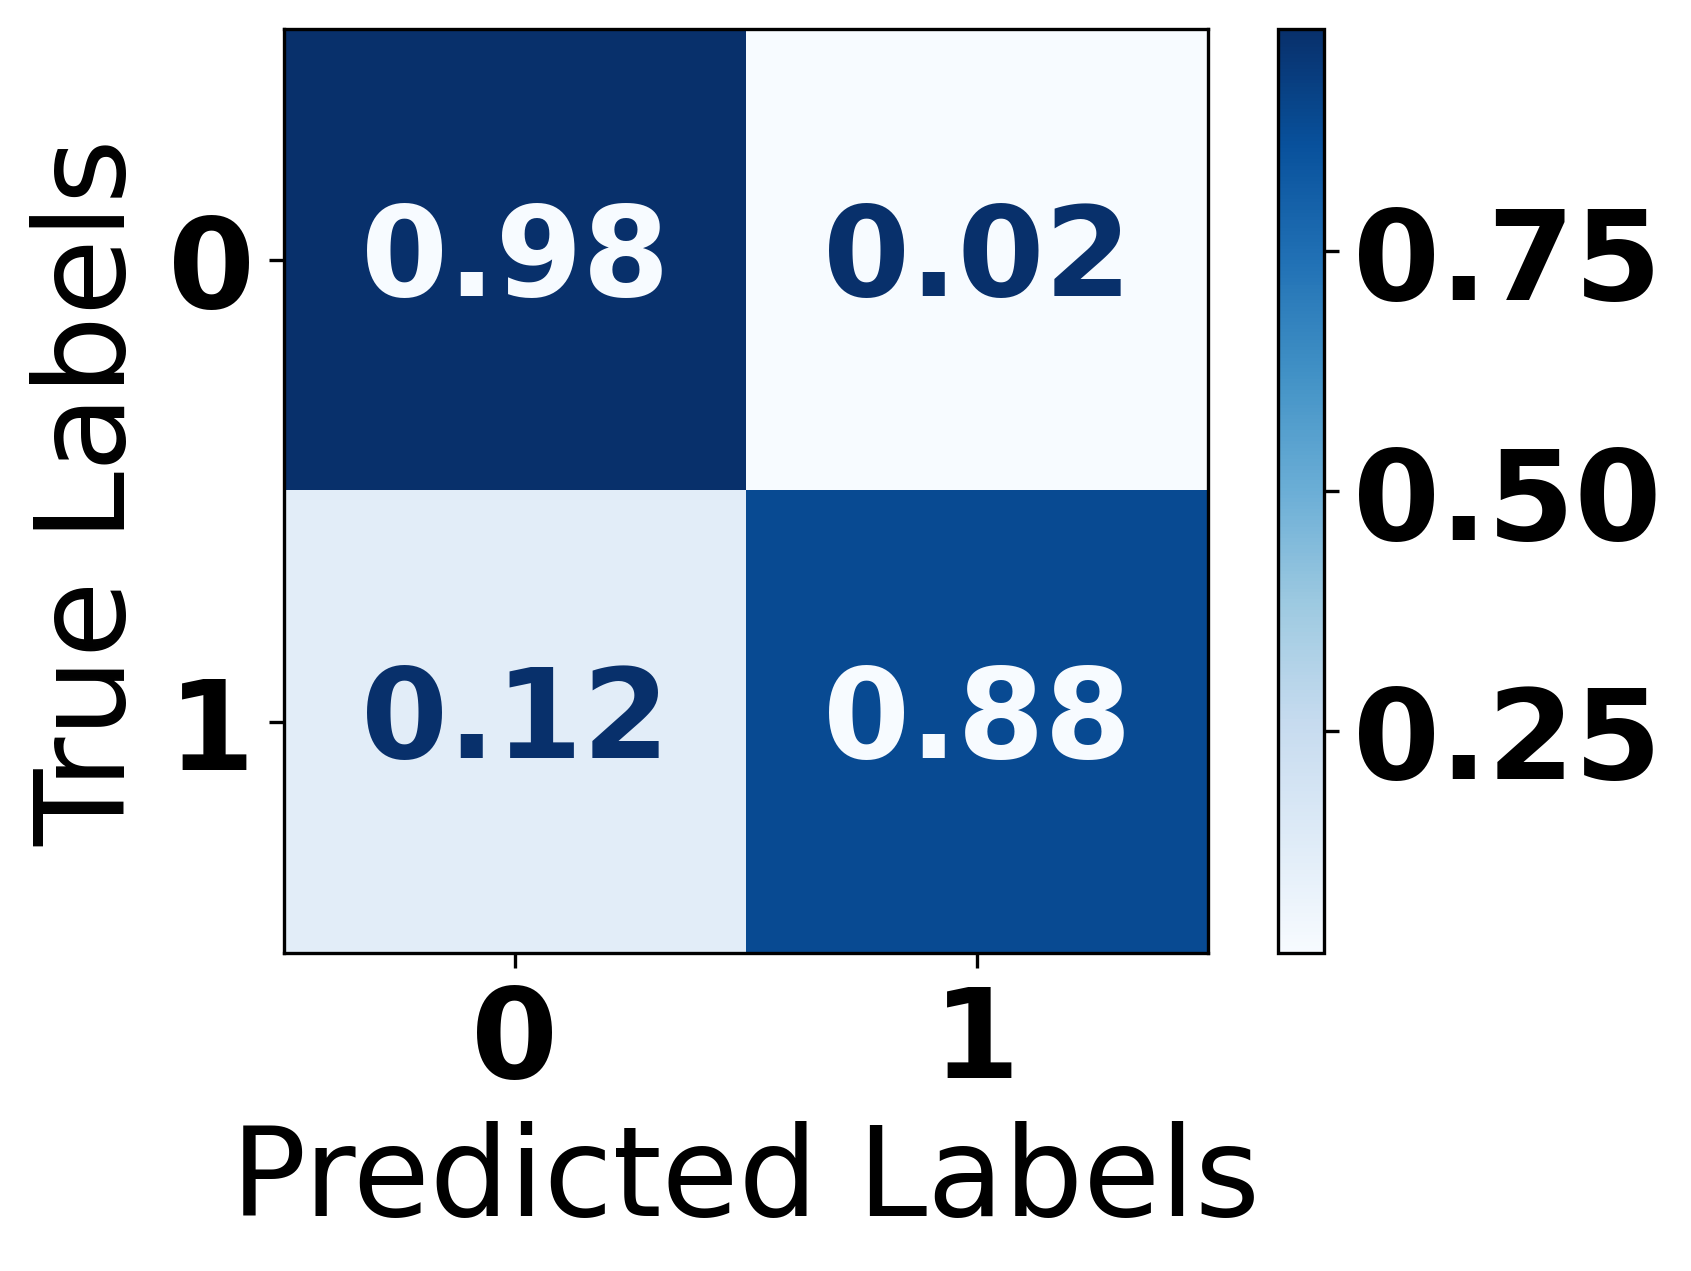

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97        55
     Class 1       0.94      0.88      0.91        17

    accuracy                           0.96        72
   macro avg       0.95      0.93      0.94        72
weighted avg       0.96      0.96      0.96        72

Train Accuracy: 0.9796875
Test Accuracy: 0.9583333333333334


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=4, random_state=21)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/RUSBoost.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


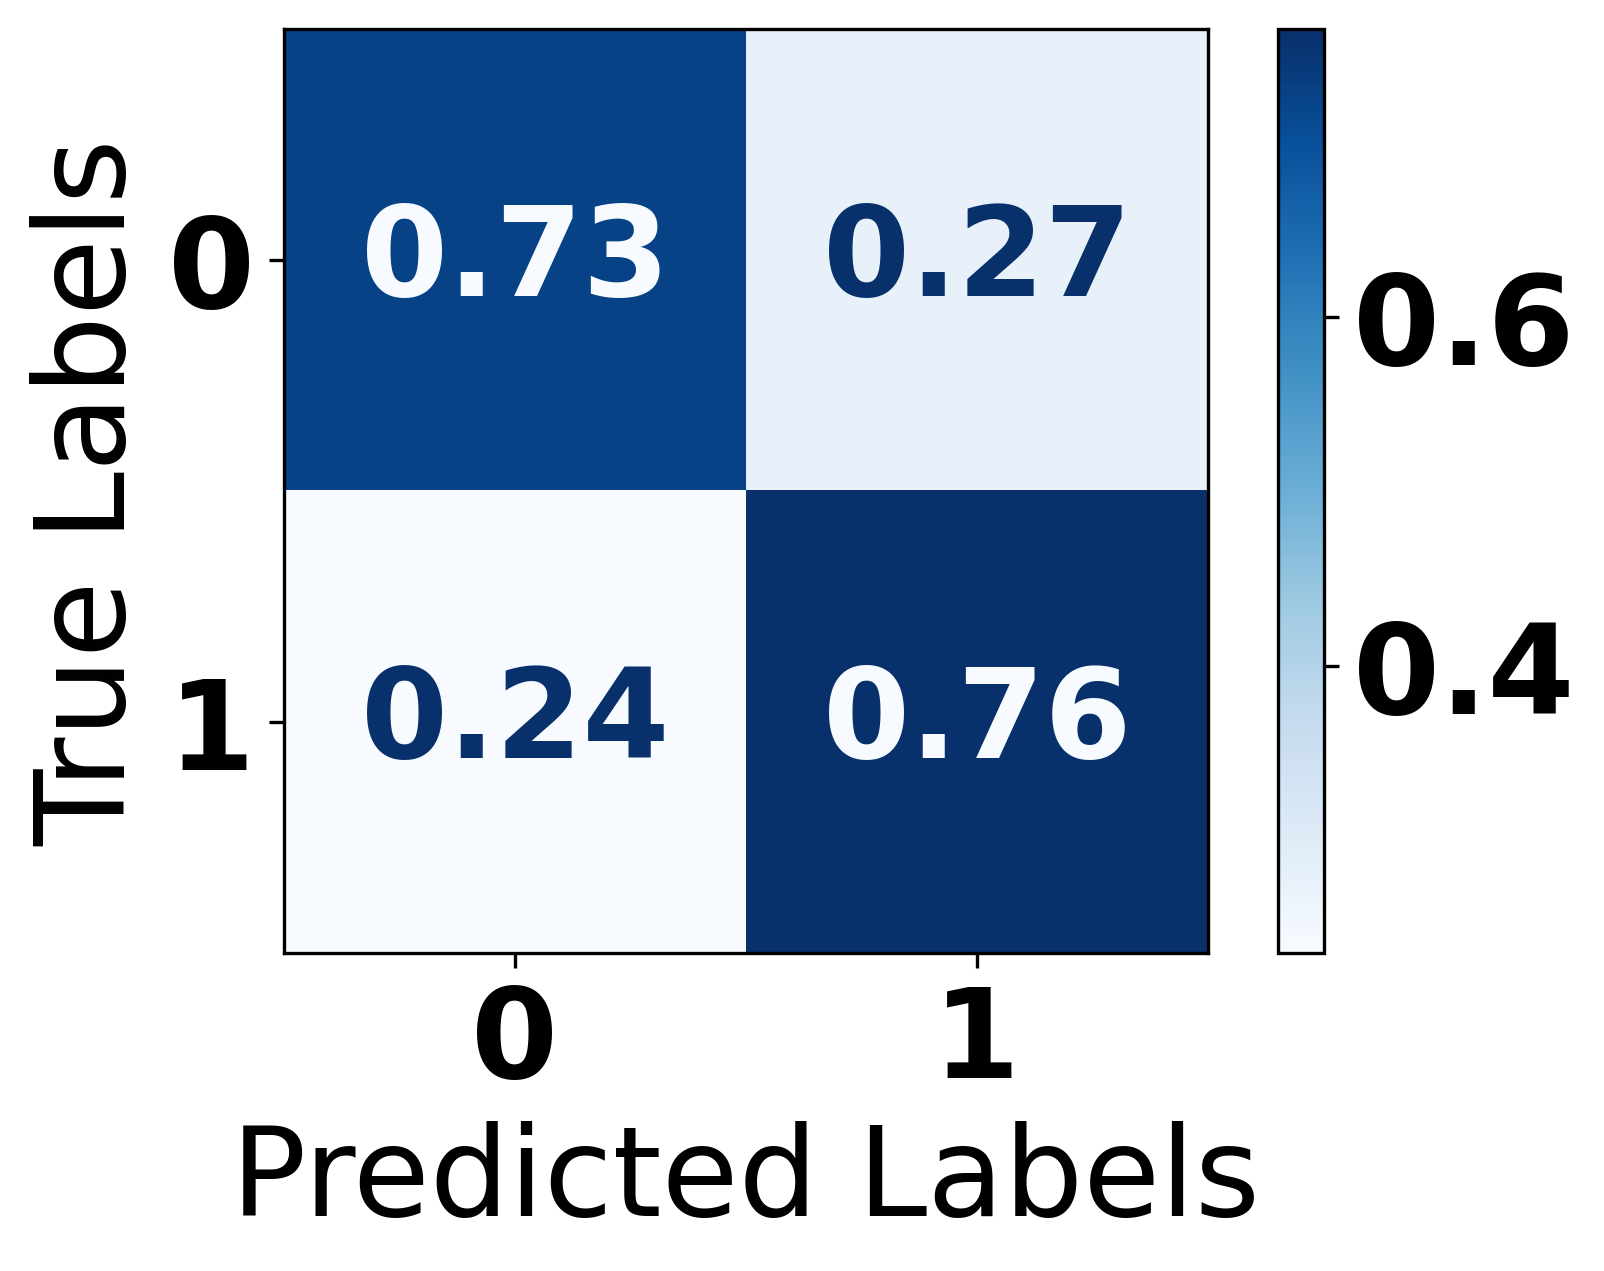

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.73      0.81        55
           1       0.46      0.76      0.58        17

    accuracy                           0.74        72
   macro avg       0.69      0.75      0.69        72
weighted avg       0.80      0.74      0.75        72

Train Accuracy: 0.8828125
Test Accuracy: 0.7361111111111112


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=2,      # Only one tree
    max_depth=5,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=20, # Require lots of samples to split
    min_samples_leaf=25,  # Each leaf must have many samples
    random_state=2
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/RF.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


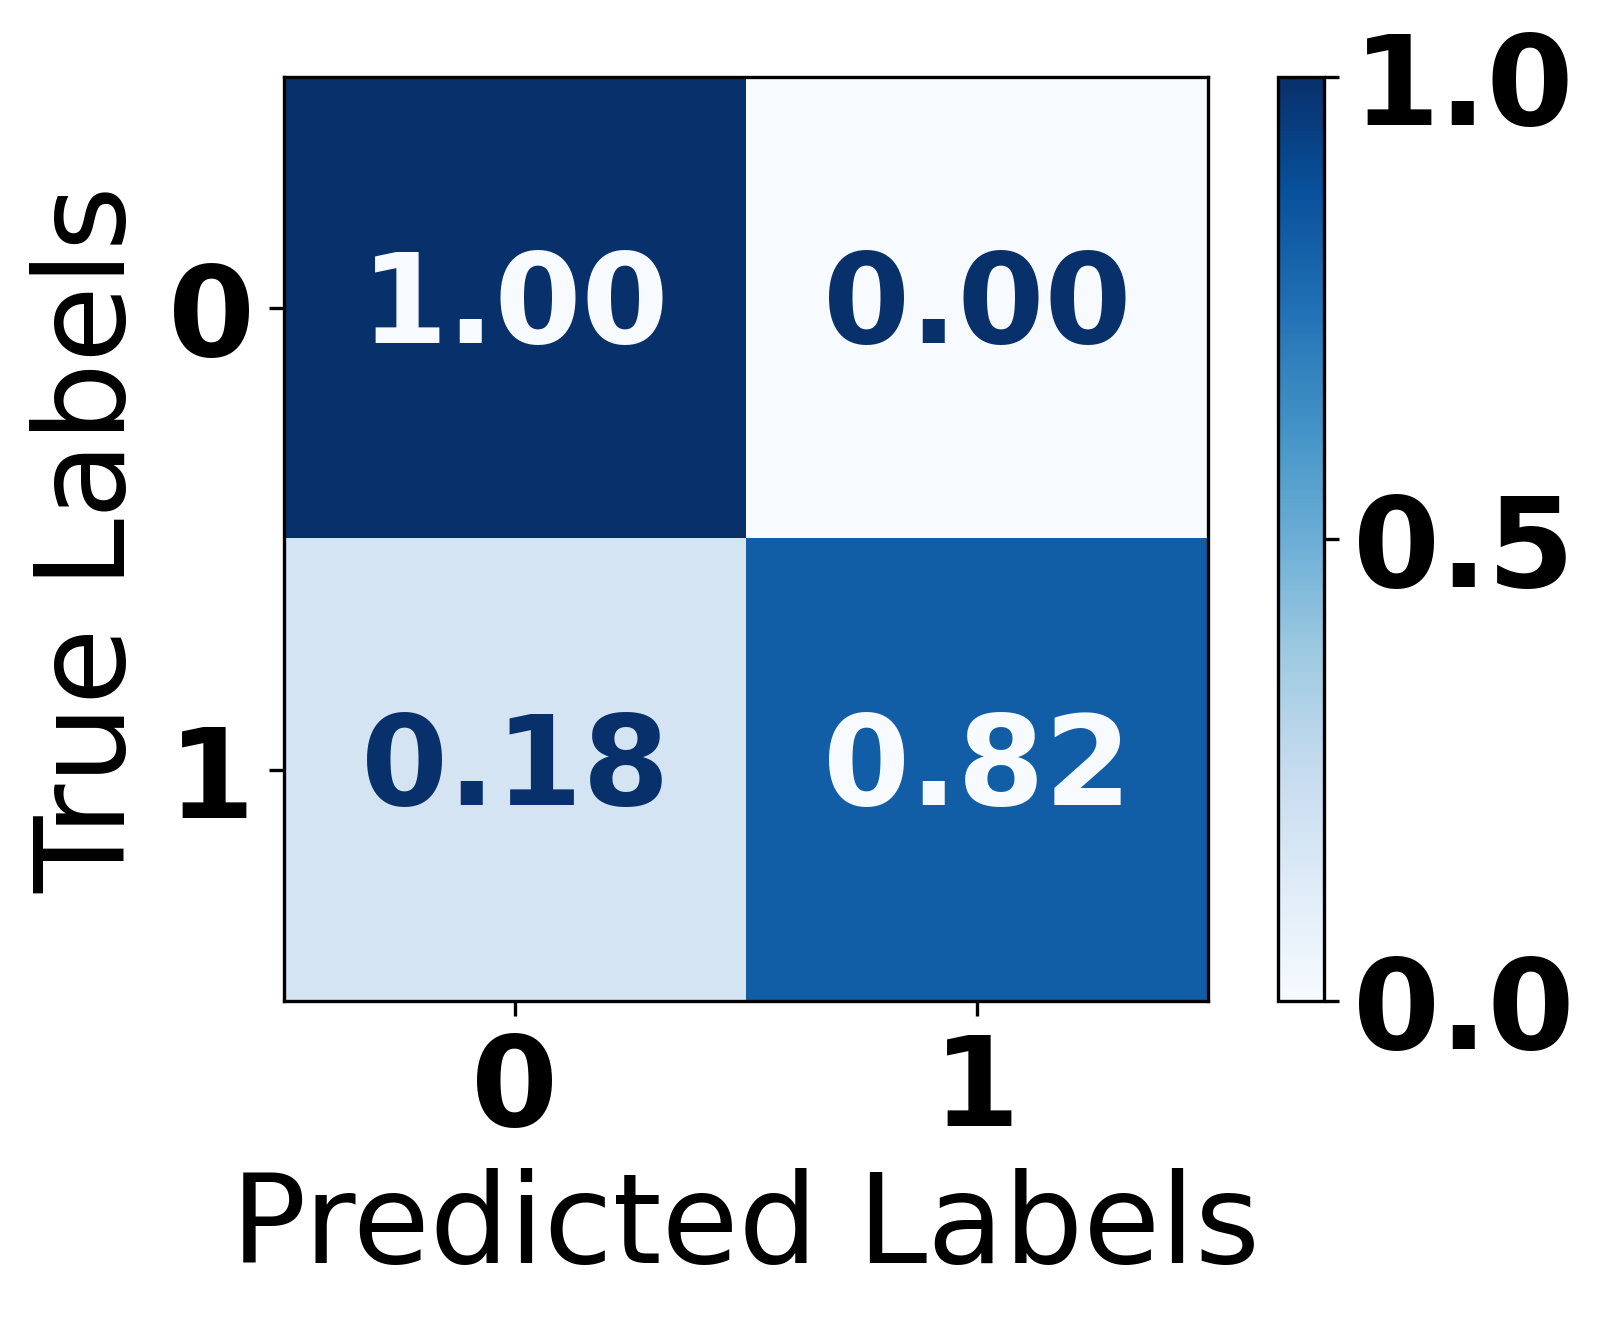

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        55
           1       1.00      0.82      0.90        17

    accuracy                           0.96        72
   macro avg       0.97      0.91      0.94        72
weighted avg       0.96      0.96      0.96        72

Train Accuracy: 0.9703125
Test Accuracy: 0.9583333333333334


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.00000001)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/GNB.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


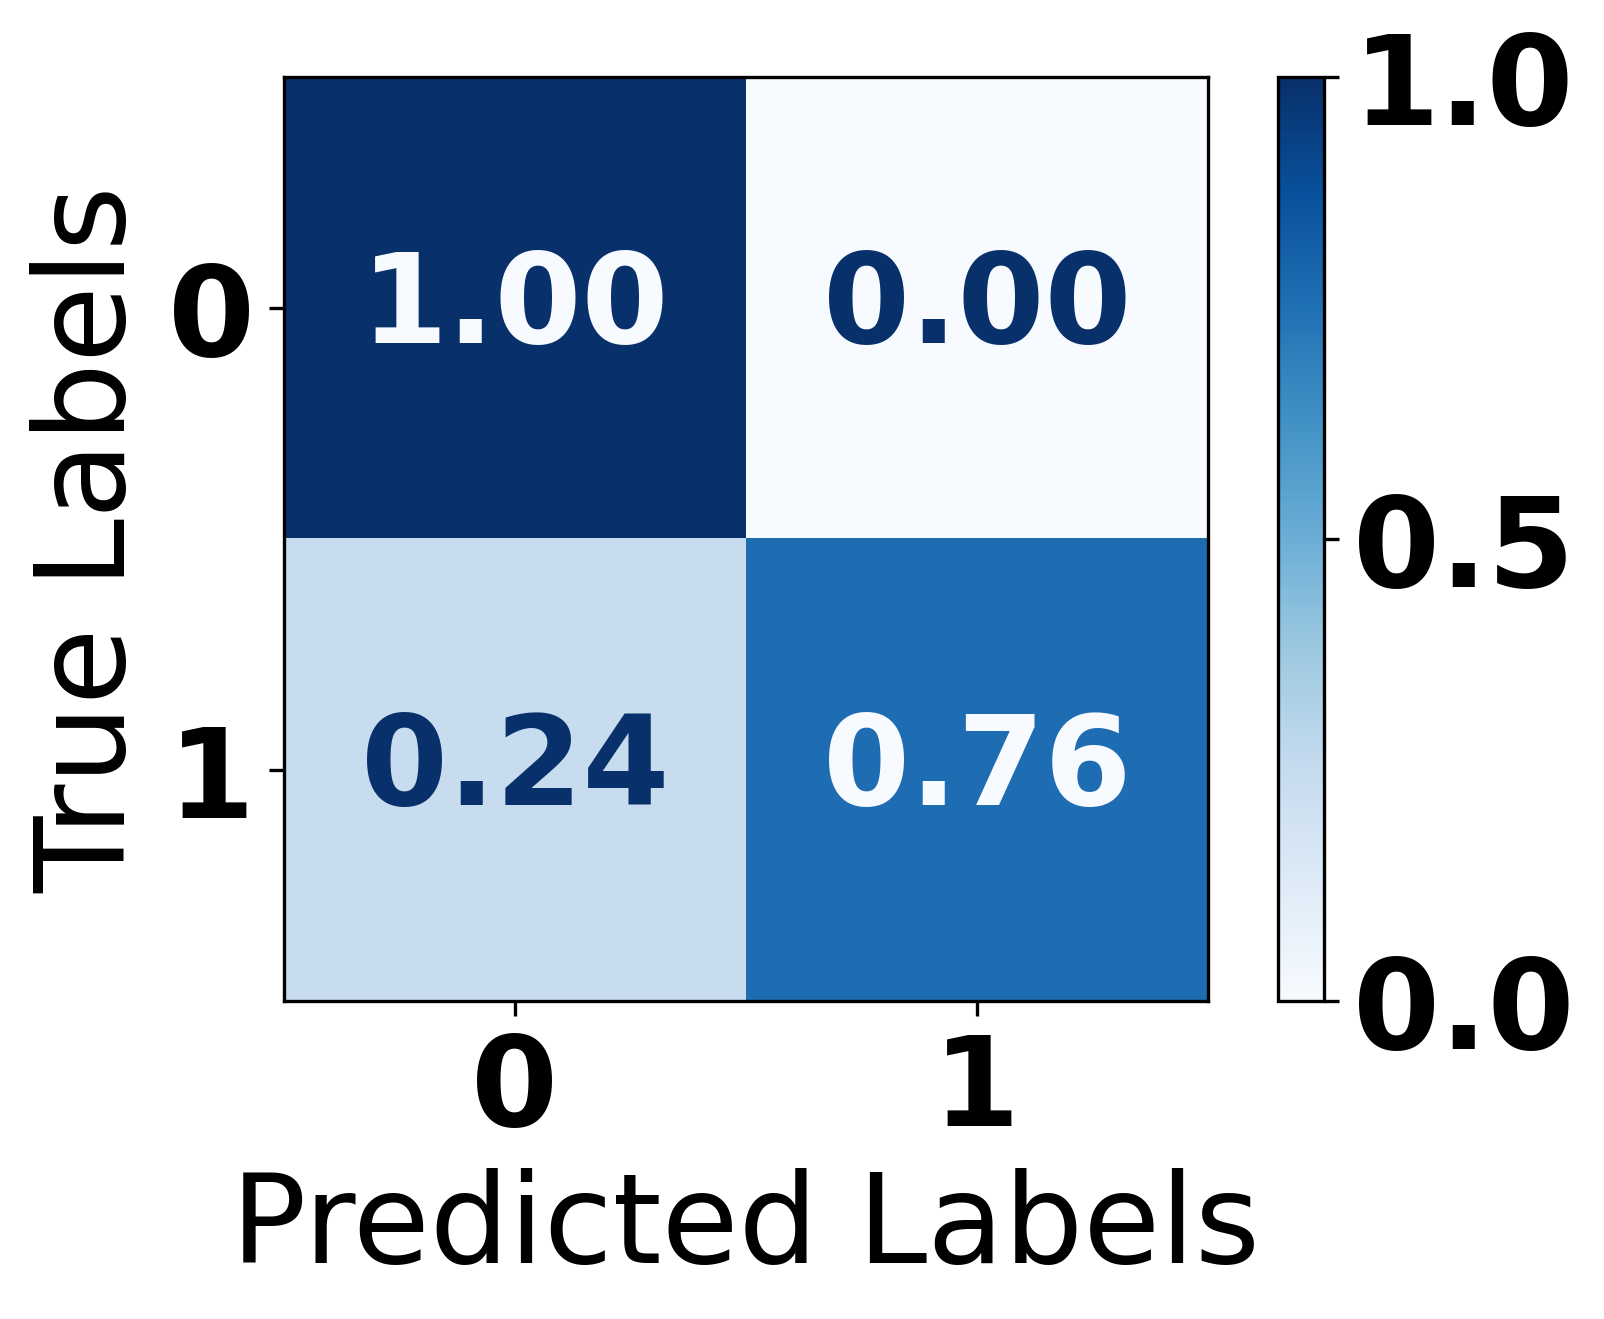

Classification Report:
               precision    recall  f1-score   support

           0       0.93      1.00      0.96        55
           1       1.00      0.76      0.87        17

    accuracy                           0.94        72
   macro avg       0.97      0.88      0.92        72
weighted avg       0.95      0.94      0.94        72

Train Accuracy: 0.9265625
Test Accuracy: 0.9444444444444444


In [ ]:
# Import required libraries
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import matplotlib.pyplot as plt

# Create an AdaBoost classifier
Adaboost = AdaBoostClassifier()

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

y_prob_test = Adaboost.predict_proba(x_test)[:, 1]  # Probabilities for class 1
y_pred = (y_prob_test >= 0.65).astype(int)           # Apply threshold 0.4

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.gcf().set_size_inches(6, 4)
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

y_prob_train = Adaboost.predict_proba(x_train)[:, 1]
y_train_pred = (y_prob_train >= 0.65).astype(int)

# Calculate and print train accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
print("Train Accuracy:", train_accuracy)

# Calculate and print test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=10).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.74545455 0.25454545]
 [0.17647059 0.82352941]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.93      0.75      0.83        55
     Class 1       0.50      0.82      0.62        17

    accuracy                           0.76        72
   macro avg       0.72      0.78      0.73        72
weighted avg       0.83      0.76      0.78        72



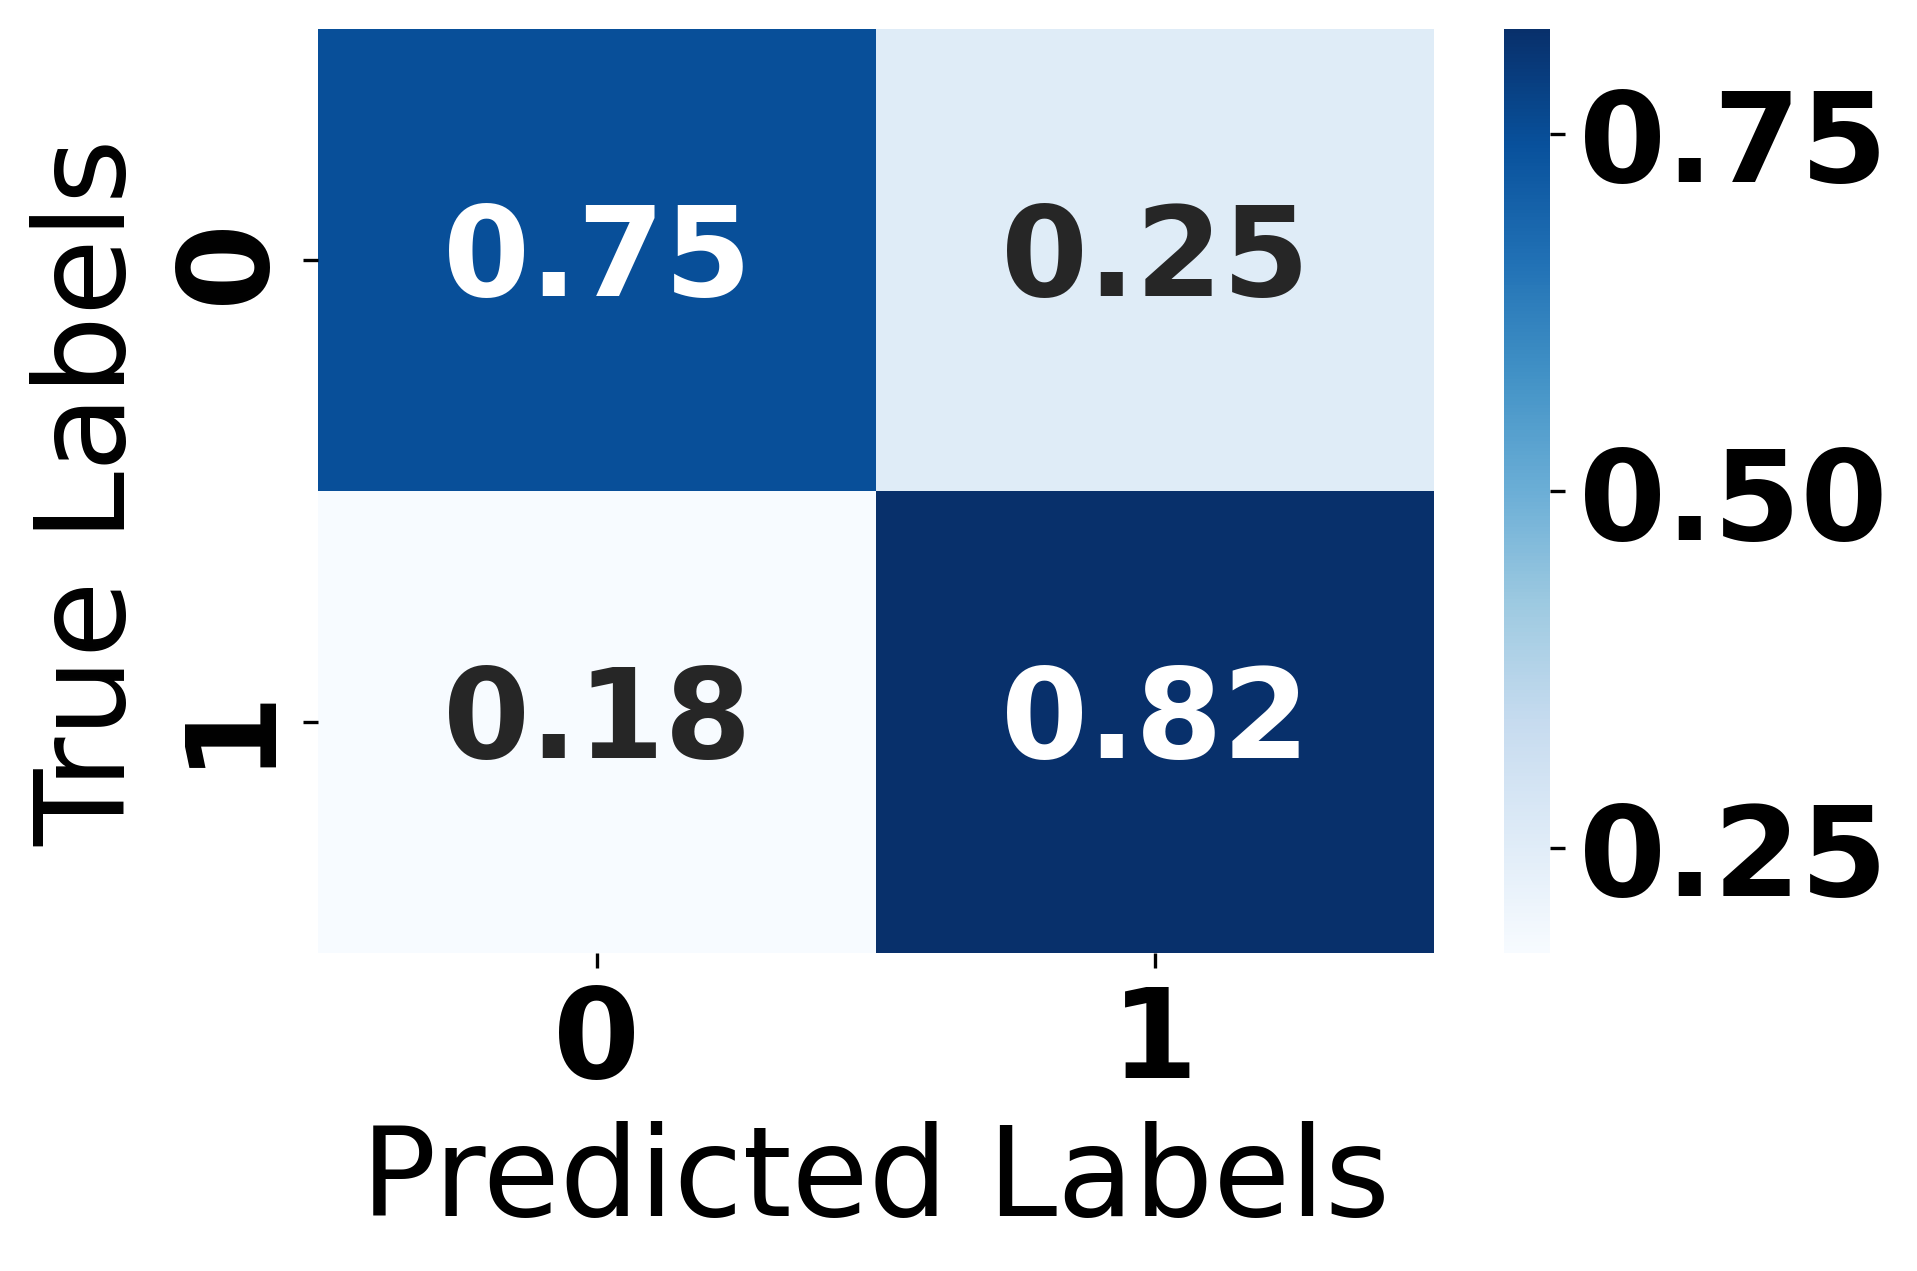

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=256, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 291ms/step - accuracy: 0.3752 - loss: 1.9166 - val_accuracy: 0.2361 - val_loss: 1.6197
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 0.6655 - loss: 0.8032 - val_accuracy: 0.2361 - val_loss: 1.6152
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step - accuracy: 0.6538 - loss: 0.7274 - val_accuracy: 0.2361 - val_loss: 0.8563
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6827 - loss: 0.5488 - val_accuracy: 0.6944 - val_loss: 0.6386
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.8270 - loss: 0.5666 - val_accuracy: 0.2361 - val_loss: 0.7762
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.6641 - loss: 0.4963 - val_accuracy: 0.2361 - val_loss: 0.9502
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step - accuracy: 0.6577 - loss: 0.4903 - val_accuracy: 0.3056 - val_loss: 0.7270
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - accuracy: 0.7851 - loss: 0.4423 - val_accuracy: 0.7639 - val_loss: 0.555

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Normalized Confusion Matrix:
[[0.50909091 0.49090909]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.51      0.67        55
     Class 1       0.39      1.00      0.56        17

    accuracy                           0.62        72
   macro avg       0.69      0.75      0.62        72
weighted avg       0.86      0.62      0.65        72



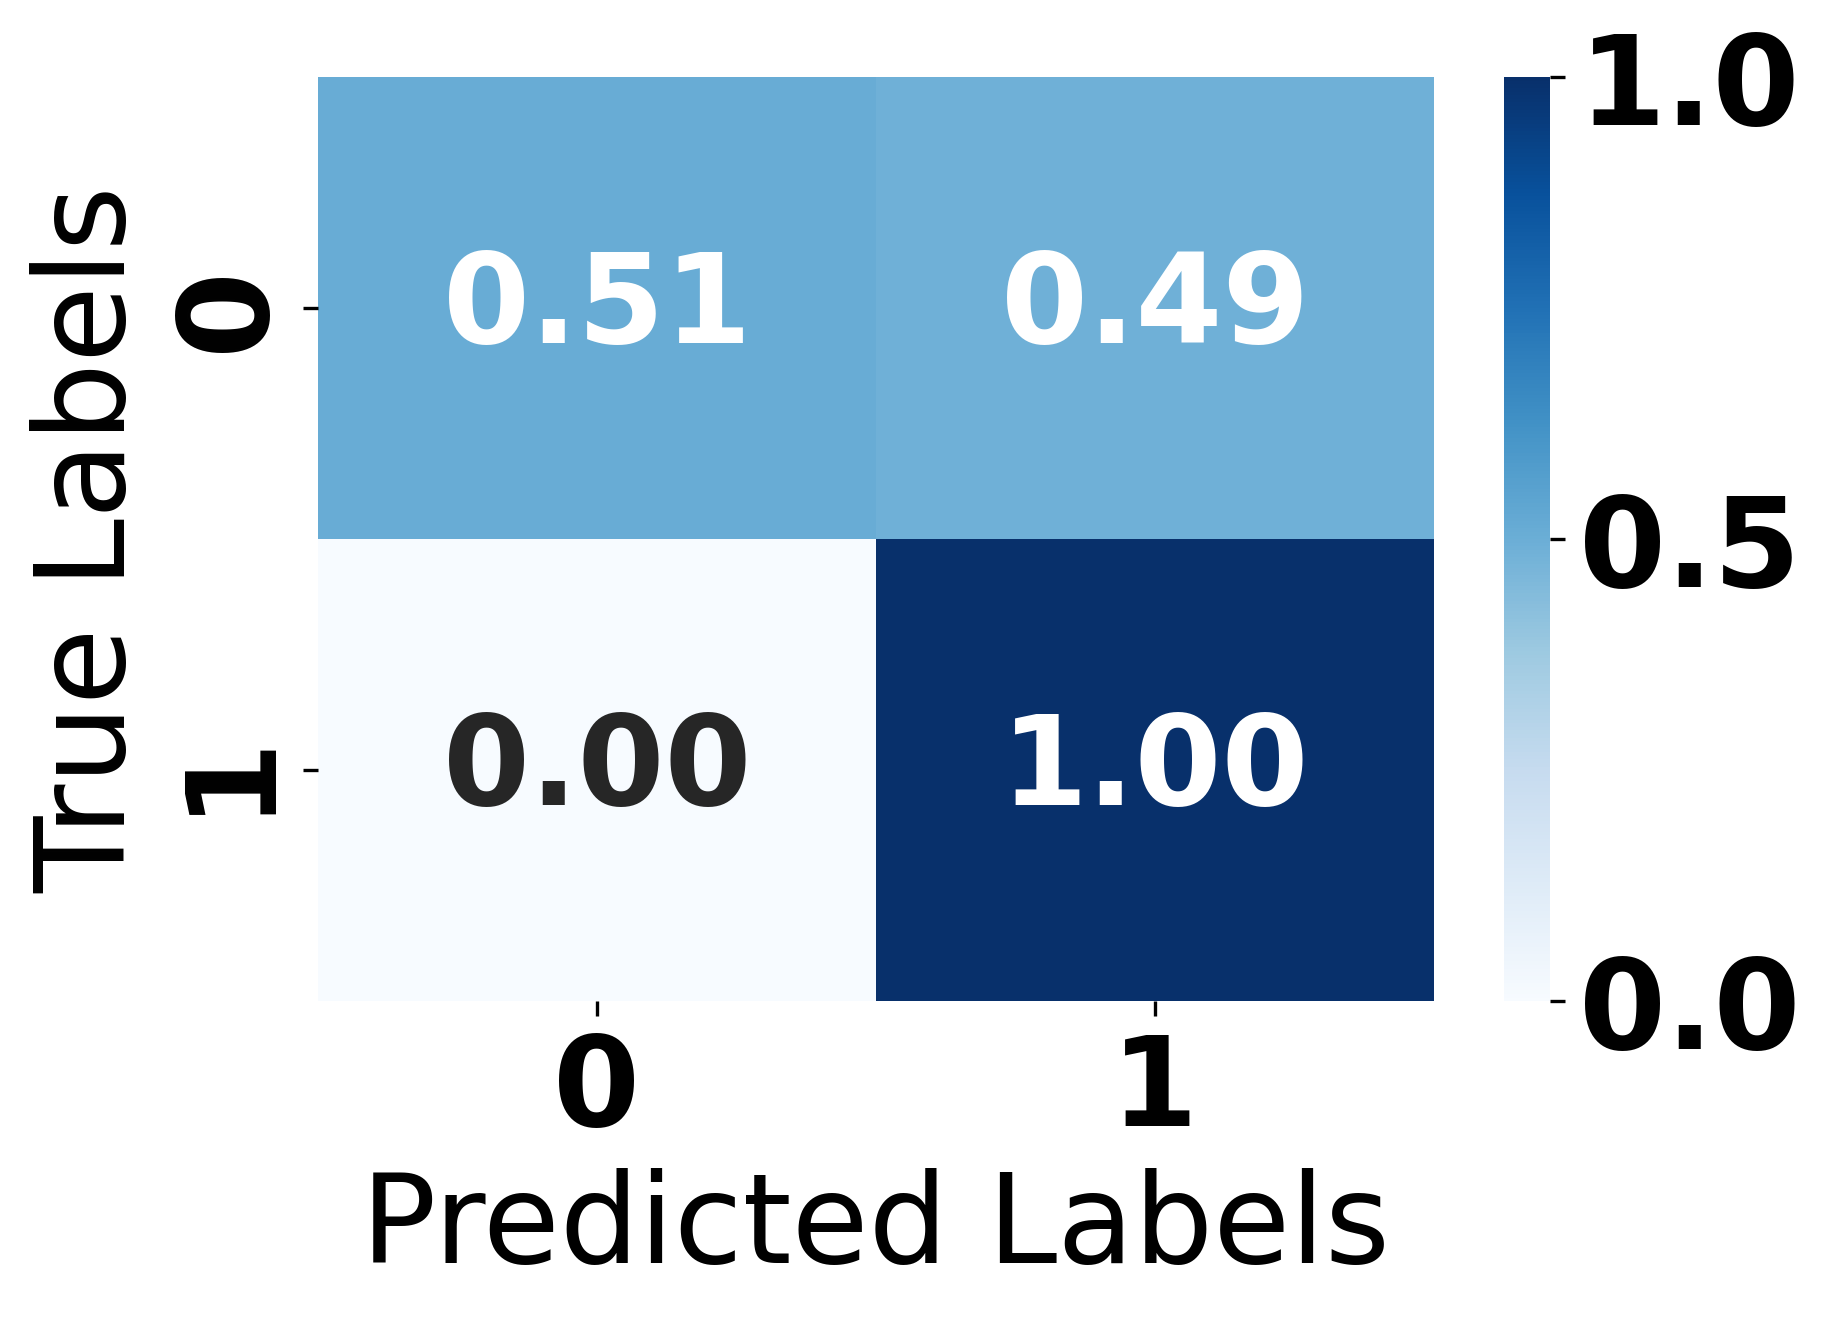

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - accuracy: 0.5165 - loss: 0.8501 - val_accuracy: 0.2361 - val_loss: 2.1630
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.7694 - loss: 0.4998 - val_accuracy: 0.2361 - val_loss: 2.4620
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8776 - loss: 0.3892 - val_accuracy: 0.2361 - val_loss: 2.2940
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9389 - loss: 0.2236 - val_accuracy: 0.2361 - val_loss: 2.1556
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - accuracy: 0.9295 - loss: 0.2211 - val_accuracy: 0.2361 - val_loss: 2.2859
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9514 - loss: 0.1803 - val_accuracy: 0.2361 - val_loss: 2.3943
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9626 - loss: 0.1390 - val_accuracy: 0.2361 - val_loss: 2.2731
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9567 - loss: 0.1268 - val_accuracy: 0.2361 - val_loss: 2.1948

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
Normalized Confusion Matrix:
[[0.65454545 0.34545455]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.65      0.79        55
     Class 1       0.47      1.00      0.64        17

    accuracy                           0.74        72
   macro avg       0.74      0.83      0.72        72
weighted avg       0.88      0.74      0.76        72



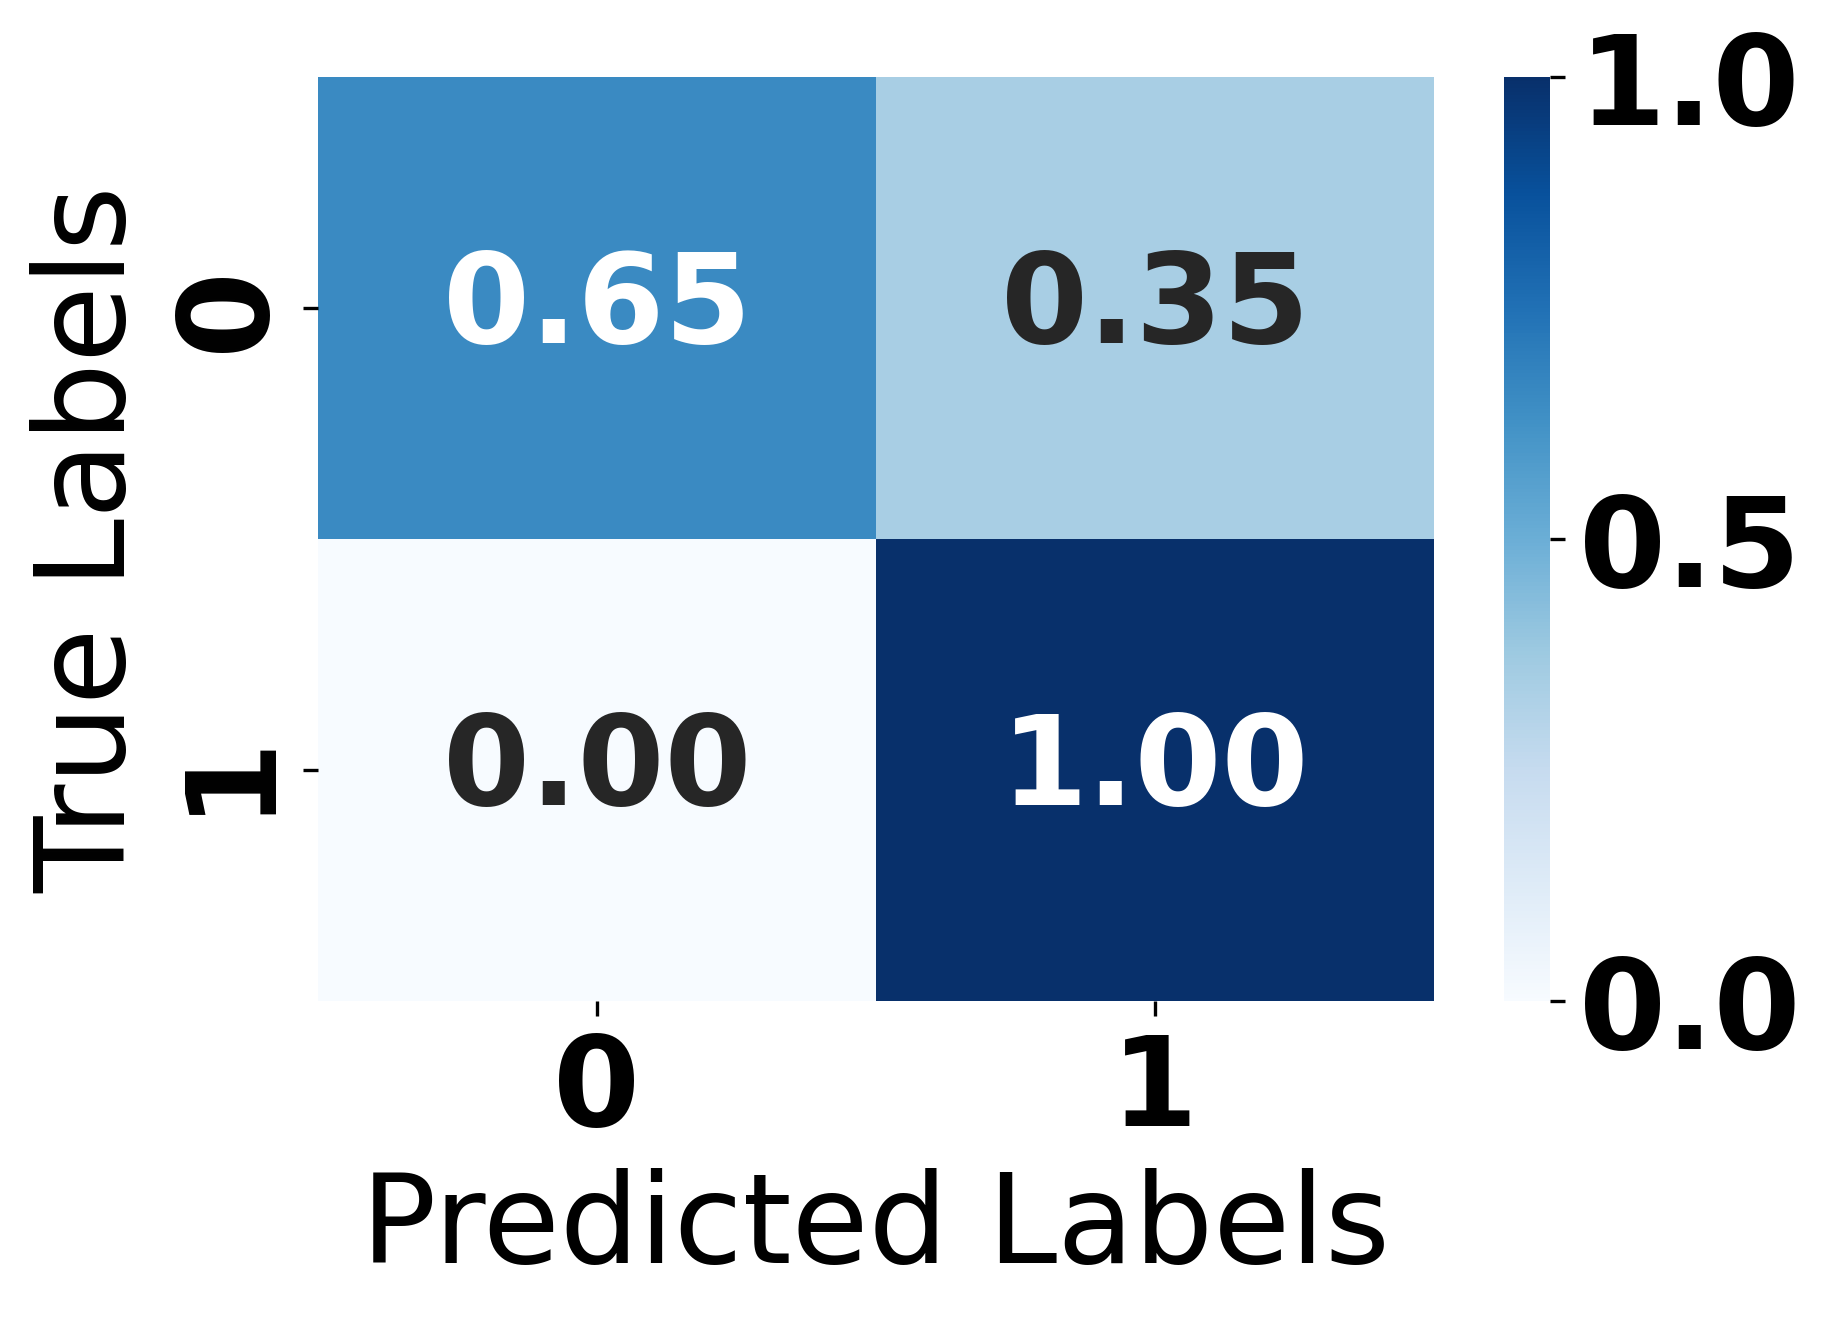

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
vocab_size = 200  # This should be set according to your dataset
embed_dim = 64  # Embedding size for each token
ff_dim = 64  # Hidden layer size in the feed-forward network

# Create the Transformer model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)

# Compile the model
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the Transformer model
simple_transformer_model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the Transformer model
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 14s 132ms/step - accuracy: 0.3981 - loss: 0.7616 - val_accuracy: 0.2361 - val_loss: 0.7446
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.6504 - loss: 0.6614 - val_accuracy: 0.2500 - val_loss: 0.7256
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step - accuracy: 0.7149 - loss: 0.6399 - val_accuracy: 0.3194 - val_loss: 0.7129
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - accuracy: 0.7445 - loss: 0.6085 - val_accuracy: 0.4722 - val_loss: 0.6908
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.7876 - loss: 0.5897 - val_accuracy: 0.6111 - val_loss: 0.6489
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.7849 - loss: 0.5700 - val_accuracy: 0.6944 - val_loss: 0.6323
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.8176 - loss: 0.5440 - val_accuracy: 0.7361 - val_loss: 0.6066
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - accuracy: 0.8184 - loss: 0.5355 - val_accuracy: 0.7639 -

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 212ms/step
Normalized Confusion Matrix:
[[0.78181818 0.21818182]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.78      0.88        55
     Class 1       0.59      1.00      0.74        17

    accuracy                           0.83        72
   macro avg       0.79      0.89      0.81        72
weighted avg       0.90      0.83      0.84        72



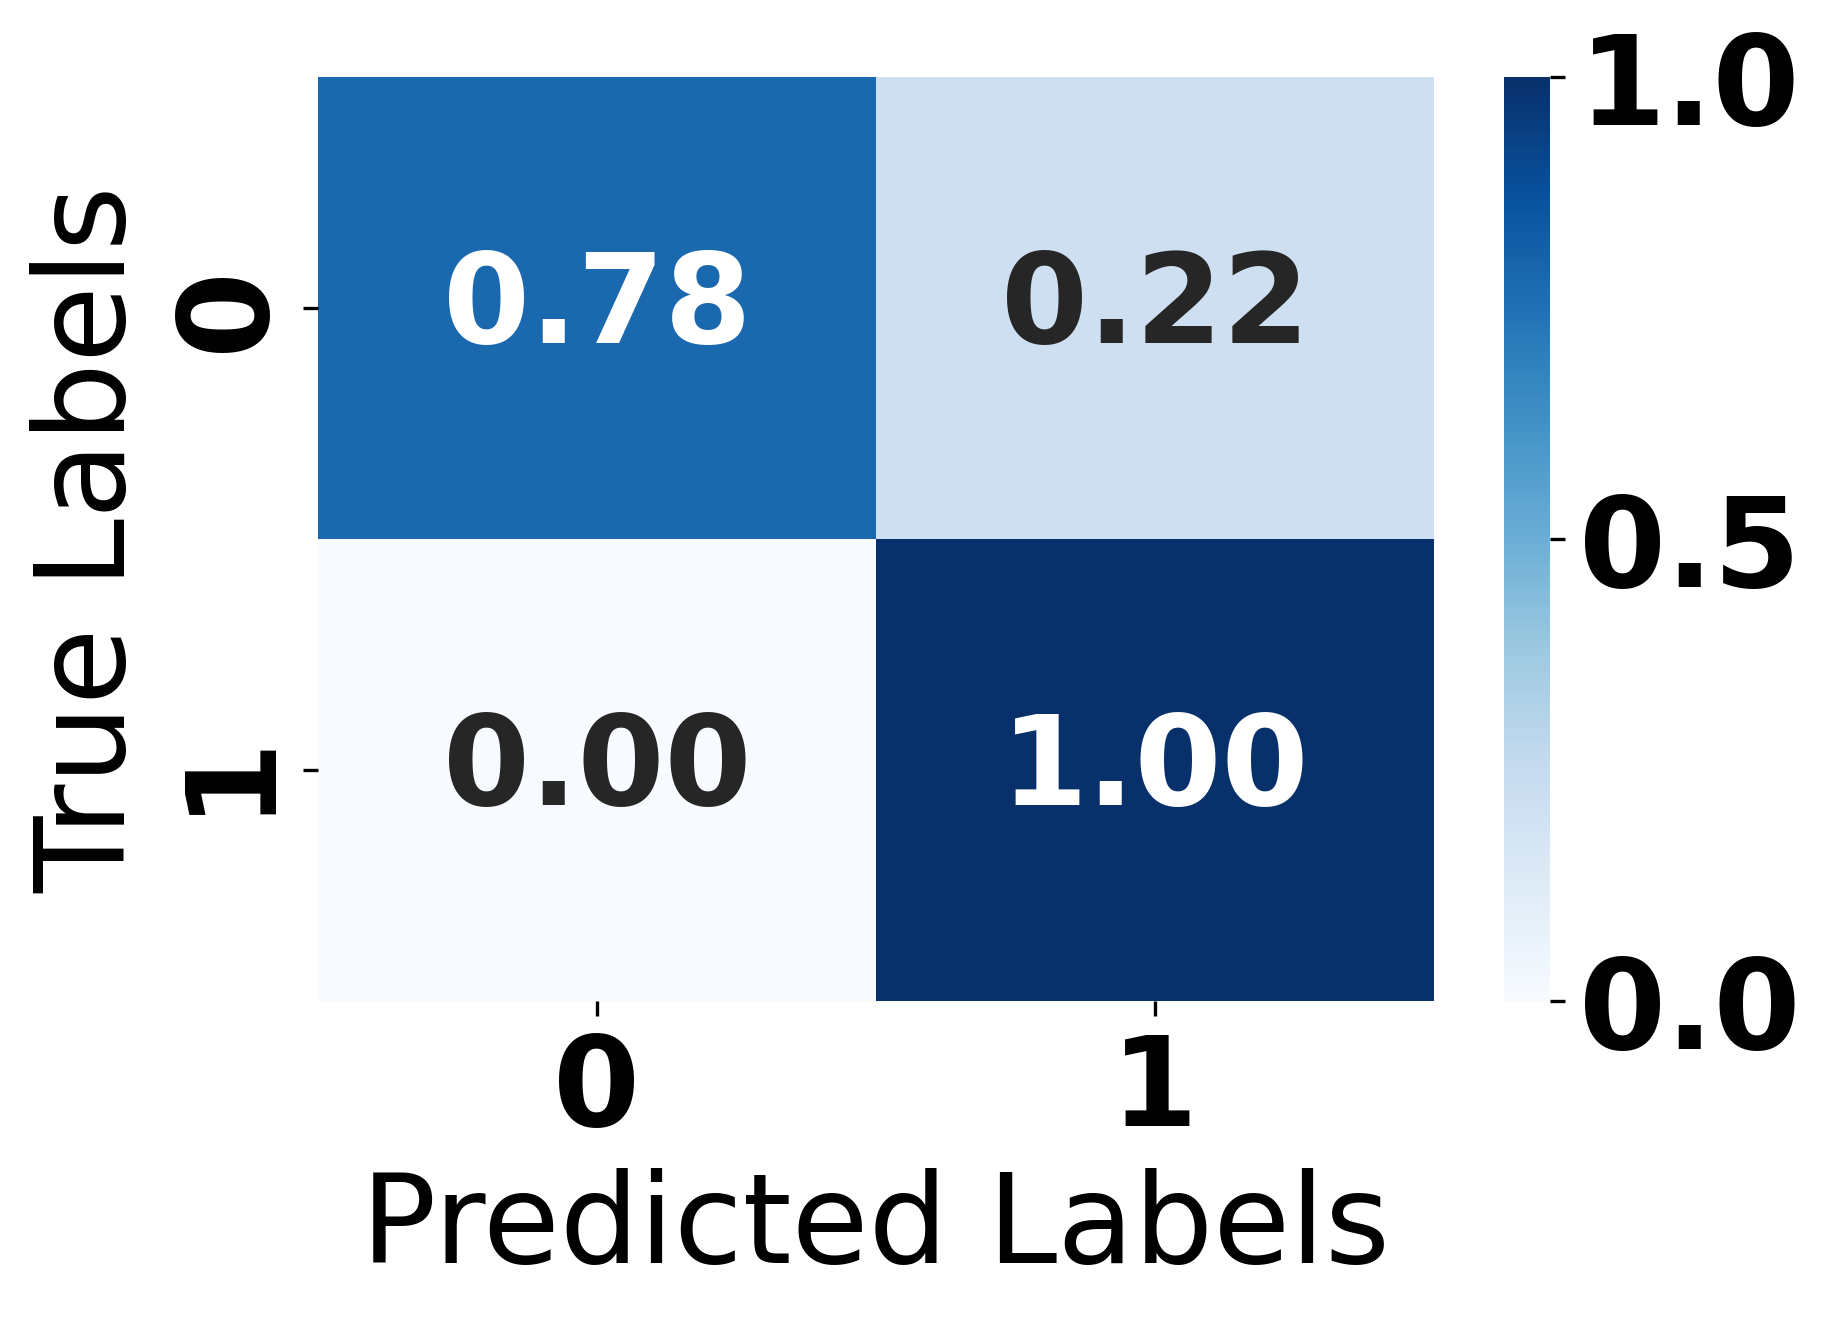

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/TVAE (Tabular Variational Autoencoder)/model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./bad_results",        # new folder
    per_device_train_batch_size=30,   # too large → unstable updates
    num_train_epochs=1,              # too few epochs
    learning_rate=0.01,                 # too high → catastrophic divergence
    weight_decay=0.01,                  # no regularization → overfitting
    logging_dir="./logs",
    logging_steps=10,                 # rarely log → less feedback
    save_steps=15,                  # almost never save
    eval_steps=15,                  # almost never evaluate
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,                  # no warmup → unstable start
    gradient_accumulation_steps=1,
    fp16=False
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=22, training_loss=2.283145481889898, metrics={'train_runtime': 128.0615, 'train_samples_per_second': 4.998, 'train_steps_per_second': 0.172, 'total_flos': 0.0, 'train_loss': 2.283145481889898, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.9643    0.9818    0.9730        55
           1     0.9375    0.8824    0.9091        17

    accuracy                         0.9583        72
   macro avg     0.9509    0.9321    0.9410        72
weighted avg     0.9580    0.9583    0.9579        72

Confusion Matrix:
 [[54  1]
 [ 2 15]]


### Gaussian Copula (via SDV's CopulaGAN)

In [ ]:
# Define the path
test_load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Actual"
train_load_path = "/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Actual/Preprocessed"
# Load the files
x_train = pd.read_csv(f"{train_load_path}/x_train.csv")
x_test = pd.read_csv(f"{test_load_path}/x_test.csv")
y_train = pd.read_csv(f"{train_load_path}/y_train.csv")
y_test = pd.read_csv(f"{test_load_path}/y_test.csv")

print("Files loaded successfully!")

Files loaded successfully!


In [ ]:
!pip install sdv

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.3/193.3 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 86.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 198.3/198.3 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.6 MB/s eta 0:00:00


In [ ]:
# Install latest SDV
!pip install -U sdv

In [ ]:
from sdv.single_table import GaussianCopulaSynthesizer
from sdv.metadata import SingleTableMetadata
from collections import Counter

In [ ]:
# Define categorical feature indices (adjust for your dataset)
categorical_features = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]

# Ensure y_train is 1D array
if isinstance(y_train, pd.DataFrame):
    y_train = y_train.values.flatten()

# Ensure x_train is a DataFrame
if not isinstance(x_train, pd.DataFrame):
    x_train = pd.DataFrame(x_train)

# Add target column
x_train['target'] = y_train

# Check class distribution
print("Before GaussianCopula:", Counter(y_train))

# Separate minority class (assuming class 1 is minority)
minority_df = x_train[x_train['target'] == 1]

# Calculate number of synthetic samples needed
class_0_count = Counter(y_train)[0]
class_1_count = Counter(y_train)[1]
target_class_1_count = class_0_count + 200
samples_to_generate = target_class_1_count - class_1_count

# Define metadata
metadata = SingleTableMetadata()
metadata.detect_from_dataframe(data=minority_df)

# Mark categorical columns
for col in x_train.columns[categorical_features]:
    metadata.update_column(column_name=col, sdtype='categorical')
metadata.update_column(column_name='target', sdtype='categorical')

# Initialize synthesizer
synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(minority_df)

# Generate synthetic samples
synthetic_data = synthesizer.sample(num_rows=samples_to_generate)

# Keep only minority samples (if needed)
synthetic_data = synthetic_data[synthetic_data['target'] == 1]

# Split synthetic into X and y
synthetic_x_train = synthetic_data.drop(columns='target').reset_index(drop=True)
synthetic_y_train = synthetic_data['target'].reset_index(drop=True)

# Combine with original
x_resampled_df = pd.concat([x_train.drop(columns='target'), synthetic_x_train], ignore_index=True)
y_resampled_df = pd.concat([pd.Series(y_train), synthetic_y_train], ignore_index=True)

# Final class distribution
print("After GaussianCopula:", Counter(y_resampled_df))

Before GaussianCopula: Counter({np.int64(0): 220, np.int64(1): 91})


/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:168: FutureWarning: The 'SingleTableMetadata' is deprecated. Please use the new 'Metadata' class for synthesizers.
  warnings.warn(DEPRECATION_MSG, FutureWarning)
/usr/local/lib/python3.12/dist-packages/sdv/single_table/base.py:134: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


After GaussianCopula: Counter({1: 420, 0: 220})


In [ ]:
"""
# Save to CSV
x_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Gaussian Copula (via SDV's CopulaGAN)/x_resampled_df", index=False)
# Save to CSV
y_resampled_df.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Gaussian Copula (via SDV's CopulaGAN)/y_resampled_df", index=False)
# Save to CSV
synthetic_x_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Gaussian Copula (via SDV's CopulaGAN)/synthetic_x_train", index=False)
# Save to CSV
synthetic_y_train.to_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/Gaussian Copula (via SDV's CopulaGAN)/synthetic_y_train", index=False)
"""

In [ ]:
# Load the DataFrame
x_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/x_resampled_df")
y_resampled_df = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/y_resampled_df")
synthetic_x_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/synthetic_x_train")
synthetic_y_train = pd.read_csv("/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CTGAN for Synthetic Data Generation/synthetic_y_train")

In [ ]:
# Count occurrences for each category in each feature
for column in x_resampled_df.columns:
    print(f"Counts for {column}:")
    print(x_resampled_df[column].value_counts())
    print()  # Add a newline for better readability

Counts for Age:
Age
31    27
38    21
33    19
40    18
28    17
      ..
94     1
93     1
98     1
10     1
95     1
Name: count, Length: 89, dtype: int64

Counts for Gender:
Gender
0    439
1    201
Name: count, dtype: int64

Counts for Smoking:
Smoking
0    421
1    219
Name: count, dtype: int64

Counts for Hx Smoking:
Hx Smoking
0    554
1     86
Name: count, dtype: int64

Counts for Hx Radiothreapy:
Hx Radiothreapy
0    597
1     43
Name: count, dtype: int64

Counts for Thyroid Function:
Thyroid Function
0    559
3     38
2     23
4     18
1      2
Name: count, dtype: int64

Counts for Physical Examination:
Physical Examination
3    259
1    212
2    149
0     15
4      5
Name: count, dtype: int64

Counts for Adenopathy:
Adenopathy
0    342
2    107
3     96
1     56
4     31
5      8
Name: count, dtype: int64

Counts for Pathology:
Pathology
0    501
2     62
1     42
3     35
Name: count, dtype: int64

Counts for Focality:
Focality
0    322
1    318
Name: count, dtype: int64

C

## Pipeline

In [ ]:
# Train/Test

x_train = x_resampled_df.copy()
y_train = y_resampled_df.copy()

In [ ]:
# Impoting libaries for pipeline
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn import metrics

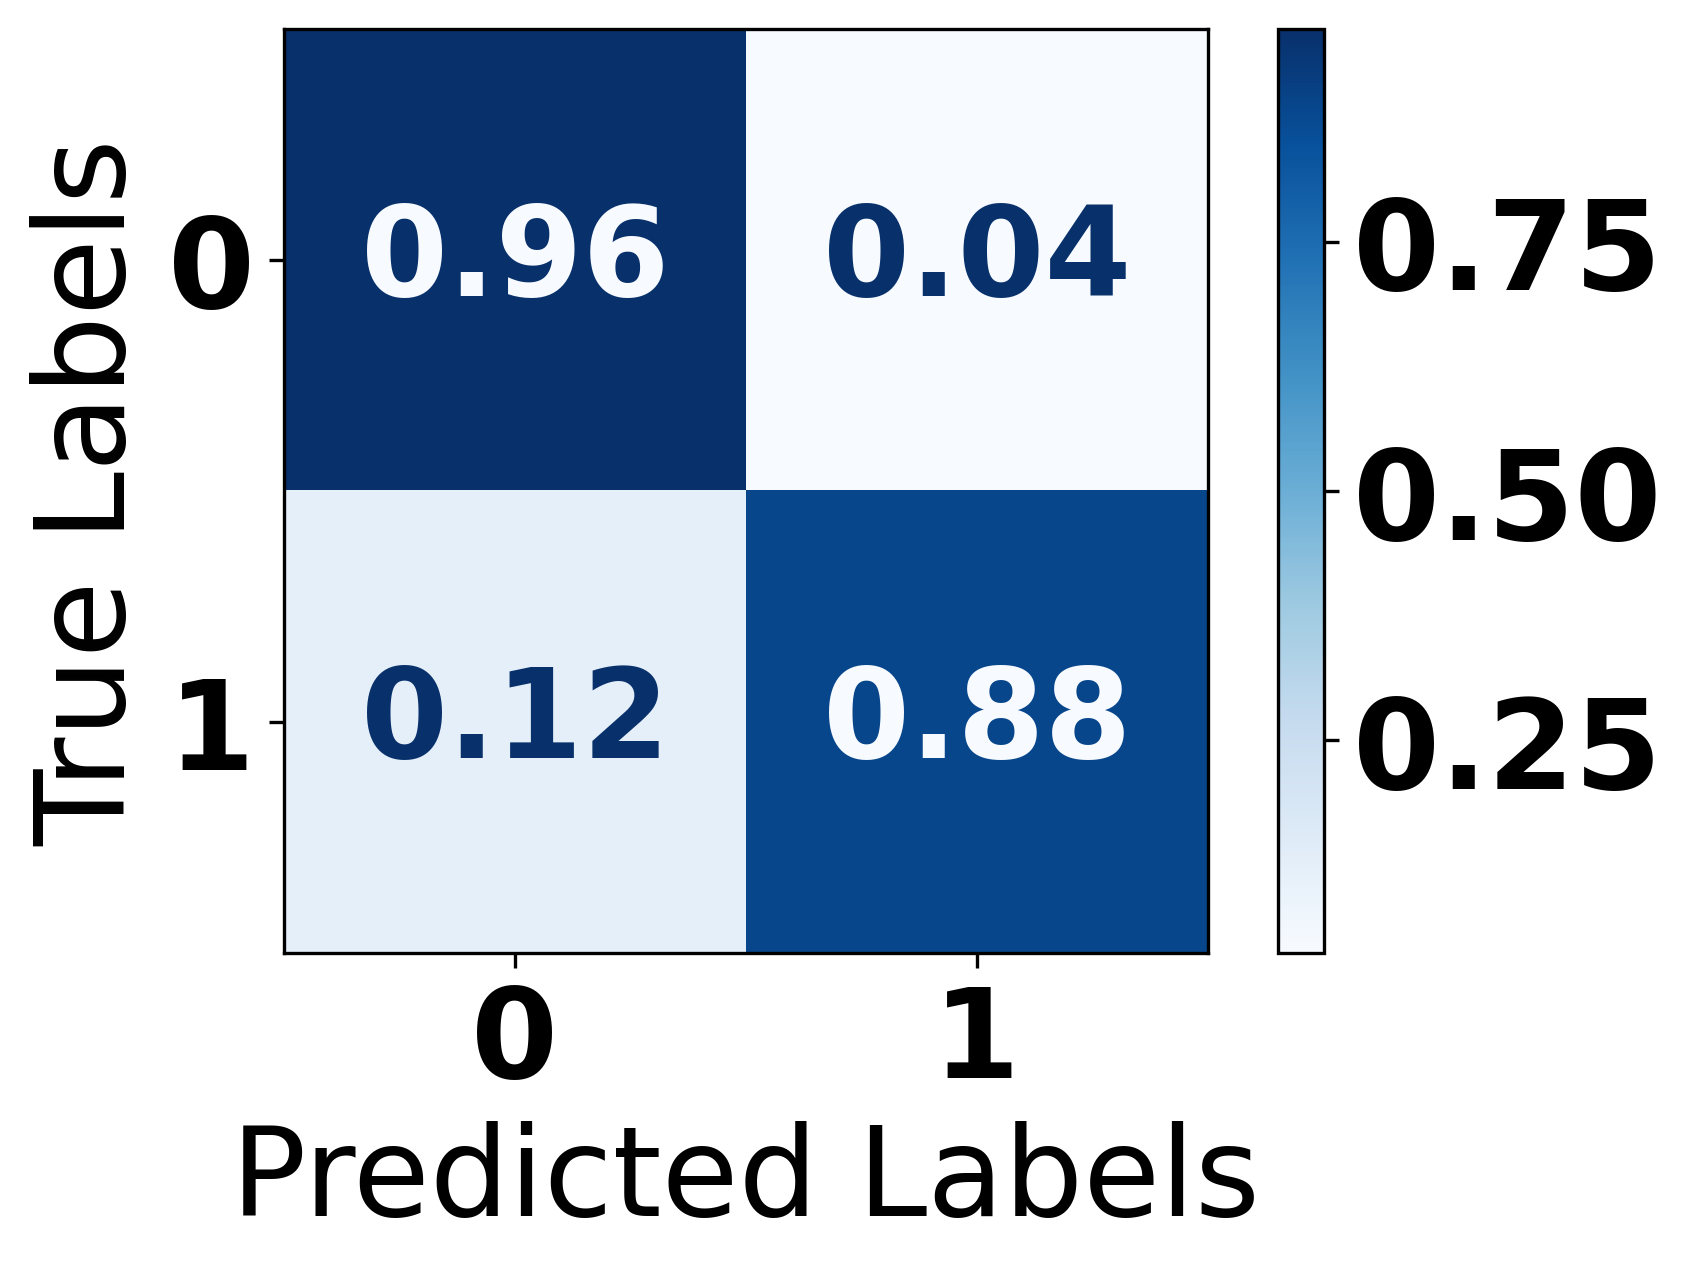

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.96      0.96        55
     Class 1       0.88      0.88      0.88        17

    accuracy                           0.94        72
   macro avg       0.92      0.92      0.92        72
weighted avg       0.94      0.94      0.94        72

Train Accuracy: 1.0
Test Accuracy: 0.9444444444444444


In [ ]:
# Create and fit the Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier(random_state=7)
DT.fit(x_train, y_train)

# Predict on the test set
y_pred = DT.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')

# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = DT.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(DT, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/DT.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/DT.pkl']

In [ ]:
import joblib

# Load the model from file
DT = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/DT.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


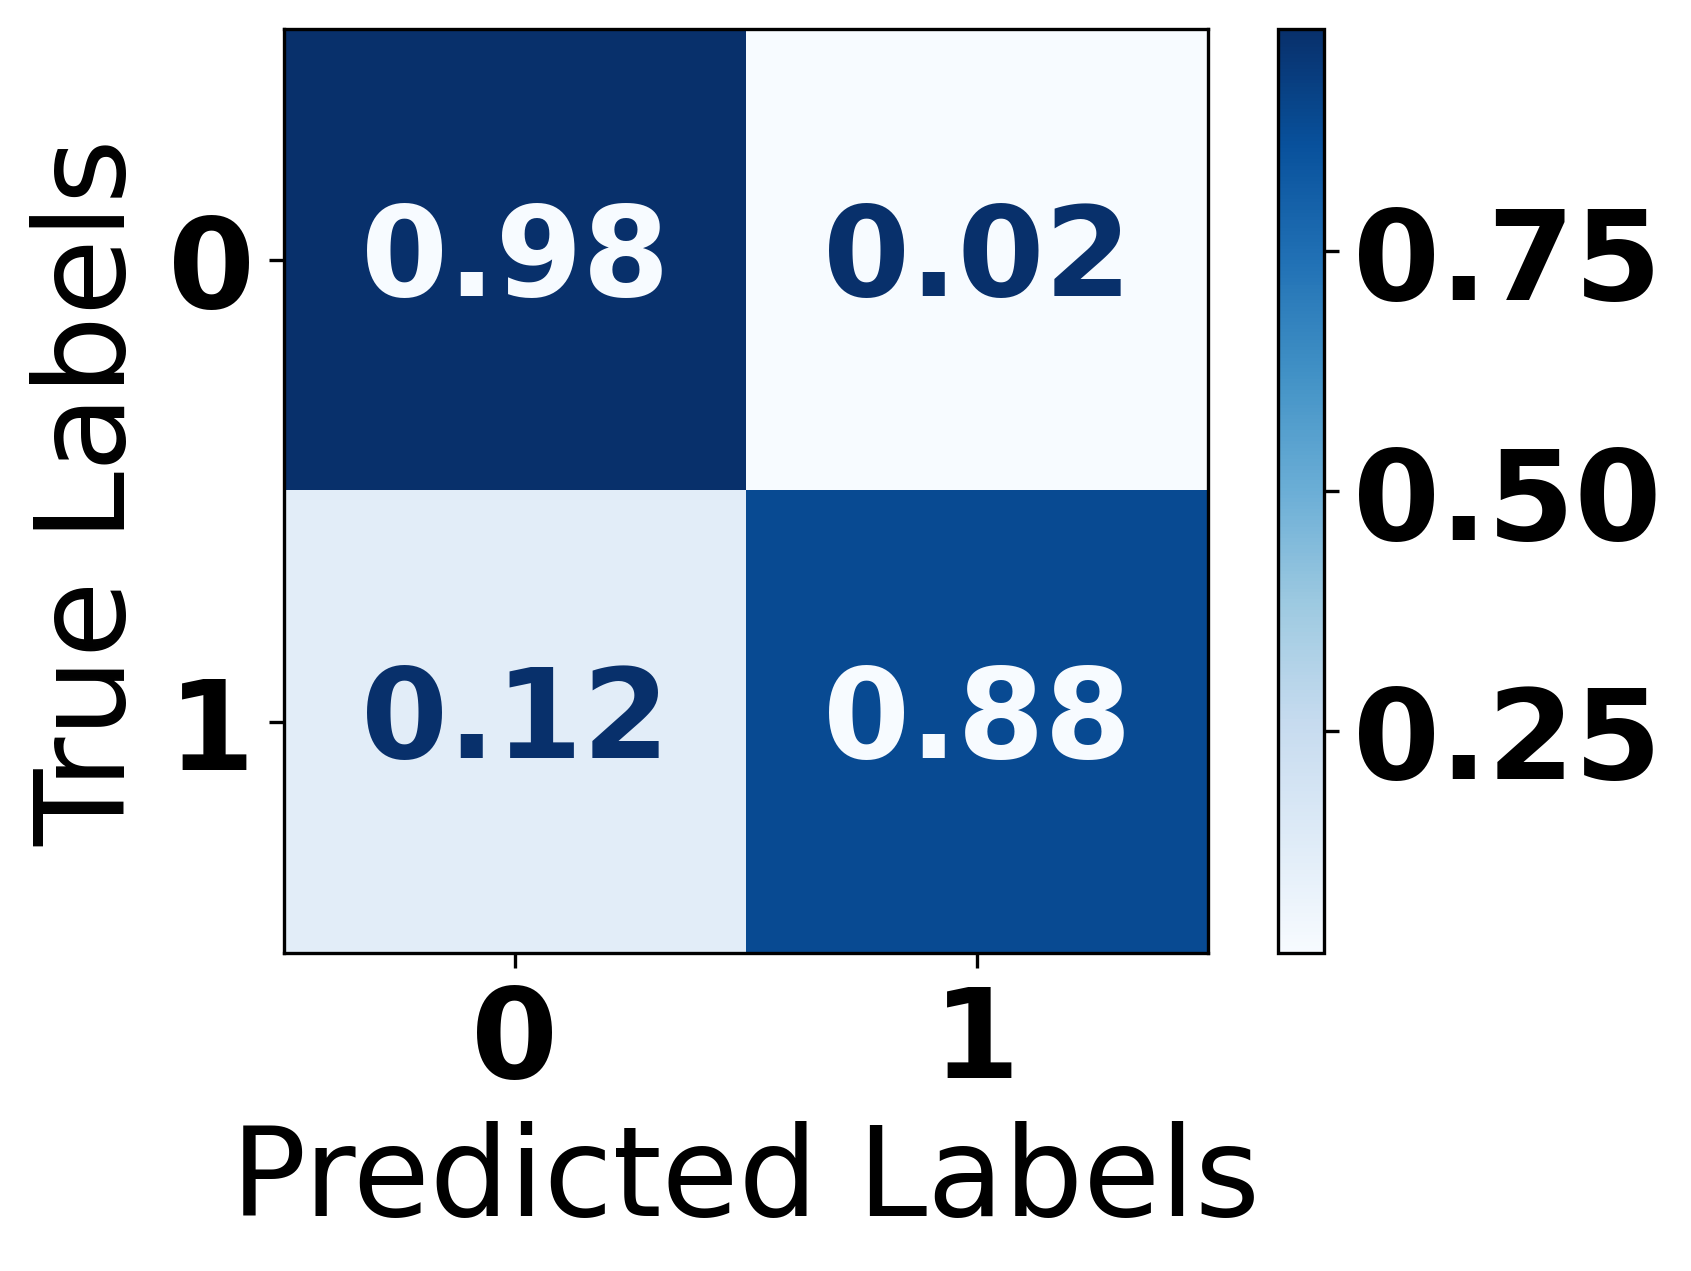

Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.98      0.97        55
     Class 1       0.94      0.88      0.91        17

    accuracy                           0.96        72
   macro avg       0.95      0.93      0.94        72
weighted avg       0.96      0.96      0.96        72

Train Accuracy: 0.9328125
Test Accuracy: 0.9583333333333334


In [ ]:
# Create an RUSBoost classifier
from imblearn.ensemble import RUSBoostClassifier

rusboost = RUSBoostClassifier(n_estimators=2, random_state=42)

# Fit the classifier to the training data
rusboost.fit(x_train, y_train)

# Predicting the output on the test dataset
y_pred = rusboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rusboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Generate classification report
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Calculate train accuracy
y_train_pred = rusboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(rusboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/RUSBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/RUSBoost.pkl']

In [ ]:
import joblib

# Load the model from file
RUSBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/RUSBoost.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


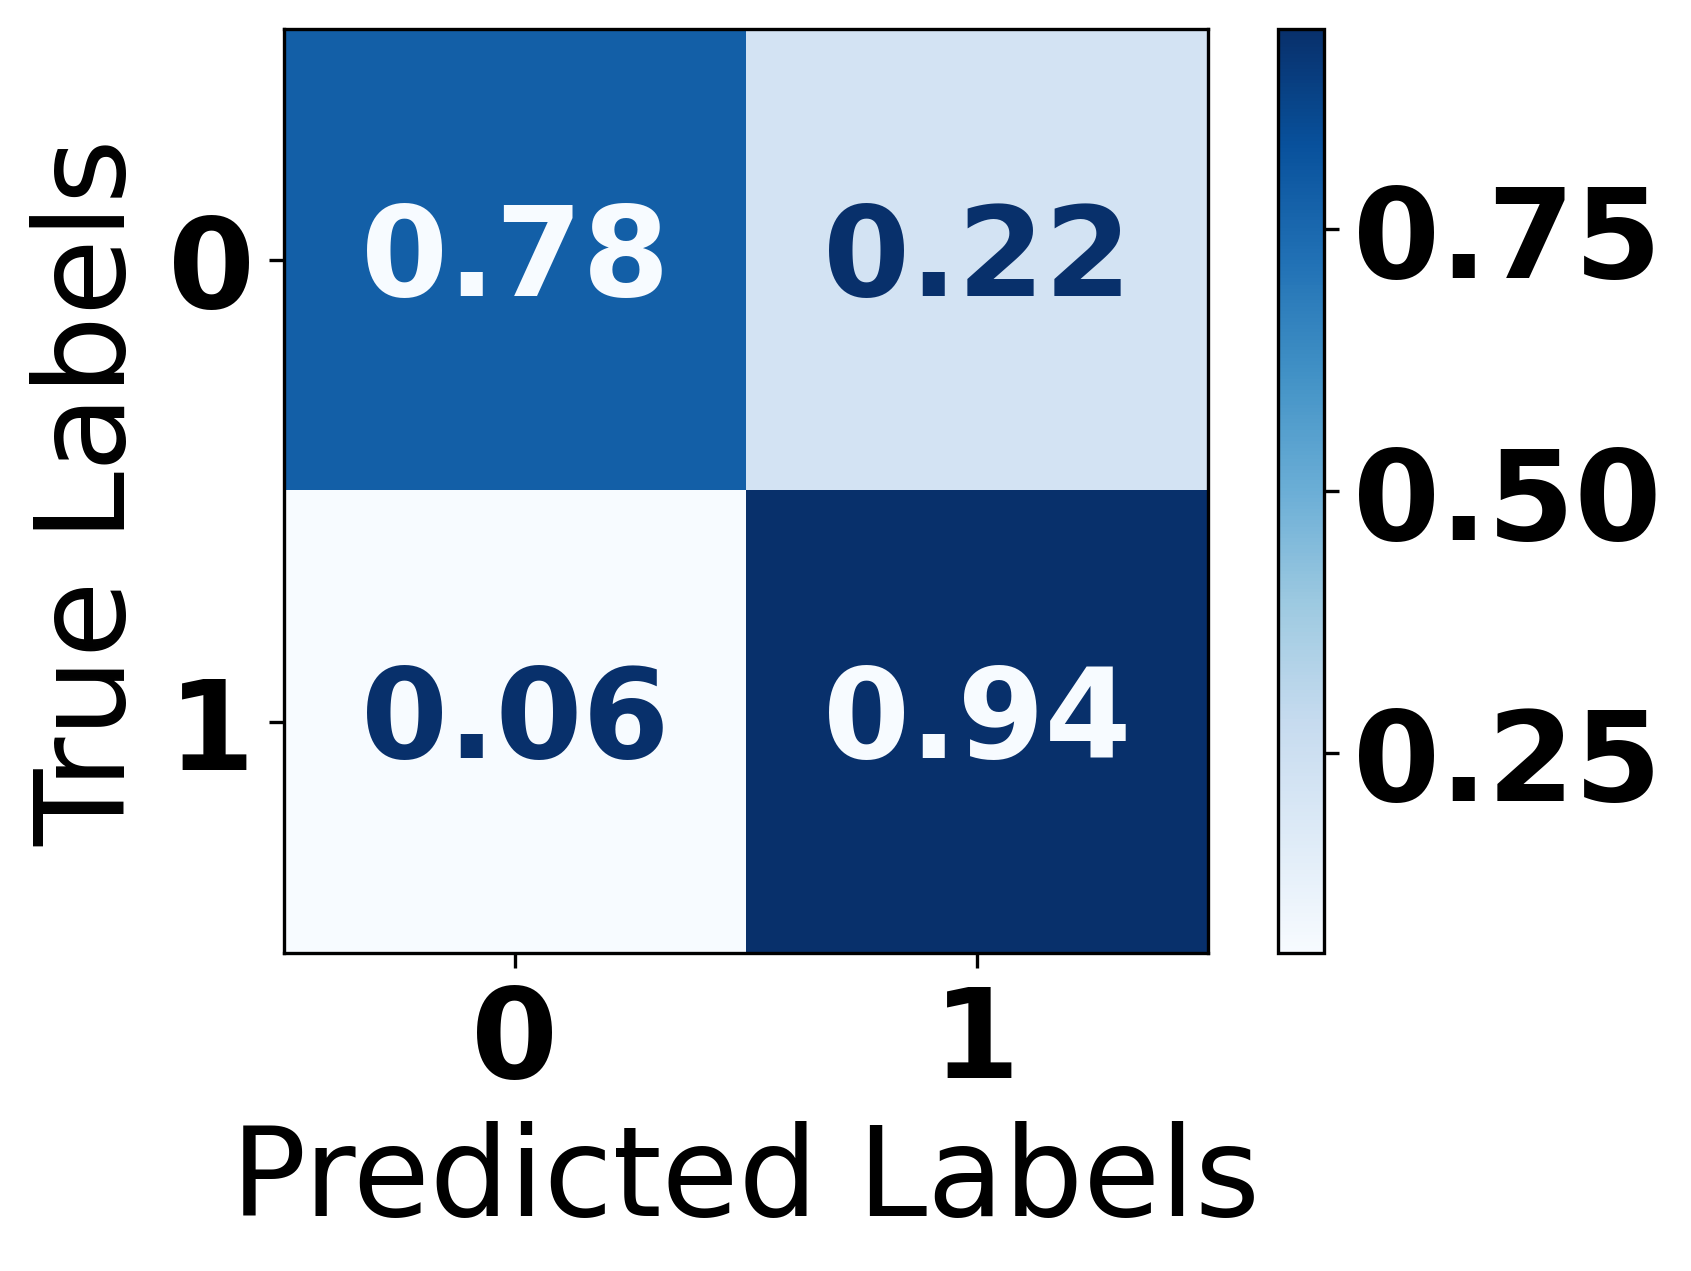

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.78      0.87        55
           1       0.57      0.94      0.71        17

    accuracy                           0.82        72
   macro avg       0.77      0.86      0.79        72
weighted avg       0.88      0.82      0.83        72

Train Accuracy: 0.8921875
Test Accuracy: 0.8194444444444444


In [ ]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
# Intentionally bad configuration
RF = RandomForestClassifier(
    n_estimators=2,      # Only one tree
    max_depth=5,         # Very shallow tree
    max_features=1,      # Use only one feature per split
    min_samples_split=20, # Require lots of samples to split
    min_samples_leaf=25,  # Each leaf must have many samples
    random_state=2
)

# Fit the classifier to the training data
y_pred = RF.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = RF.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(RF, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/RF.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/RF.pkl']

In [ ]:
import joblib

# Load the model from file
RF = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/RF.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


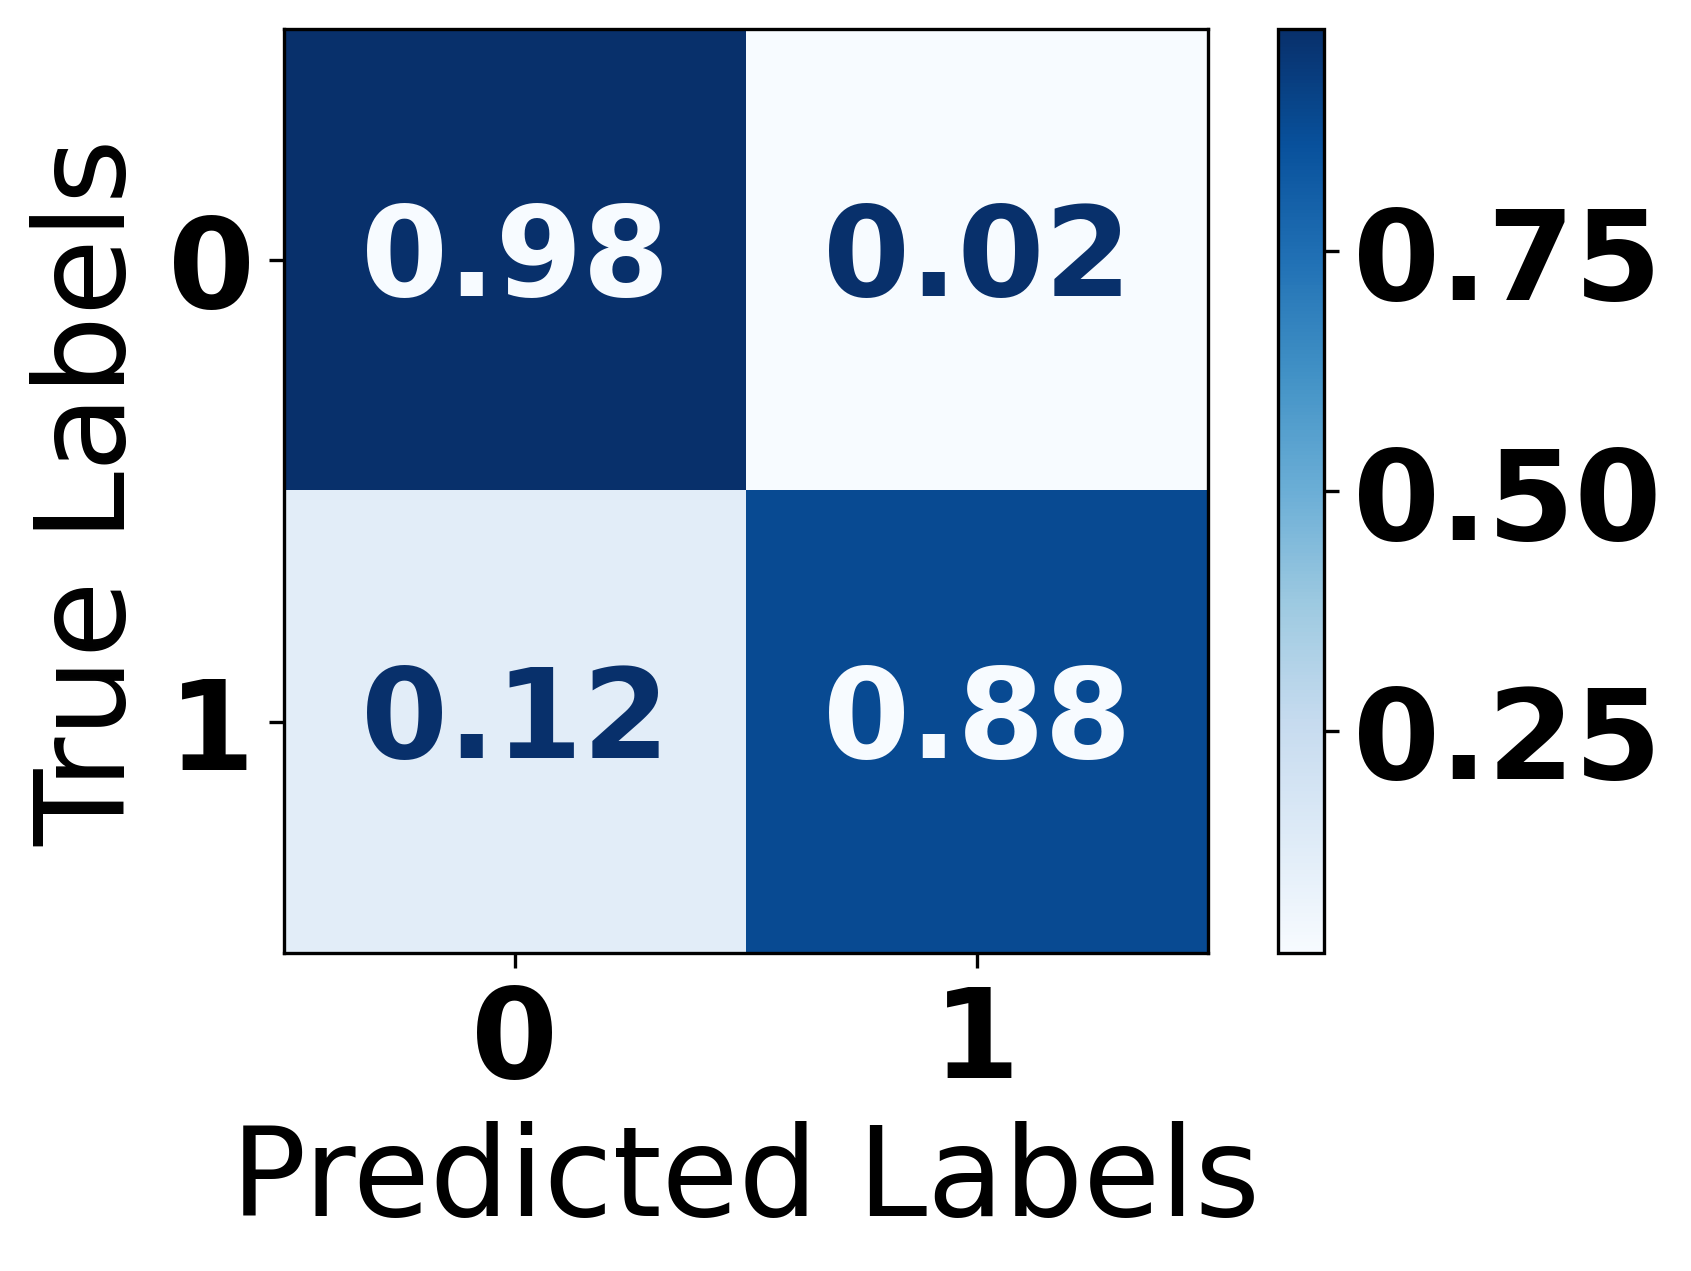

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.94      0.88      0.91        17

    accuracy                           0.96        72
   macro avg       0.95      0.93      0.94        72
weighted avg       0.96      0.96      0.96        72

Train Accuracy: 0.9671875
Test Accuracy: 0.9583333333333334


In [ ]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
GNB = GaussianNB(var_smoothing=0.002)

# Fit the classifier to the training data
y_pred = GNB.fit(x_train, y_train).predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=GNB.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = GNB.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(GNB, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/GNB.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/GNB.pkl']

In [ ]:
import joblib

# Load the model from file
GNB = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/GNB.pkl')

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


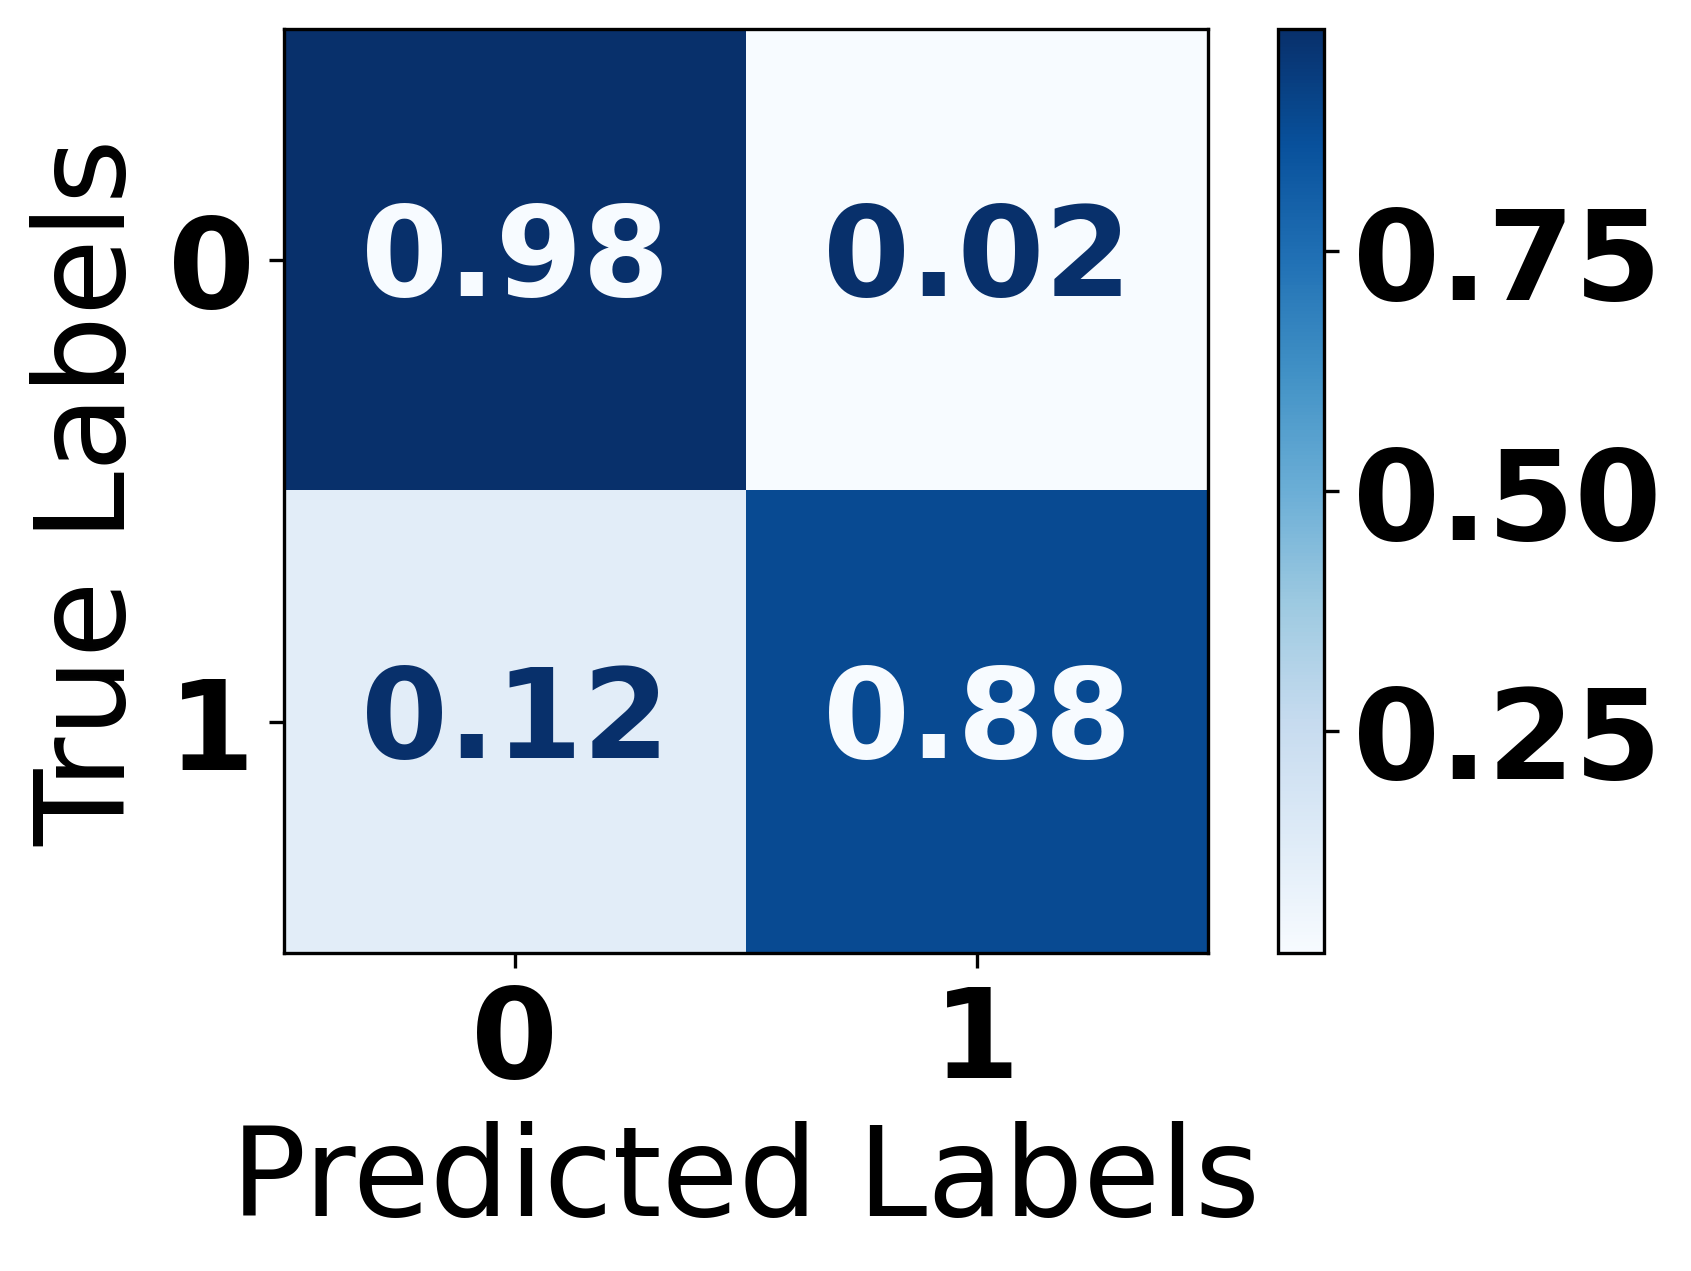

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.94      0.88      0.91        17

    accuracy                           0.96        72
   macro avg       0.95      0.93      0.94        72
weighted avg       0.96      0.96      0.96        72

Train Accuracy: 0.9328125
Test Accuracy: 0.9583333333333334


In [ ]:
# Create an AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

Adaboost = AdaBoostClassifier(n_estimators=2, learning_rate=0.4, random_state=42)

# Train the AdaBoost classifier
Adaboost.fit(x_train, y_train)

# Make predictions on the test set
y_pred = Adaboost.predict(x_test)

# Display the confusion matrix as percentages
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=Adaboost.classes_)
disp.plot(cmap='Blues', values_format='.2f')
# plt.title('Normalized Confusion Matrix (Percentage)')
# Change x label and y label
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Change figure size
plt.gcf().set_size_inches(6, 4)

plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))

# Calculate train accuracy
y_train_pred = Adaboost.predict(x_train)
train_accuracy = accuracy_score(y_train, y_train_pred)

# Print train accuracy
print("Train Accuracy:", train_accuracy)

# Calculate test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

# Print test accuracy
print("Test Accuracy:", test_accuracy)

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(Adaboost, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/AdaBoost.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/AdaBoost.pkl']

In [ ]:
import joblib

# Load the model from file
AdaBoost = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/AdaBoost.pkl')

In [ ]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(random_state=1, max_iter=10).fit(x_train, y_train)
y_pred = clf.predict_proba(x_test)

/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.12/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Normalized Confusion Matrix:
[[0.8        0.2       ]
 [0.11764706 0.88235294]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.96      0.80      0.87        55
     Class 1       0.58      0.88      0.70        17

    accuracy                           0.82        72
   macro avg       0.77      0.84      0.78        72
weighted avg       0.87      0.82      0.83        72



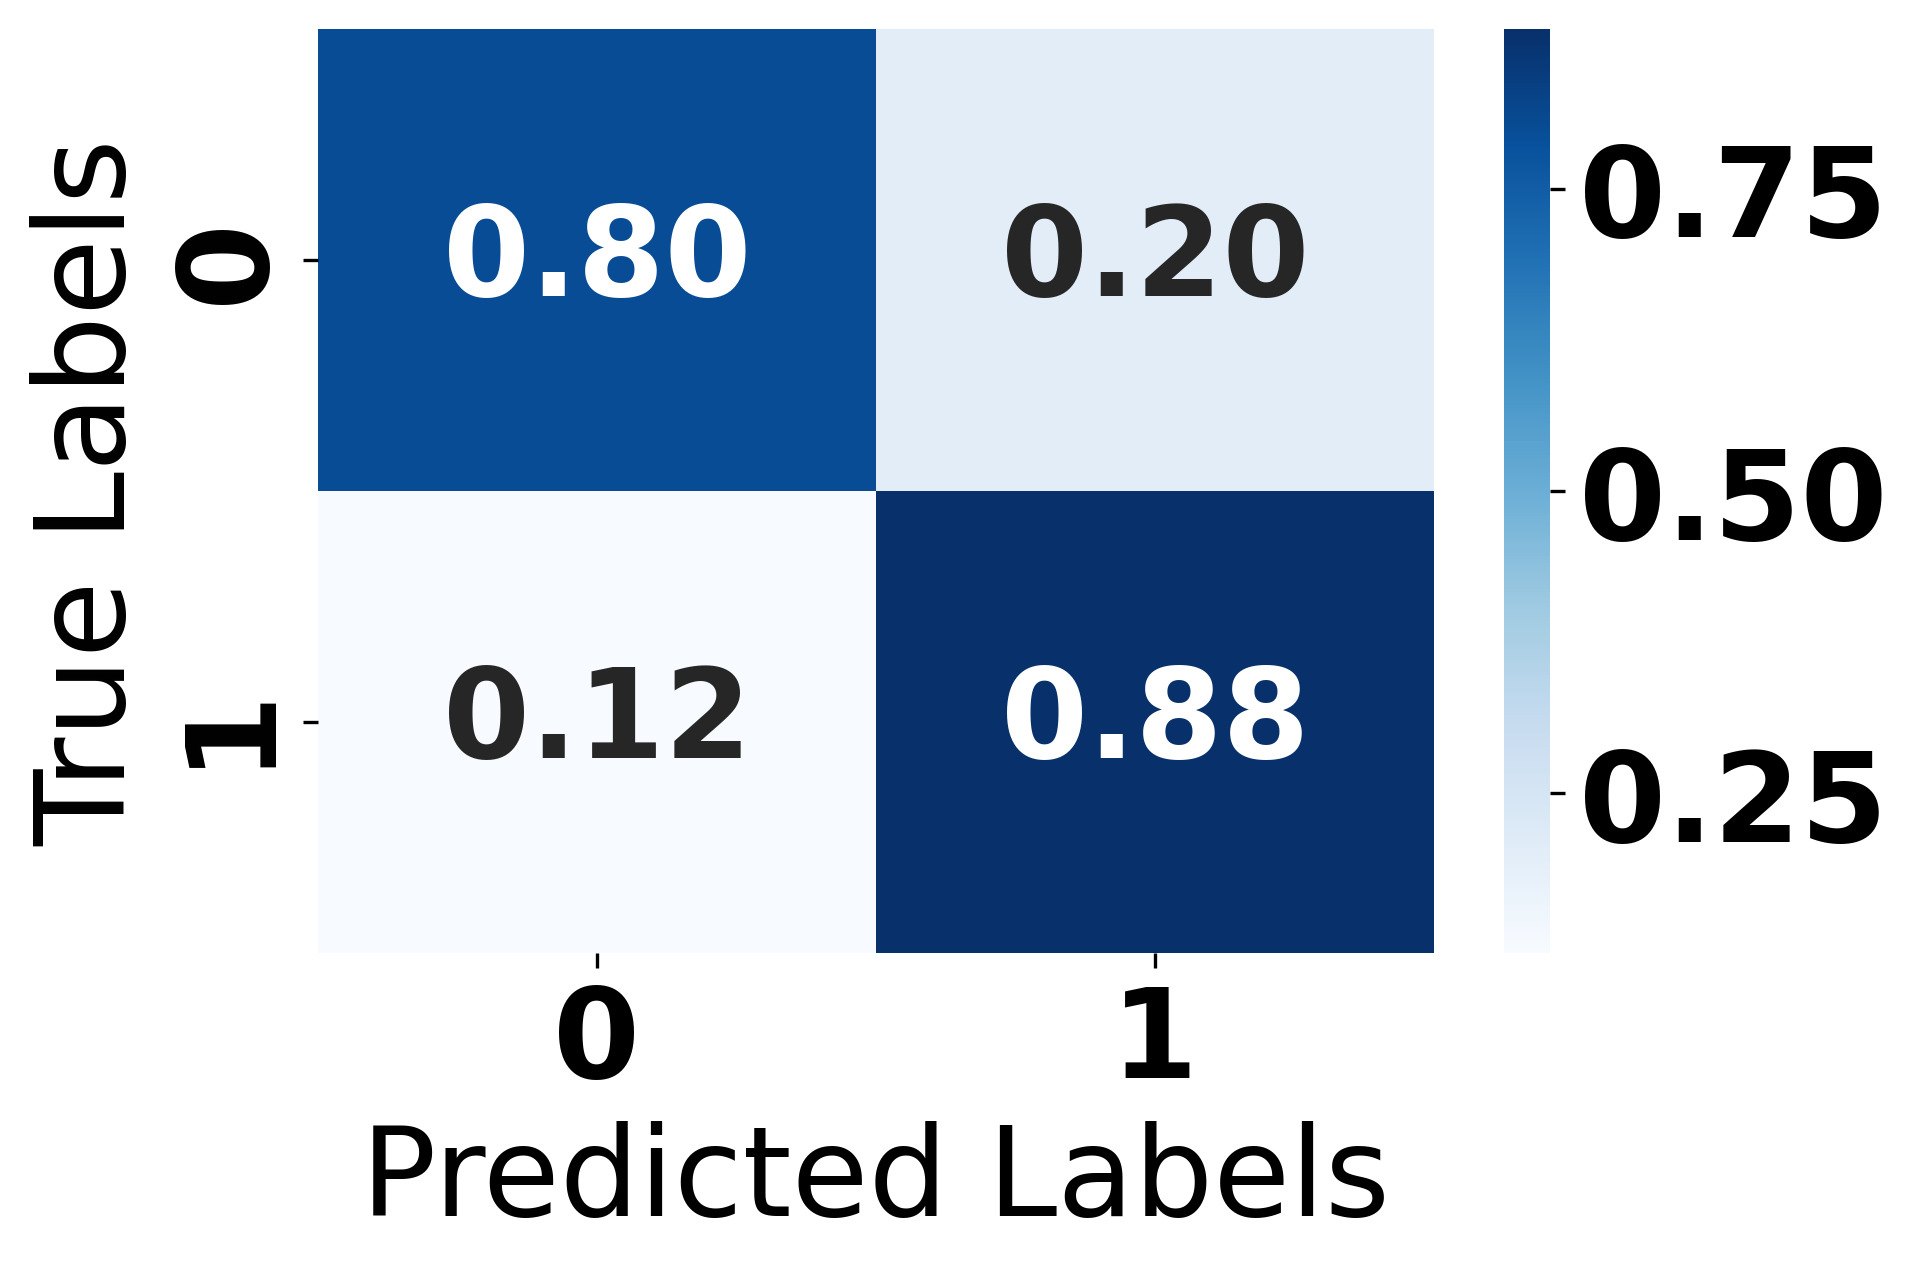

In [ ]:
# Predict probabilities on test data
y_pred_prob = clf.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
import joblib

# Save the model to a file
joblib.dump(clf, '/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/MLP.pkl')
"""

['/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/MLP.pkl']

In [ ]:
import joblib

# Load the model from file
MLP = joblib.load('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/MLP.pkl')

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Add

# Input layer
input_layer = Input(shape=(x_train.shape[1], 1))

# First convolutional block
conv1 = Conv1D(filters=32, kernel_size=3, activation='relu', padding='same')(input_layer)
pool1 = MaxPooling1D(pool_size=2)(conv1)

# Second convolutional block with residual connection
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(pool1)
conv2 = Conv1D(filters=64, kernel_size=3, activation='relu', padding='same')(conv2)

# Residual connection
residual1 = Conv1D(filters=64, kernel_size=1, activation='relu', padding='same')(pool1)
residual1 = Add()([residual1, conv2])
pool2 = MaxPooling1D(pool_size=2)(residual1)

# Flatten layer
flatten = Flatten()(pool2)

# Dense layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer
output = Dense(1, activation='sigmoid')(dense2)

# Create the model
model = Model(inputs=input_layer, outputs=output)

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 620ms/step - accuracy: 0.6010 - loss: 0.6917 - val_accuracy: 0.2361 - val_loss: 1.2897
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.6523 - loss: 0.6640 - val_accuracy: 0.6250 - val_loss: 0.6473
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.8065 - loss: 0.5652 - val_accuracy: 0.3056 - val_loss: 0.7257
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step - accuracy: 0.7102 - loss: 0.4970 - val_accuracy: 0.2361 - val_loss: 0.8769
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.6609 - loss: 0.4825 - val_accuracy: 0.4167 - val_loss: 0.7142
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step - accuracy: 0.7786 - loss: 0.4308 - val_accuracy: 0.5972 - val_loss: 0.6269
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step - accuracy: 0.8289 - loss: 0.4014 - val_accuracy: 0.4861 - val_loss: 0.7326
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.8020 - loss: 0.3823 - val_accuracy: 0.6667 - val_loss:

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
Normalized Confusion Matrix:
[[0.56363636 0.43636364]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.56      0.72        55
     Class 1       0.41      1.00      0.59        17

    accuracy                           0.67        72
   macro avg       0.71      0.78      0.65        72
weighted avg       0.86      0.67      0.69        72



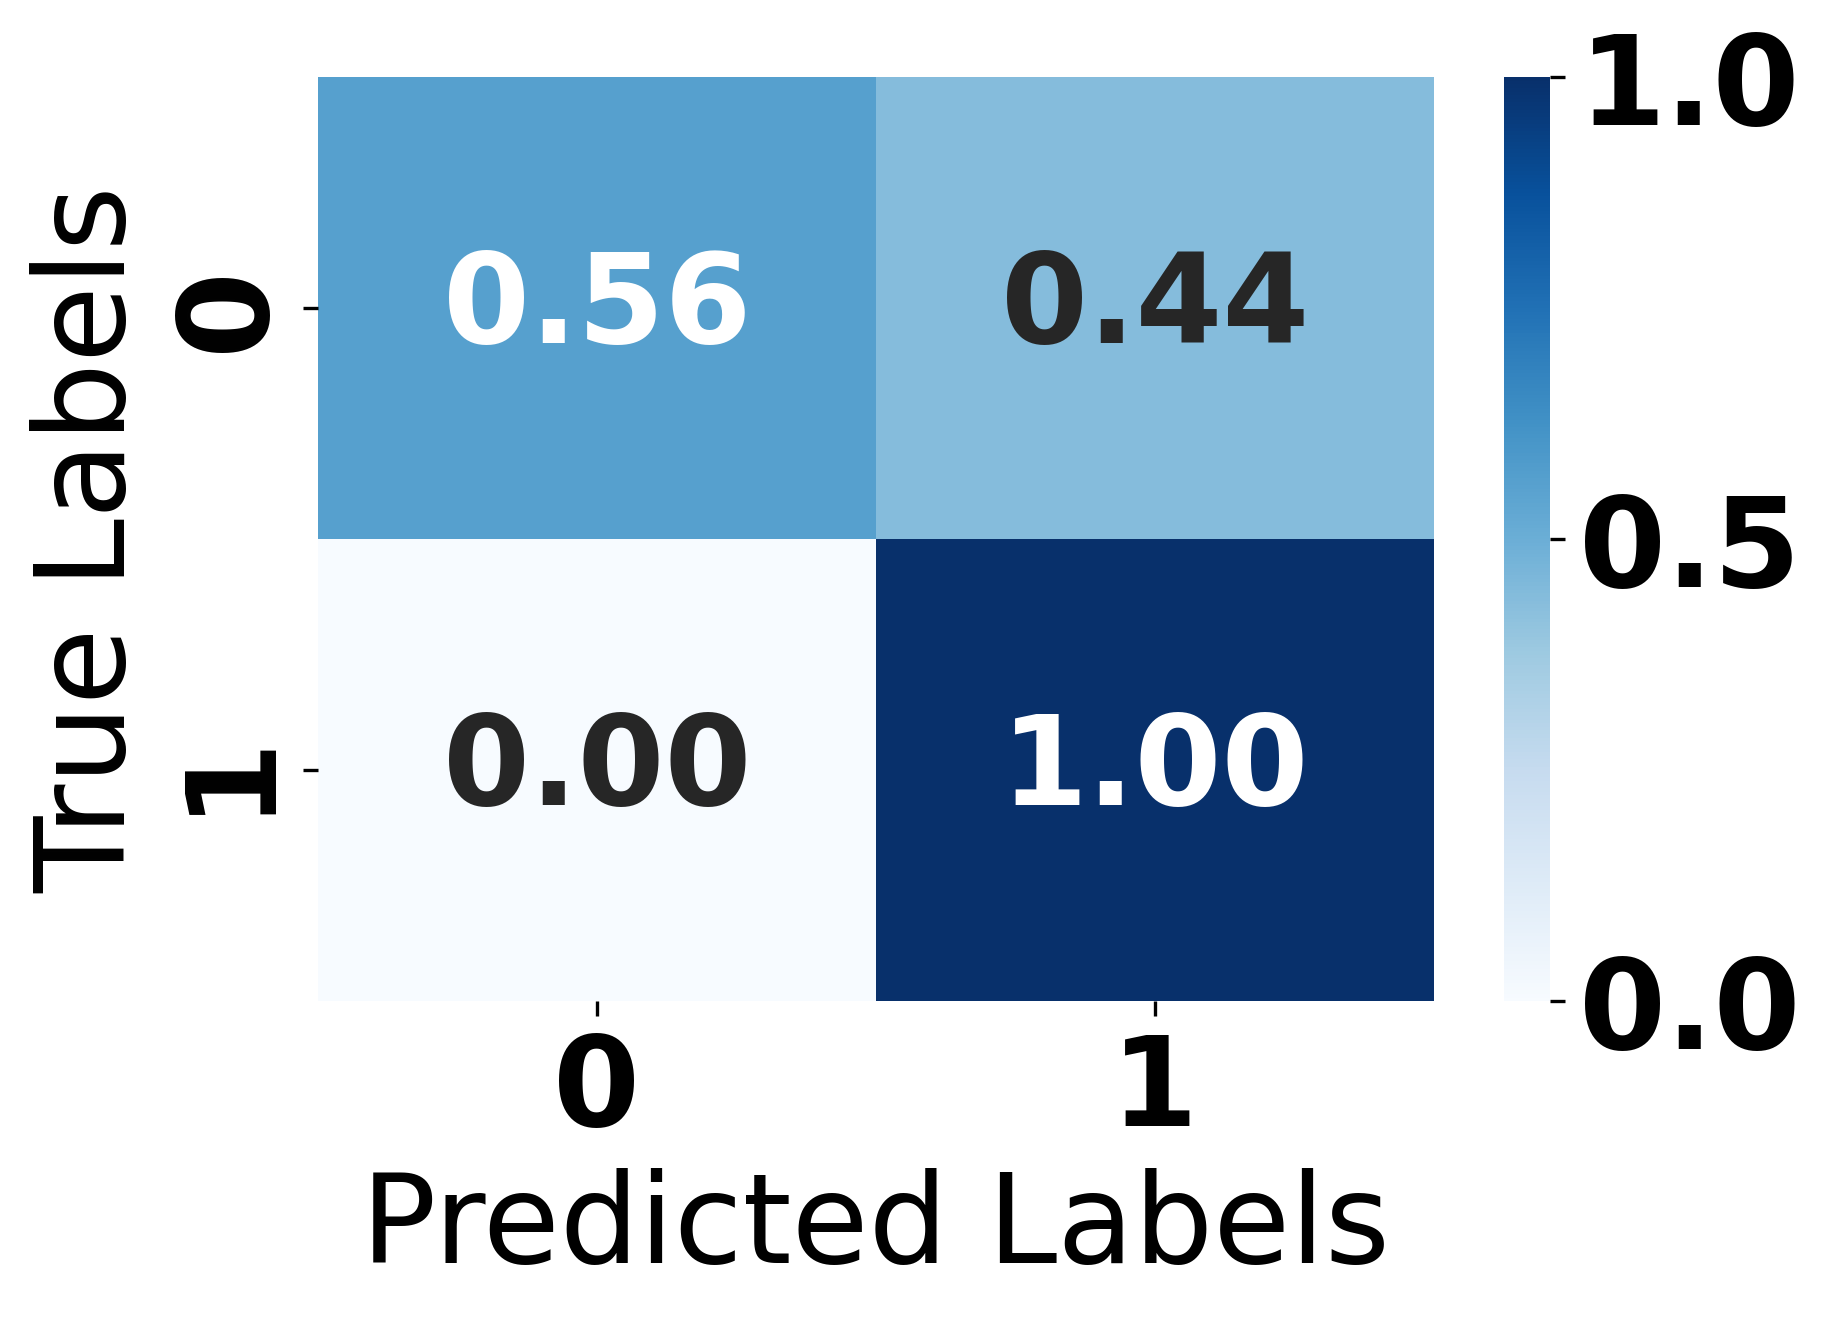

In [ ]:
# Predict probabilities on test data
y_pred_prob = model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/CNN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
CNN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/CNN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_complex_ann_model(input_shape):
    input_layer = Input(shape=input_shape)

    # Add fully connected layers with increasing complexity
    dense1 = Dense(256, activation='relu')(input_layer)
    dense1 = BatchNormalization()(dense1)
    dense1 = Dropout(0.5)(dense1)  # Adding dropout for regularization

    dense2 = Dense(128, activation='relu')(dense1)
    dense2 = BatchNormalization()(dense2)
    dense2 = Dropout(0.5)(dense2)

    dense3 = Dense(64, activation='relu')(dense2)
    dense3 = BatchNormalization()(dense3)

    output = Dense(1, activation='sigmoid')(dense3)

    model = Model(inputs=input_layer, outputs=output)
    return model

# Create the more complex ANN model
complex_ann_model1 = create_complex_ann_model(input_shape)

# Compile the model
complex_ann_model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the more complex ANN model
complex_ann_model1.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

# Evaluate the more complex ANN model
loss, accuracy = complex_ann_model1.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 138ms/step - accuracy: 0.6077 - loss: 0.7297 - val_accuracy: 0.2361 - val_loss: 2.8866
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - accuracy: 0.8217 - loss: 0.4250 - val_accuracy: 0.2361 - val_loss: 2.2145
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.8771 - loss: 0.3135 - val_accuracy: 0.2361 - val_loss: 2.2089
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.9137 - loss: 0.2149 - val_accuracy: 0.2361 - val_loss: 1.9003
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9465 - loss: 0.1720 - val_accuracy: 0.2778 - val_loss: 1.6164
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9560 - loss: 0.1599 - val_accuracy: 0.3472 - val_loss: 1.4729
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9565 - loss: 0.1446 - val_accuracy: 0.4583 - val_loss: 1.2380
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.9495 - loss: 0.1321 - val_accuracy: 0.5278 -

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Normalized Confusion Matrix:
[[0.49090909 0.50909091]
 [0.         1.        ]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       1.00      0.49      0.66        55
     Class 1       0.38      1.00      0.55        17

    accuracy                           0.61        72
   macro avg       0.69      0.75      0.60        72
weighted avg       0.85      0.61      0.63        72



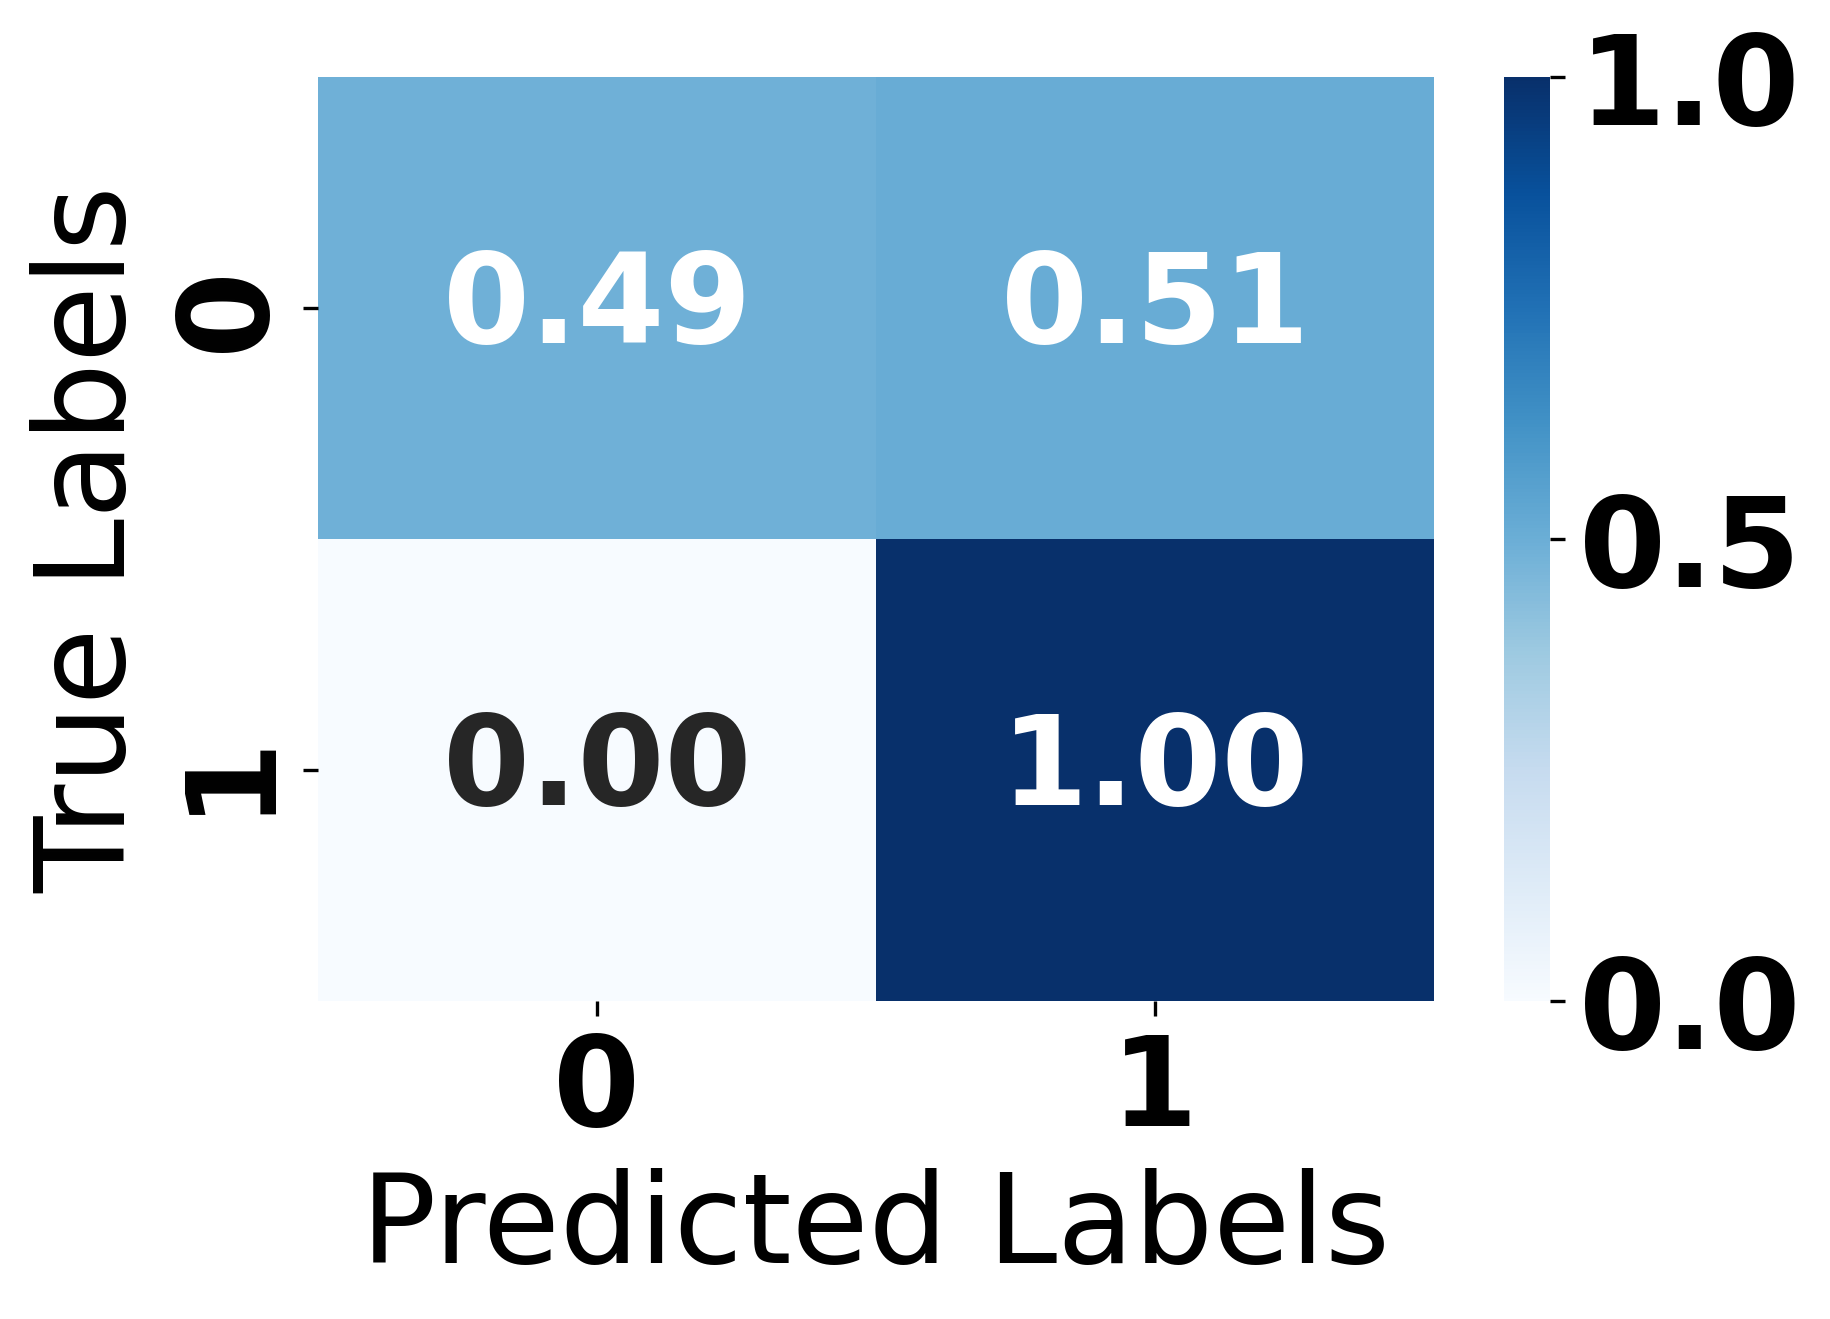

In [ ]:
# Predict probabilities on test data
y_pred_prob = complex_ann_model1.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.49)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
# plt.title('Normalized Confusion Matrix', fontsize=16, weight='bold')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
complex_ann_model1.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/ANN.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
ANN = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/ANN.h5')

In [ ]:
from tensorflow.keras.layers import Input, Dense, Dropout, LayerNormalization, Embedding, GlobalAveragePooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import time

# Define the input shape based on your data
input_shape = (x_train.shape[1],)  # Assuming your input data is 1D

def create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim):
    # Input layer
    inputs = Input(shape=input_shape)

    # Embedding layer
    x = Embedding(input_dim=vocab_size, output_dim=embed_dim, input_length=input_shape[0])(inputs)

    # Feed-forward network
    x = Dense(ff_dim, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Another feed-forward layer
    x = Dense(ff_dim // 2, activation='relu')(x)
    x = Dropout(0.1)(x)
    x = LayerNormalization(epsilon=1e-6)(x)

    # Global average pooling
    x = GlobalAveragePooling1D()(x)

    # Dense layers
    x = Dense(128, activation='relu')(x)
    x = Dropout(0.5)(x)
    x = Dense(64, activation='relu')(x)

    # Output layer
    outputs = Dense(1, activation='sigmoid')(x)

    # Create the model
    model = Model(inputs=inputs, outputs=outputs)
    return model

# Define model parameters
vocab_size = 200  # This should be set according to your dataset
embed_dim = 64  # Embedding size for each token
ff_dim = 64  # Hidden layer size in the feed-forward network

# Create the Transformer model
simple_transformer_model = create_simple_transformer_model(input_shape, vocab_size, embed_dim, ff_dim)

# Compile the model
simple_transformer_model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=1e-4), metrics=['accuracy'])

# Measure the training time
start_time = time.time()

# Train the Transformer model
simple_transformer_model.fit(x_train, y_train, epochs=10, batch_size=512, validation_data=(x_test, y_test))

end_time = time.time()
training_time = end_time - start_time

print("Training Time:", training_time)

# Measure the test time
start_time = time.time()

# Evaluate the Transformer model
loss, accuracy = simple_transformer_model.evaluate(x_test, y_test)

end_time = time.time()
test_time = end_time - start_time

print("Test Time:", test_time)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 654ms/step - accuracy: 0.5746 - loss: 0.6818 - val_accuracy: 0.8056 - val_loss: 0.6592
Epoch 2/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - accuracy: 0.6523 - loss: 0.6545 - val_accuracy: 0.8056 - val_loss: 0.6515
Epoch 3/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step - accuracy: 0.7018 - loss: 0.6426 - val_accuracy: 0.8333 - val_loss: 0.6368
Epoch 4/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 165ms/step - accuracy: 0.7307 - loss: 0.6232 - val_accuracy: 0.8611 - val_loss: 0.6245
Epoch 5/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 134ms/step - accuracy: 0.7182 - loss: 0.6209 - val_accuracy: 0.8333 - val_loss: 0.6179
Epoch 6/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - accuracy: 0.7585 - loss: 0.6059 - val_accuracy: 0.8333 - val_loss: 0.6134
Epoch 7/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.7648 - loss: 0.5977 - val_accuracy: 0.8194 - val_loss: 0.6081
Epoch 8/10
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 158ms/step - accuracy: 0.7812 - loss: 0.5832 - val_accuracy: 0.8194 - val_loss: 

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Normalized Confusion Matrix:
[[0.94545455 0.05454545]
 [0.29411765 0.70588235]]
Classification Report:
              precision    recall  f1-score   support

     Class 0       0.91      0.95      0.93        55
     Class 1       0.80      0.71      0.75        17

    accuracy                           0.89        72
   macro avg       0.86      0.83      0.84        72
weighted avg       0.89      0.89      0.89        72



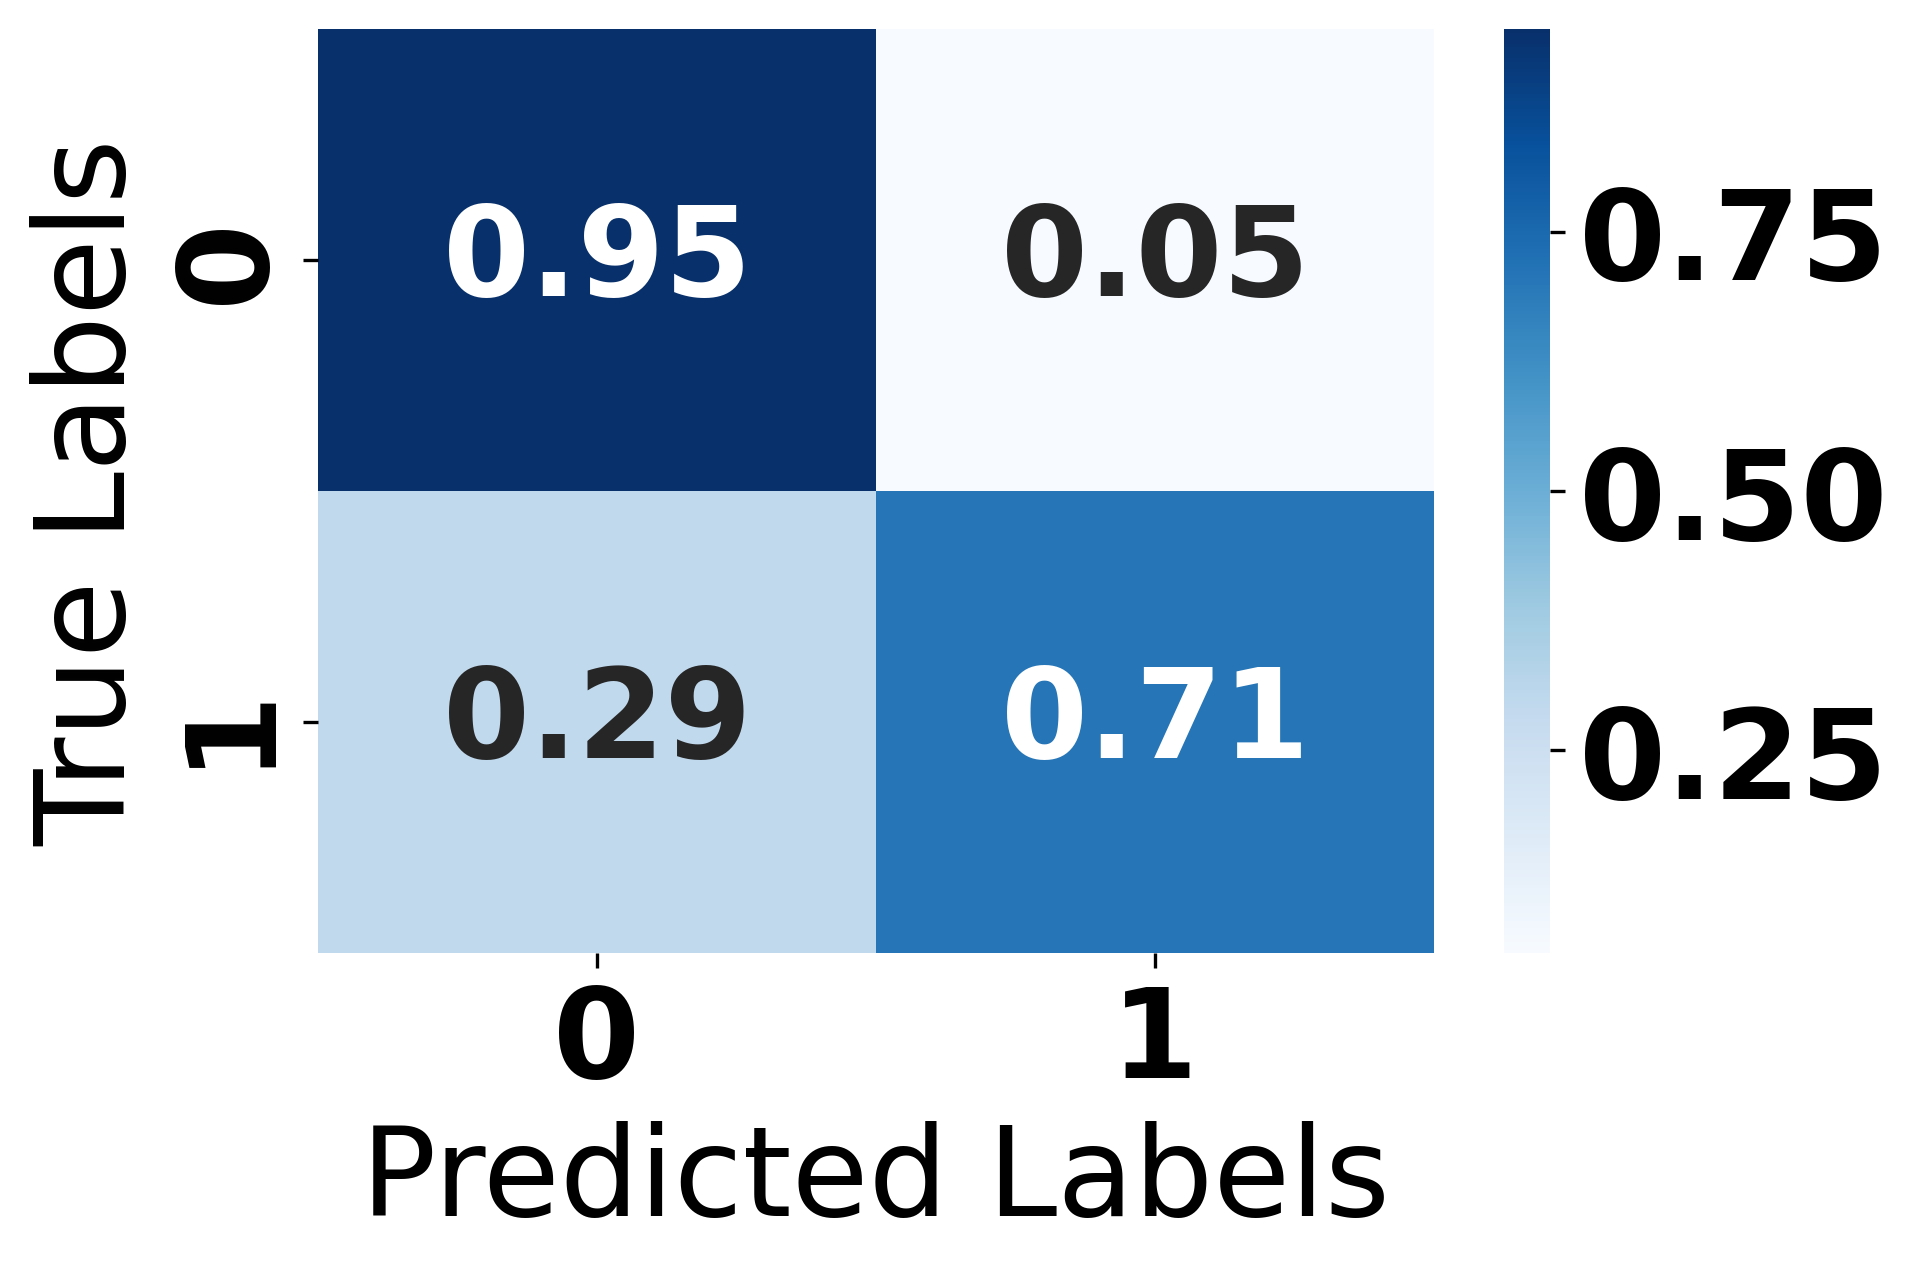

In [ ]:
# Predict probabilities on test data
y_pred_prob = simple_transformer_model.predict(x_test)

# Convert probabilities to class labels using a threshold of 0.5
y_pred = np.where(y_pred_prob > 0.6, 1, 0)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate the normalized confusion matrix
normalized_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

print("Normalized Confusion Matrix:")
print(normalized_cm)

# Generate classification report with the same threshold (0.5)
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"])
print("Classification Report:")
print(report)

# Print confusion matrix as figure
plt.figure(figsize=(6, 4))
sns.heatmap(normalized_cm, annot=True, cmap='Blues', fmt=".2f")
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [ ]:
"""
# Save the model to a file
simple_transformer_model.save('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/transformer_model.h5')
"""

In [ ]:
from tensorflow.keras.models import load_model

# Load the saved model
transformer_model = load_model('/content/drive/Shareddrives/Best Shared Drive Ever/Simon-personal/ThyroidCancerRecurrence/Table/CGAN/model/transformer_model.h5')

### GPT

In [ ]:
import torch
import pandas as pd
import numpy as np
from transformers import GPT2Tokenizer, GPT2Model, GPT2Config, Trainer, TrainingArguments
from torch import nn
from torch.utils.data import Dataset
from sklearn.metrics import classification_report, confusion_matrix

# 1. Check device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2. Load tokenizer and GPT2
tokenizer = GPT2Tokenizer.from_pretrained("distilgpt2")
tokenizer.pad_token = tokenizer.eos_token  # Set pad token to eos_token

# 3. Custom Dataset
class TabularAsTextDataset(Dataset):
    def __init__(self, features, labels, tokenizer, max_len=128):
        self.texts = self._convert_to_string_sequences(features)
        self.encodings = tokenizer(self.texts, truncation=True, padding=True, max_length=max_len, return_tensors='pt')
        self.labels = torch.tensor(labels, dtype=torch.long)

    def _convert_to_string_sequences(self, df_or_array):
        # Convert each row into a space-separated string of feature values
        if isinstance(df_or_array, pd.DataFrame):
            return df_or_array.astype(str).agg(" ".join, axis=1).tolist()
        elif isinstance(df_or_array, np.ndarray):
            return [" ".join(map(str, row)) for row in df_or_array]
        else:
            raise ValueError("Unsupported data format. Must be DataFrame or ndarray.")

    def __len__(self):
        return len(self.labels)

    def __getitem__(self, idx):
        item = {key: val[idx] for key, val in self.encodings.items()}
        item['labels'] = self.labels[idx]
        return item

# 4. Custom GPT2 classification model
class GPT2ForClassification(nn.Module):
    def __init__(self, n_classes=2):
        super(GPT2ForClassification, self).__init__()
        self.gpt2 = GPT2Model.from_pretrained("distilgpt2")
        self.dropout = nn.Dropout(0.2)
        self.classifier = nn.Linear(self.gpt2.config.hidden_size, n_classes)

    def forward(self, input_ids, attention_mask, labels=None):
        outputs = self.gpt2(input_ids=input_ids, attention_mask=attention_mask)
        last_hidden_state = outputs.last_hidden_state
        cls_output = last_hidden_state[:, -1, :]  # Last token embedding
        logits = self.classifier(self.dropout(cls_output))
        loss = None
        if labels is not None:
            loss_fn = nn.CrossEntropyLoss()
            loss = loss_fn(logits, labels)
        return {"loss": loss, "logits": logits}

# 5. Flatten labels if needed
if isinstance(y_train, (pd.Series, pd.DataFrame, np.ndarray)):
    y_train = pd.Series(np.ravel(y_train)).astype(int).tolist()

if isinstance(y_test, (pd.Series, pd.DataFrame, np.ndarray)):
    y_test = pd.Series(np.ravel(y_test)).astype(int).tolist()

# 6. Prepare dataset
train_dataset = TabularAsTextDataset(x_train, y_train, tokenizer)
test_dataset = TabularAsTextDataset(x_test, y_test, tokenizer)

# 7. Load model
model = GPT2ForClassification(n_classes=len(set(y_train)))
model.to(device)

# 8. TrainingArguments and Trainer
training_args = TrainingArguments(
    output_dir="./bad_results",        # new folder
    per_device_train_batch_size=30,   # too large → unstable updates
    num_train_epochs=1,              # too few epochs
    learning_rate=0.01,                 # too high → catastrophic divergence
    weight_decay=0.01,                  # no regularization
    logging_dir="./logs",
    logging_steps=10,                 # rarely log → less feedback
    save_steps=15,                  # almost never save
    eval_steps=15,                  # almost never evaluate
    metric_for_best_model="accuracy",
    greater_is_better=True,
    warmup_ratio=0.1,                  # no warmup → unstable start
    gradient_accumulation_steps=1,
    fp16=False
)

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = np.argmax(logits, axis=1)
    acc = (preds == labels).mean()
    return {"accuracy": acc}

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset,
    compute_metrics=compute_metrics,
)

# 9. Train
trainer.train()

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=22, training_loss=1.1220268254930323, metrics={'train_runtime': 136.946, 'train_samples_per_second': 4.673, 'train_steps_per_second': 0.161, 'total_flos': 0.0, 'train_loss': 1.1220268254930323, 'epoch': 1.0})

In [ ]:
# 8. Evaluation
preds_output = trainer.predict(test_dataset)
predictions = np.argmax(preds_output.predictions, axis=1)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:666: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


In [ ]:
# 9. Classification report & confusion matrix
print("Classification Report:\n", classification_report(y_test, predictions, digits=4))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))

Classification Report:
               precision    recall  f1-score   support

           0     0.9643    0.9818    0.9730        55
           1     0.9375    0.8824    0.9091        17

    accuracy                         0.9583        72
   macro avg     0.9509    0.9321    0.9410        72
weighted avg     0.9580    0.9583    0.9579        72

Confusion Matrix:
 [[54  1]
 [ 2 15]]
